# PROBLEM STATEMENT
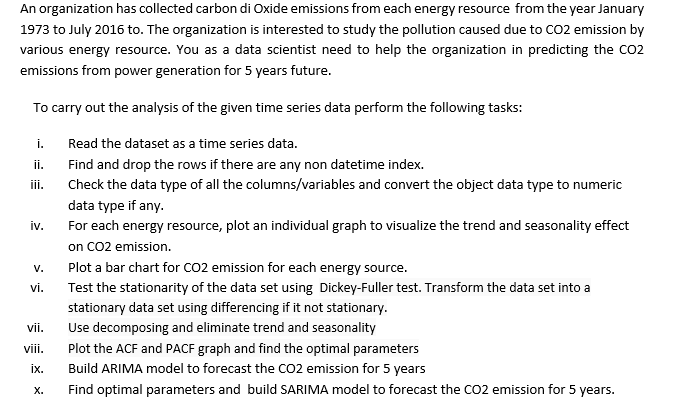

# INTRODUCTION ABOUT THE DATASET

**THE SCENARIO:**

- An organization has collected Carbon Di Oxide Emissions from each energy resource  from the year January 1973 to July 2016 to. The organization is interested to study the pollution caused due to CO2 emission by various energy resource. We need to help the organization in predicting the CO2 emissions from power generation for 5 years future

- The dataset includes CO2 emissions from each energy resource starting January 1973 to July 2016


# DATASET DESCRIPTION


**The given dataset is from US electricity data having columns:**
<pre>
1. YYYYMM          - It Contains the month and year of the data in the YYYYMM format               
2. MSN             - It has the acronyms for the Energy Source Industry of US behind the Co2 Emissions
3. VALUE           - It Represents the amount of Co2 Emissions
4. COLUMN_ORDER    - It shows the numeric correspondace to the energy sourece
5. DESCRIPTION     - It gives the detail about the name of the energy source behind the Co2 Emissions
6. UNIT            - It gives the scale in which the value coloumn is calculated
</pre>

## IMPORTING NECESSARY LIBRARIES

In [1]:
#Basic Imports

#for numpy/scientific calculations:
import numpy as np

#for data reading and preprocessing:
import pandas as pd

#for data visualisation:
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings

from sklearn.metrics import mean_squared_error

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf,pacf
import warnings

warnings.filterwarnings("ignore")
k = 418

## READING THE DATASET

In [2]:
co2_data = pd.read_csv('CO2_emission test.csv')
co2_data.head(10)


MSN  YYYYMM   Value  Column_Order  \
0  CLEIEUS  197301  72.076             1   
1  CLEIEUS  197302  64.442             1   
2  CLEIEUS  197303  64.084             1   
3  CLEIEUS  197304  60.842             1   
4  CLEIEUS  197305  61.798             1   
5  CLEIEUS  197306  66.538             1   
6  CLEIEUS  197307  72.626             1   
7  CLEIEUS  197308  75.181             1   
8  CLEIEUS  197309  68.397             1   
9  CLEIEUS  197310  67.668             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   
5  Coal Electric Power Sector CO2 Emissions   
6  Coal Electric Power Sector CO2 Emissions   
7  Coal Electric Power Sector CO2 Emissions   
8  Coal Electric Power Sector CO2 Emissions   
9  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide  
5  Million Metric Tons of Carbon Dioxide  
6  Million Metric Tons of Carbon Dioxide  
7  Million Metric Tons of Carbon Dioxide  
8  Million Metric Tons of Carbon Dioxide  
9  Million Metric Tons of Carbon Dioxide

## COLOUMN DESCRIPTION

In [3]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [4]:
co2_data.MSN.unique()

array(['CLEIEUS', 'NNEIEUS', 'DKEIEUS', 'PCEIEUS', 'RFEIEUS', 'PAEIEUS',
       'GEEIEUS', 'NWEIEUS', 'TXEIEUS'], dtype=object)

In [5]:
co2_data.MSN.nunique()

9

###### There are 9 unique values in the MSN column which represents the industries of US behind the co2 Emissions

In [6]:
co2_data.Column_Order.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [7]:
co2_data.Column_Order.nunique()

9

##### There are 9 unique values in the Column-order column which corresponds to the energy source of emission

In [8]:
co2_data.Description.unique()

array(['Coal Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'], dtype=object)

In [9]:
co2_data.Description.nunique()

9

##### There are 9 unique values in the Description column which corresponds to the energy source of emission

In [10]:
co2_data.groupby('Description').head(1)

MSN  YYYYMM          Value  Column_Order  \
0     CLEIEUS  197301         72.076             1   
566   NNEIEUS  197301         12.175             2   
1132  DKEIEUS  197301          2.375             3   
1698  PCEIEUS  197301          0.128             4   
2264  RFEIEUS  197301         24.867             5   
2830  PAEIEUS  197301         27.369             6   
3396  GEEIEUS  197301  Not Available             7   
3962  NWEIEUS  197301  Not Available             8   
4528  TXEIEUS  197301        111.621             9   

                                            Description  \
0              Coal Electric Power Sector CO2 Emissions   
566     Natural Gas Electric Power Sector CO2 Emissions   
1132  Distillate Fuel, Including Kerosene-Type Jet F...   
1698  Petroleum Coke Electric Power Sector CO2 Emiss...   
2264  Residual Fuel Oil Electric Power Sector CO2 Em...   
2830      Petroleum Electric Power Sector CO2 Emissions   
3396  Geothermal Energy Electric Power Sector CO2 Em...   
3962  Non-Biomass Waste Electric Power Sector CO2 Em...   
4528   Total Energy Electric Power Sector CO2 Emissions   

                                       Unit  
0     Million Metric Tons of Carbon Dioxide  
566   Million Metric Tons of Carbon Dioxide  
1132  Million Metric Tons of Carbon Dioxide  
1698  Million Metric Tons of Carbon Dioxide  
2264  Million Metric Tons of Carbon Dioxide  
2830  Million Metric Tons of Carbon Dioxide  
3396  Million Metric Tons of Carbon Dioxide  
3962  Million Metric Tons of Carbon Dioxide  
4528  Million Metric Tons of Carbon Dioxide

The above table shows all the different **energy sources** and thier corresponding **Column-Order and MSN values**

In [11]:
co2_data.Unit.unique()

array(['Million Metric Tons of Carbon Dioxide'], dtype=object)

In [12]:
co2_data.Unit.nunique()

1

###### The UNIT column has a standard scale of measuring the amount of Co2 emissions generated by the Energy Sources

# 

###### The dataset is not in time series format, we have YYYYMM COLUMN which has the time stamp so we will convert the dataset into time series by changing the format of YYYYMM column and making it the index for the dataset.

In [13]:
# Reading the data in time series format
#here we will give errors=coerce so that the while parsing invalid parse set to NaT
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
co2_df = pd.read_csv('CO2_emission test.csv', parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 

#visualising the time series dataset:
co2_df.head(15)

MSN    Value  Column_Order  \
YYYYMM                                       
1973-01-01  CLEIEUS   72.076             1   
1973-02-01  CLEIEUS   64.442             1   
1973-03-01  CLEIEUS   64.084             1   
1973-04-01  CLEIEUS   60.842             1   
1973-05-01  CLEIEUS   61.798             1   
1973-06-01  CLEIEUS   66.538             1   
1973-07-01  CLEIEUS   72.626             1   
1973-08-01  CLEIEUS   75.181             1   
1973-09-01  CLEIEUS   68.397             1   
1973-10-01  CLEIEUS   67.668             1   
1973-11-01  CLEIEUS   67.021             1   
1973-12-01  CLEIEUS   71.118             1   
NaT         CLEIEUS  811.791             1   
1974-01-01  CLEIEUS    70.55             1   
1974-02-01  CLEIEUS   62.929             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   
1973-06-01  Coal Electric Power Sector CO2 Emissions   
1973-07-01  Coal Electric Power Sector CO2 Emissions   
1973-08-01  Coal Electric Power Sector CO2 Emissions   
1973-09-01  Coal Electric Power Sector CO2 Emissions   
1973-10-01  Coal Electric Power Sector CO2 Emissions   
1973-11-01  Coal Electric Power Sector CO2 Emissions   
1973-12-01  Coal Electric Power Sector CO2 Emissions   
NaT         Coal Electric Power Sector CO2 Emissions   
1974-01-01  Coal Electric Power Sector CO2 Emissions   
1974-02-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
1973-06-01  Million Metric Tons of Carbon Dioxide  
1973-07-01  Million Metric Tons of Carbon Dioxide  
1973-08-01  Million Metric Tons of Carbon Dioxide  
1973-09-01  Million Metric Tons of Carbon Dioxide  
1973-10-01  Million Metric Tons of Carbon Dioxide  
1973-11-01  Million Metric Tons of Carbon Dioxide  
1973-12-01  Million Metric Tons of Carbon Dioxide  
NaT         Million Metric Tons of Carbon Dioxide  
1974-01-01  Million Metric Tons of Carbon Dioxide  
1974-02-01  Million Metric Tons of Carbon Dioxide

The arguments used above can be explained as:

- **parse_dates:**  This is a key to identify the date time column. Example, the column name is ‘YYYYMM’.
- **index_col:**    This is a key that forces pandas to use the date time column as index.
- **date_parser:**  Converts an input string into datetime variable.

We can see there are some **NaT** values present in the index column we need to deal with those columns

## DATASET PREPROCESSING

In [14]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5094 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   Value         5094 non-null   object
 2   Column_Order  5094 non-null   int64 
 3   Description   5094 non-null   object
 4   Unit          5094 non-null   object
dtypes: int64(1), object(4)
memory usage: 238.8+ KB


- The dataset has 5 columns where **1** of them is an **integer** data type and rest **4 are objects.** 
- There are total **5094 non-null observations.**

In [15]:
#deleting non datetime index
ts = co2_df[pd.Series(pd.to_datetime(co2_df.index, errors='coerce')).notnull().values]
ts.head(15)

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   
1973-06-01  CLEIEUS  66.538             1   
1973-07-01  CLEIEUS  72.626             1   
1973-08-01  CLEIEUS  75.181             1   
1973-09-01  CLEIEUS  68.397             1   
1973-10-01  CLEIEUS  67.668             1   
1973-11-01  CLEIEUS  67.021             1   
1973-12-01  CLEIEUS  71.118             1   
1974-01-01  CLEIEUS   70.55             1   
1974-02-01  CLEIEUS  62.929             1   
1974-03-01  CLEIEUS  64.519             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   
1973-06-01  Coal Electric Power Sector CO2 Emissions   
1973-07-01  Coal Electric Power Sector CO2 Emissions   
1973-08-01  Coal Electric Power Sector CO2 Emissions   
1973-09-01  Coal Electric Power Sector CO2 Emissions   
1973-10-01  Coal Electric Power Sector CO2 Emissions   
1973-11-01  Coal Electric Power Sector CO2 Emissions   
1973-12-01  Coal Electric Power Sector CO2 Emissions   
1974-01-01  Coal Electric Power Sector CO2 Emissions   
1974-02-01  Coal Electric Power Sector CO2 Emissions   
1974-03-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
1973-06-01  Million Metric Tons of Carbon Dioxide  
1973-07-01  Million Metric Tons of Carbon Dioxide  
1973-08-01  Million Metric Tons of Carbon Dioxide  
1973-09-01  Million Metric Tons of Carbon Dioxide  
1973-10-01  Million Metric Tons of Carbon Dioxide  
1973-11-01  Million Metric Tons of Carbon Dioxide  
1973-12-01  Million Metric Tons of Carbon Dioxide  
1974-01-01  Million Metric Tons of Carbon Dioxide  
1974-02-01  Million Metric Tons of Carbon Dioxide  
1974-03-01  Million Metric Tons of Carbon Dioxide

In [16]:
ts.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           4707 non-null   object
 1   Value         4707 non-null   object
 2   Column_Order  4707 non-null   int64 
 3   Description   4707 non-null   object
 4   Unit          4707 non-null   object
dtypes: int64(1), object(4)
memory usage: 220.6+ KB


We saw that **387** values in the Date index column has missing values and imputing them will give us wrong information about the particular dates so we dropped the missing index and thier corresponding values

In [17]:
ts.index.names = ['Year']
ts.head()

MSN   Value  Column_Order  \
Year                                        
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   

                                         Description  \
Year                                                   
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
Year                                               
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide

###### Since the Value column has Object format we have to convert it  to float64 dtype to perform our further computations

In [18]:
ts["Value"].value_counts()

Not Available    384
0.032             89
0.031             60
0.034             55
0.033             47
                ... 
19.678             1
4.038              1
16.36              1
1.741              1
0.727              1
Name: Value, Length: 3284, dtype: int64

We can see there are **384 "Not Available"** values in the values column

In [19]:
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4707 non-null   object 
 1   Value         4323 non-null   float64
 2   Column_Order  4707 non-null   int64  
 3   Description   4707 non-null   object 
 4   Unit          4707 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 220.6+ KB


In [20]:
# replacing NOT AVAILABLE with null
ts[ts['Value']=="Not Available"]=np.nan

In [21]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4707 non-null   object 
 1   Value         4323 non-null   float64
 2   Column_Order  4707 non-null   float64
 3   Description   4707 non-null   object 
 4   Unit          4707 non-null   object 
dtypes: float64(2), object(3)
memory usage: 220.6+ KB


In [22]:
# null values in dataset

ts.isnull().sum()

MSN               0
Value           384
Column_Order      0
Description       0
Unit              0
dtype: int64

**We can see that there are total 384 missing values** 


##### Some of the deductions:

- 1. We **cannot Impute the data values with MEAN** as that would give us a stationary line and we wont be able to detect the        trends and seasonality of the data. So Straight line values wont help us in our predictions 

- 2. We **cannot do description wise categorical imputation using RandomSampleImputer** since it will be wrong from domain knowledge perspective and affect the seasonality of the data 

#### So in order to get the best predictions we need to drop the NULL values

In [23]:
ts[ts.isna().any(axis = 1)]

MSN  Value  Column_Order  \
Year                                       
1973-01-01  GEEIEUS    NaN           7.0   
1973-02-01  GEEIEUS    NaN           7.0   
1973-03-01  GEEIEUS    NaN           7.0   
1973-04-01  GEEIEUS    NaN           7.0   
1973-05-01  GEEIEUS    NaN           7.0   
...             ...    ...           ...   
1988-08-01  NWEIEUS    NaN           8.0   
1988-09-01  NWEIEUS    NaN           8.0   
1988-10-01  NWEIEUS    NaN           8.0   
1988-11-01  NWEIEUS    NaN           8.0   
1988-12-01  NWEIEUS    NaN           8.0   

                                                  Description  \
Year                                                            
1973-01-01  Geothermal Energy Electric Power Sector CO2 Em...   
1973-02-01  Geothermal Energy Electric Power Sector CO2 Em...   
1973-03-01  Geothermal Energy Electric Power Sector CO2 Em...   
1973-04-01  Geothermal Energy Electric Power Sector CO2 Em...   
1973-05-01  Geothermal Energy Electric Power Sector CO2 Em...   
...                                                       ...   
1988-08-01  Non-Biomass Waste Electric Power Sector CO2 Em...   
1988-09-01  Non-Biomass Waste Electric Power Sector CO2 Em...   
1988-10-01  Non-Biomass Waste Electric Power Sector CO2 Em...   
1988-11-01  Non-Biomass Waste Electric Power Sector CO2 Em...   
1988-12-01  Non-Biomass Waste Electric Power Sector CO2 Em...   

                                             Unit  
Year                                               
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
...                                           ...  
1988-08-01  Million Metric Tons of Carbon Dioxide  
1988-09-01  Million Metric Tons of Carbon Dioxide  
1988-10-01  Million Metric Tons of Carbon Dioxide  
1988-11-01  Million Metric Tons of Carbon Dioxide  
1988-12-01  Million Metric Tons of Carbon Dioxide  

[384 rows x 5 columns]

In [24]:
ts.dropna(inplace = True)


In [25]:
ts.shape

(4323, 5)

In [26]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4323 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4323 non-null   object 
 1   Value         4323 non-null   float64
 2   Column_Order  4323 non-null   float64
 3   Description   4323 non-null   object 
 4   Unit          4323 non-null   object 
dtypes: float64(2), object(3)
memory usage: 202.6+ KB


**We have dropped 384 rows from the dataset in order to get best predictions**

#### Checking For Outliers

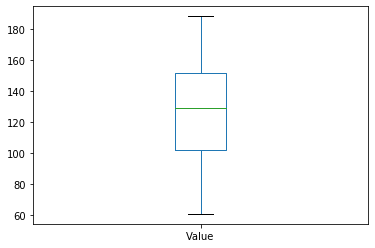

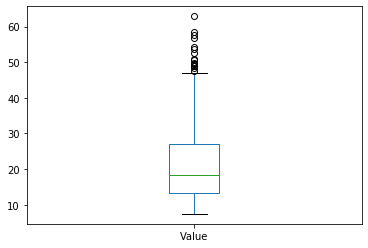

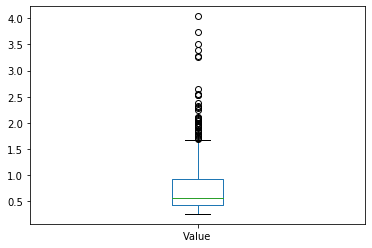

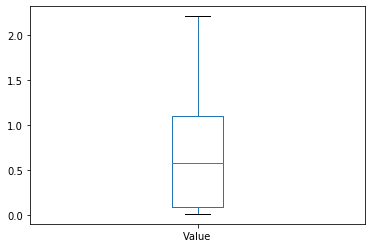

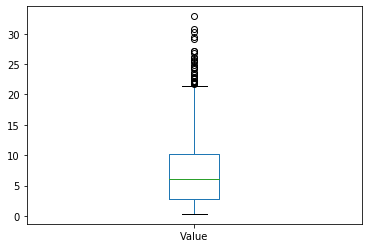

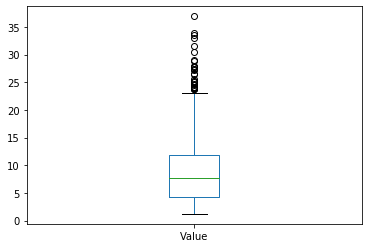

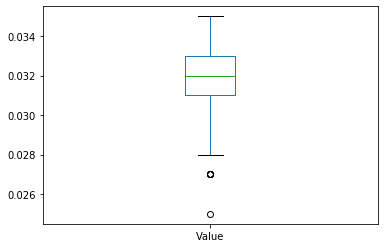

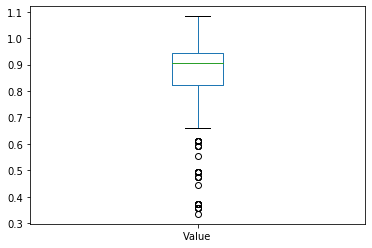

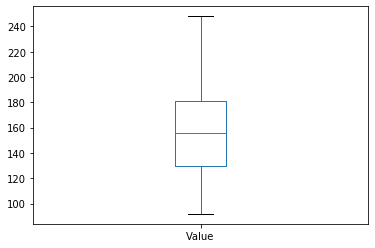

In [27]:
#checking for outliers in time series data
for i in range(1,10):
    ts.loc[ts["Column_Order"] == i,['Value']].plot(kind = 'box')
    

#### Value column contains outliers for different column order

- We cannot remove or cap the outliers as that will affect our realtime data
- These outliers tell us the **peak** as well as **least values of Co2 emission**, capping or removing them will make our dataset unreal and that will affect our predictions
- These **outliers are the seasonal values.**

### STATISTICAL INFERENCES:

In [28]:
ts.describe().T

count       mean        std    min   25%    50%     75%  \
Value         4323.0  39.252449  61.128676  0.009  0.73  6.236  40.638   
Column_Order  4323.0   4.777932   2.575595  1.000  3.00  5.000   7.000   

                  max  
Value         247.995  
Column_Order    9.000

##### Deductions from the Describe function

- There are total **4323 number of observations**
- The observations of Column_Order wont be of much value as Column_Order represents discrete data with 9 fixed values
- The **minimum value is 0.009** and the **maximum value is 247.995** for the Values column
- The **Mean for the Values column is 39.252449**
- **50% percentile signifies the median** of the dataset, which is **6.236**
- We can see that **Mean ≠ Median** for the Values column which implies that the **Data does not follows Normally             distribution.**


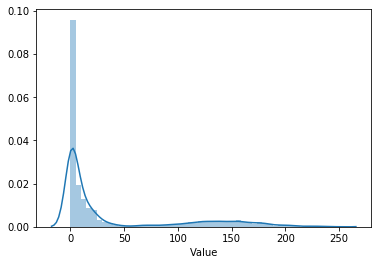

In [29]:
sns.distplot(ts['Value'])

Here through the pictorial representation we can see that the data is right skewed 


**HENCE IT NOT NORMALLY DISTRIBUTED**

#### GROUPING THE ENERGY SOURCES TOGETHER

In [30]:
Energy_sources = ts.groupby('Description')
Energy_sources.head(3)

MSN    Value  Column_Order  \
Year                                         
1973-01-01  CLEIEUS   72.076           1.0   
1973-02-01  CLEIEUS   64.442           1.0   
1973-03-01  CLEIEUS   64.084           1.0   
1973-01-01  NNEIEUS   12.175           2.0   
1973-02-01  NNEIEUS   11.708           2.0   
1973-03-01  NNEIEUS   13.994           2.0   
1973-01-01  DKEIEUS    2.375           3.0   
1973-02-01  DKEIEUS    2.061           3.0   
1973-03-01  DKEIEUS    1.171           3.0   
1973-01-01  PCEIEUS    0.128           4.0   
1973-02-01  PCEIEUS    0.106           4.0   
1973-03-01  PCEIEUS    0.083           4.0   
1973-01-01  RFEIEUS   24.867           5.0   
1973-02-01  RFEIEUS   20.867           5.0   
1973-03-01  RFEIEUS   19.780           5.0   
1973-01-01  PAEIEUS   27.369           6.0   
1973-02-01  PAEIEUS   23.034           6.0   
1973-03-01  PAEIEUS   21.034           6.0   
1989-01-01  GEEIEUS    0.031           7.0   
1989-02-01  GEEIEUS    0.028           7.0   
1989-03-01  GEEIEUS    0.031           7.0   
1989-01-01  NWEIEUS    0.371           8.0   
1989-02-01  NWEIEUS    0.335           8.0   
1989-03-01  NWEIEUS    0.371           8.0   
1973-01-01  TXEIEUS  111.621           9.0   
1973-02-01  TXEIEUS   99.185           9.0   
1973-03-01  TXEIEUS   99.112           9.0   

                                                  Description  \
Year                                                            
1973-01-01           Coal Electric Power Sector CO2 Emissions   
1973-02-01           Coal Electric Power Sector CO2 Emissions   
1973-03-01           Coal Electric Power Sector CO2 Emissions   
1973-01-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-02-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-03-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-01-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-02-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-03-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-01-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-02-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-03-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-01-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-02-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-03-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-01-01      Petroleum Electric Power Sector CO2 Emissions   
1973-02-01      Petroleum Electric Power Sector CO2 Emissions   
1973-03-01      Petroleum Electric Power Sector CO2 Emissions   
1989-01-01  Geothermal Energy Electric Power Sector CO2 Em...   
1989-02-01  Geothermal Energy Electric Power Sector CO2 Em...   
1989-03-01  Geothermal Energy Electric Power Sector CO2 Em...   
1989-01-01  Non-Biomass Waste Electric Power Sector CO2 Em...   
1989-02-01  Non-Biomass Waste Electric Power Sector CO2 Em...   
1989-03-01  Non-Biomass Waste Electric Power Sector CO2 Em...   
1973-01-01   Total Energy Electric Power Sector CO2 Emissions   
1973-02-01   Total Energy Electric Power Sector CO2 Emissions   
1973-03-01   Total Energy Electric Power Sector CO2 Emissions   

                                             Unit  
Year                                               
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Mil

### Data Visualization

**The CO2 emission time series dataset is ploted to visualize the dependency of the emission in the power generation with time.**

**We have choosed line graph since the dataset that we are provided with is a continious data and only line graph justifies the continuity of the data whereas other plots such as scatter plot, violin plot,relplot etc wont be able to shows the trends and seasonality of the data**

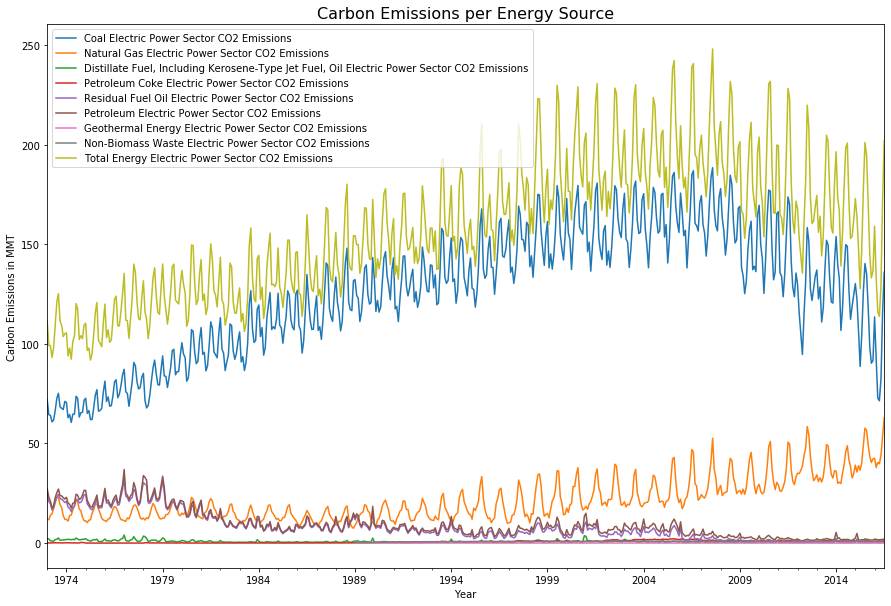

In [31]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
for i in range(1,10):
    ts[ts["Column_Order"] == i]['Value'].plot(label = ts[ts["Column_Order"] == i]["Description"].values[0])

ax.set_ylabel("Carbon Emissions in MMT")
ax.set_title("Carbon Emissions per Energy Source",fontsize=16)
plt.legend()

### We have plotted a line graph for Co2 Emissions across the years for different Column orders , some of the Deductions are:-

1. We can see that **Total Energy electric Power Sector(Yellow line)** has the **highest values** of followed by **Coal Electric Power Sector(blue line)**, also it can be noted that **from the year 1974 there is a constant upward rise** in the emissions till **2008, after that the emissions can be seen declining constantly** in both cases.

2. From the graph it can deduced that **from 1983 to 2012 the line graph for Coal Electric Power Sector Emission and the Total Enegy emissions(yellow line) have a similar trend** 
     - we can further infer that most of the Co2 emissions are caused due to Total Energy Electric Power Sectors

3. From the graph we can also infer that the next highest sector contributing to CO2 emissions initially is the **Residual Fuel Oil Electric Power Sector(purple line) and **Petroleum Electric Power Sector CO2 Emissions** but **after 1979**, both the sectors follow a downward trend gradually, leading to almost negligible amount.
             
4. The **Natural Gas Electric Power Sector(orange line)** shows prominent changes over the year **i.e. initially the total emissions emitted is lesser till 1980** but since then, it gradually increases over the years getting ahead over that of **residual fuel and Petroleum Electric**
    - There's a near to **constant graph from the year 1974 to late 1994,** it is seen that **after 1994** Co2 emissions due to Natural gas is **constantly increasing** 
          
5. **Distillate Fuel(green line) along with petroleum code(red line) and Non-Biomass waste(grey line)** shows near to **negligible emissions**, it was only from 1974 to 1979 where the values were more prominent rest there can be seen some spikes in between

6. **Finally we can infer clearly that Geothermal energy CO2 emissions are almost zero if not and can be stated as the cleanest fuel of all**

## Individually, we can visualize the trend and seasonality effect on CO2 emission from each energy source

In [32]:
Emissions = ts.iloc[:,1:]
Emissions= Emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)

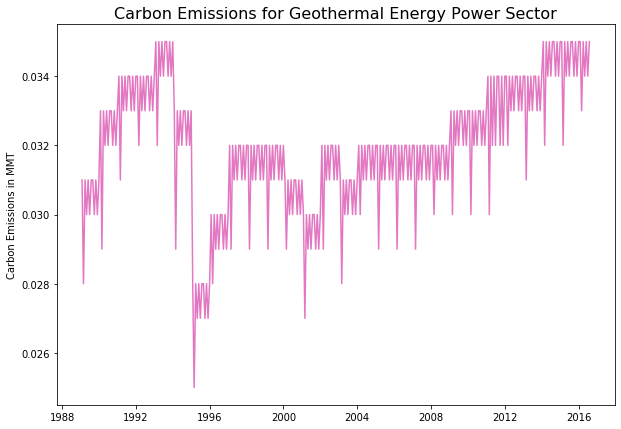

In [33]:
plot_1 = Emissions['Geothermal Energy Electric Power Sector CO2 Emissions']
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
ax.set_ylabel("Carbon Emissions in MMT")
ax.set_title("Carbon Emissions for Geothermal Energy Power Sector",fontsize=16)
plt.plot(plot_1, color='tab:pink')

### Overall Carbon emissions due to Geothermal Energy Power Sector is NEGLIGIBLE as the highest value upto 0.036 MMT

- Geothermal Energy Power Sector shows a CYCLIC **TREND**
- we can observe that from the year 1988 to 1994 an upward trend can be seen and then a sudden downfall can be observed
- from 1998 to 2010 the trend shows a constant periodic cyclic behaviour after that there's a rise in the trend
- The emission's **peak at 0.036 MMT** 

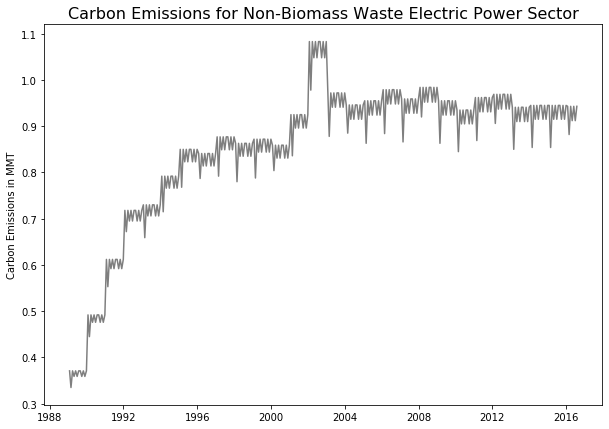

In [34]:
plot_2 = Emissions['Non-Biomass Waste Electric Power Sector CO2 Emissions']
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
ax.set_ylabel("Carbon Emissions in MMT")
ax.set_title("Carbon Emissions for Non-Biomass Waste Electric Power Sector",fontsize=16)
plt.plot(plot_2, color='tab:gray')

### Overall Carbon emissions due to Non-Biomass Waste Electric Power Sector is NEGLIGIBLE as the highest value peaks to 1.1 MMT

- Non-Biomass Waste Electric Power Sector shows a **CONSTANT UPWARD TREND**
- we can observe that from the year 1988 to 2016 an upward trend can be seen 
- The trend shows a **constant periodic cyclic** behaviour there's a rise in the trend
- The emission's **peak at 1.1 MMT** 

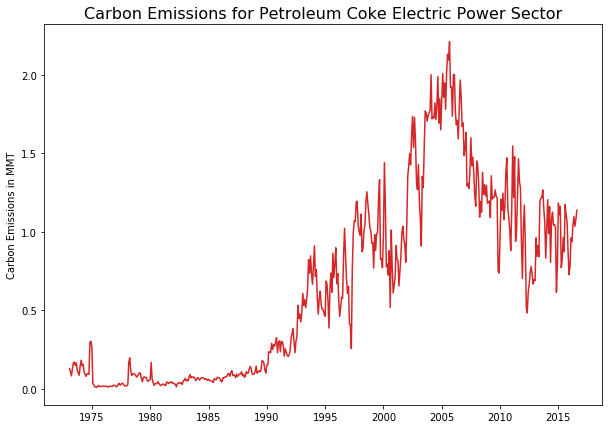

In [35]:
plot_3 = Emissions['Petroleum Coke Electric Power Sector CO2 Emissions']
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
ax.set_ylabel("Carbon Emissions in MMT")
ax.set_title("Carbon Emissions for Petroleum Coke Electric Power Sector",fontsize=16)
plt.plot(plot_3, color='tab:red')

### Overall Carbon emissions due to Petroleum Coke Electric Power Sector is NEGLIGIBLE as the highest value peaks to 2.1 MMT

- Petroleum Coke Electric Power Sector shows a **CYCLIC RANDOM TREND**
- we can observe that from the year 1974 to 1993 shows constant behaviour
- In 1993 there's an upward trend, and from 1992 to 1996 a cyclic trend with some seasonal trends, this cyclic trends repeats
- The emission's **peak at 2.2 MMT** and after that there's a decline in emission

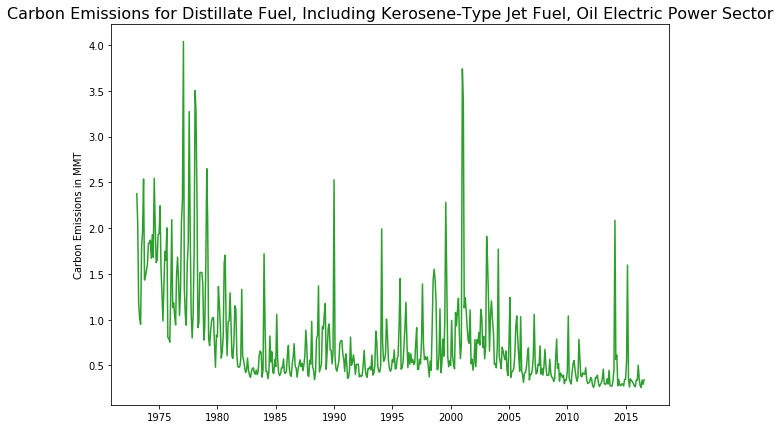

In [36]:
plot_4= Emissions['Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions']
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
ax.set_ylabel("Carbon Emissions in MMT")
ax.set_title("Carbon Emissions for Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector",fontsize=16)
plt.plot(plot_4, color='tab:green')

### Overall Carbon emissions due to Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector is NEGLIGIBLE as the highest value peaks to 4 MMT

- Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector shows a **RANDOM TREND**
- we can observe that from the year 1974 to 1979 shows declining behaviour
- After 1980 it shows a constantly low emission
- The emission's **peak at 4 MMT**

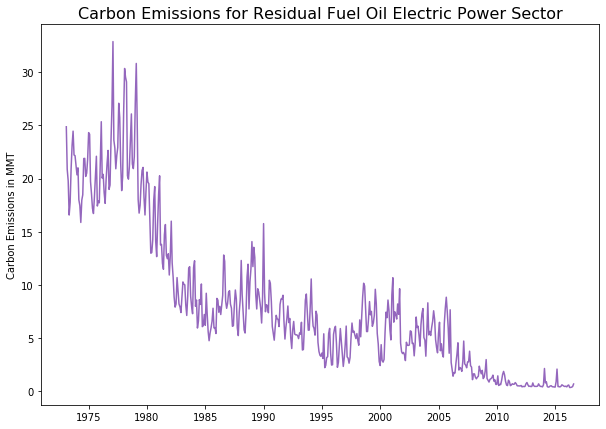

In [37]:
plot_5= Emissions['Residual Fuel Oil Electric Power Sector CO2 Emissions']
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
ax.set_ylabel("Carbon Emissions in MMT")
ax.set_title("Carbon Emissions for Residual Fuel Oil Electric Power Sector",fontsize=16)
plt.plot(plot_5, color='tab:purple')

### Overall Carbon emissions due to Residual Fuel Oil Electric Power Sector is LOW as the highest value peaks to 32 MMT

- Residual Fuel Oil Electric Power Sector shows a **RANDOM TREND**
- we can observe that from the year 1974 to 1979 there's an upward trend
- After 1980 there's a constant decline in emission
- The emission's **peak at 34 MMT**

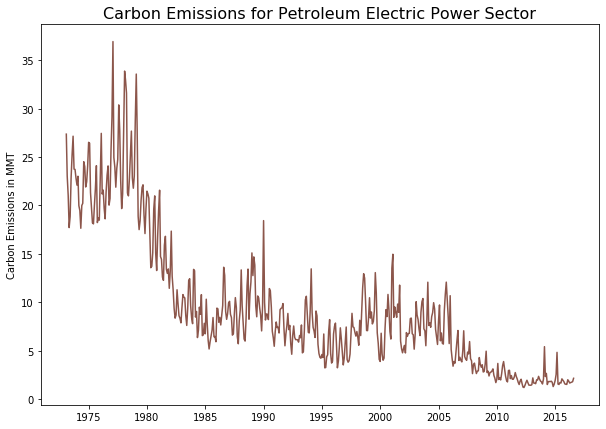

In [38]:
plot_6 = Emissions['Petroleum Electric Power Sector CO2 Emissions']
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
ax.set_ylabel("Carbon Emissions in MMT")
ax.set_title("Carbon Emissions for Petroleum Electric Power Sector",fontsize=16)
plt.plot(plot_6, color='tab:brown')

### Overall Carbon emissions due to Petroleum Electric Power Sector  is LOW as the highest value peaks to 32 MMT

- Petroleum Electric Power Sector shows a **RANDOM TREND**
- It is almost similar to Residual Fuel Oil Electric Power Sector's trend 
- we can observe that from the year 1974 to 1979 there's an upward trend
- After 1980 there's a constant decline in emission
- The emission's **peak at 34 MMT**

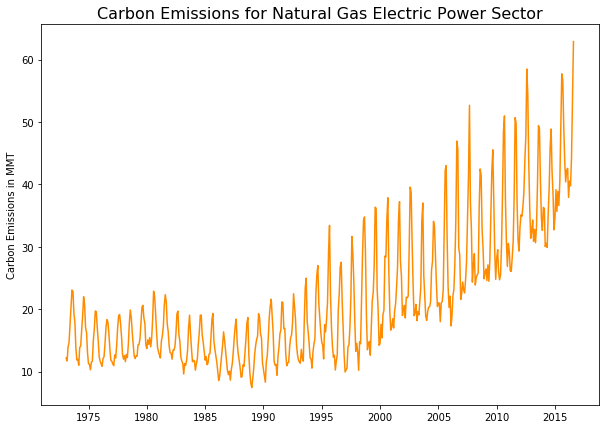

In [39]:
plot_7 = Emissions['Natural Gas Electric Power Sector CO2 Emissions']
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
ax.set_ylabel("Carbon Emissions in MMT")
ax.set_title("Carbon Emissions for Natural Gas Electric Power Sector",fontsize=16)
plt.plot(plot_7, color='darkorange')

### Overall Carbon emissions due to Natural Gas Electric Power Sector  is SIGNIFICANT as the highest value peaks to 62 MMT

- Natural Gas Electric Power Sector shows a **CYCLIC UPWARD TREND**
- we can observe that from the year 1974 to 1990 constant trend after that there's an upward trend
- The emission's **peak at 62 MMT**

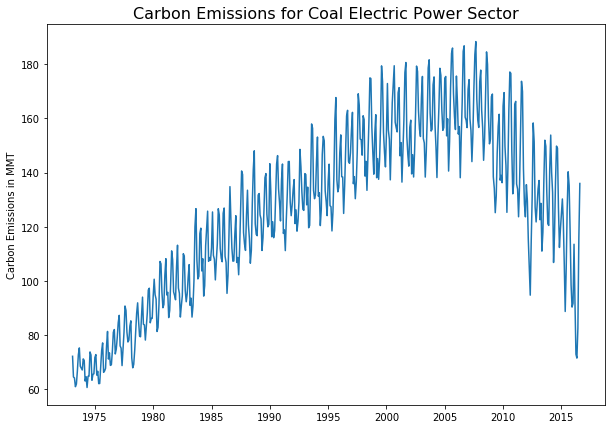

In [40]:
plot_8 = Emissions['Coal Electric Power Sector CO2 Emissions']
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
ax.set_ylabel("Carbon Emissions in MMT")
ax.set_title("Carbon Emissions for Coal Electric Power Sector",fontsize=16)
plt.plot(plot_8, color="tab:blue")

### Overall Carbon emissions due to Coal Electric Power Sector  is SIGNIFICANTLY HIGH as the highest value peaks to 200 MMT

- Natural Gas Electric Power Sector shows a **CYCLIC UPWARD TREND**
- We can observe that from the year 1973 to 2007 constant trend after that there's an upward trend
- After 2008 there's steady decline in the data
- The emission's **peak at 200 MMT**

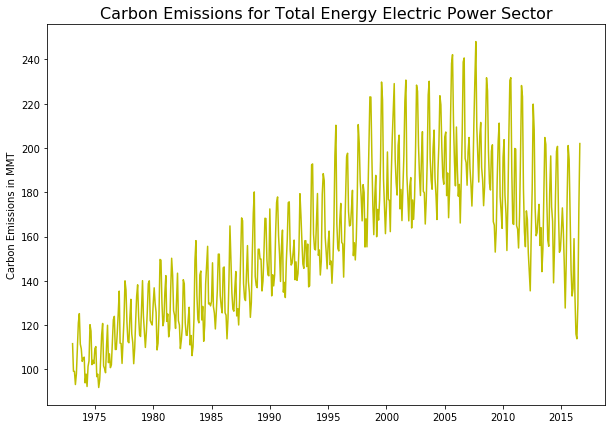

In [41]:
plot_9 = Emissions['Total Energy Electric Power Sector CO2 Emissions']
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
ax.set_ylabel("Carbon Emissions in MMT")
ax.set_title("Carbon Emissions for Total Energy Electric Power Sector",fontsize=16)
plt.plot(plot_9, color='y')

### Total Energy Electric Power shows an UPWARD TREND


#### Calculating the mean values for each Energy Power Sector

In [42]:
df=ts[["Value","Description"]].groupby("Description").mean()
df.sort_values(by='Value')

Value
Description                                                   
Geothermal Energy Electric Power Sector CO2 Emi...    0.031912
Petroleum Coke Electric Power Sector CO2 Emissions    0.647772
Distillate Fuel, Including Kerosene-Type Jet Fu...    0.774163
Non-Biomass Waste Electric Power Sector CO2 Emi...    0.850051
Residual Fuel Oil Electric Power Sector CO2 Emi...    8.105759
Petroleum Electric Power Sector CO2 Emissions         9.527711
Natural Gas Electric Power Sector CO2 Emissions      21.597245
Coal Electric Power Sector CO2 Emissions            125.778954
Total Energy Electric Power Sector CO2 Emissions    157.462096

In [43]:
#plotting bar graph for each category of energy resources
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()
CO2_per_source

Description
Geothermal Energy Electric Power Sector CO2 Emissions                                            10.563
Non-Biomass Waste Electric Power Sector CO2 Emissions                                           281.367
Petroleum Coke Electric Power Sector CO2 Emissions                                              338.785
Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions      404.887
Residual Fuel Oil Electric Power Sector CO2 Emissions                                          4239.312
Petroleum Electric Power Sector CO2 Emissions                                                  4982.993
Natural Gas Electric Power Sector CO2 Emissions                                               11295.359
Coal Electric Power Sector CO2 Emissions                                                      65782.393
Total Energy Electric Power Sector CO2 Emissions                                              82352.676
Name: Value, dtype: float64

In [44]:
CO2_per_source.index


Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [45]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

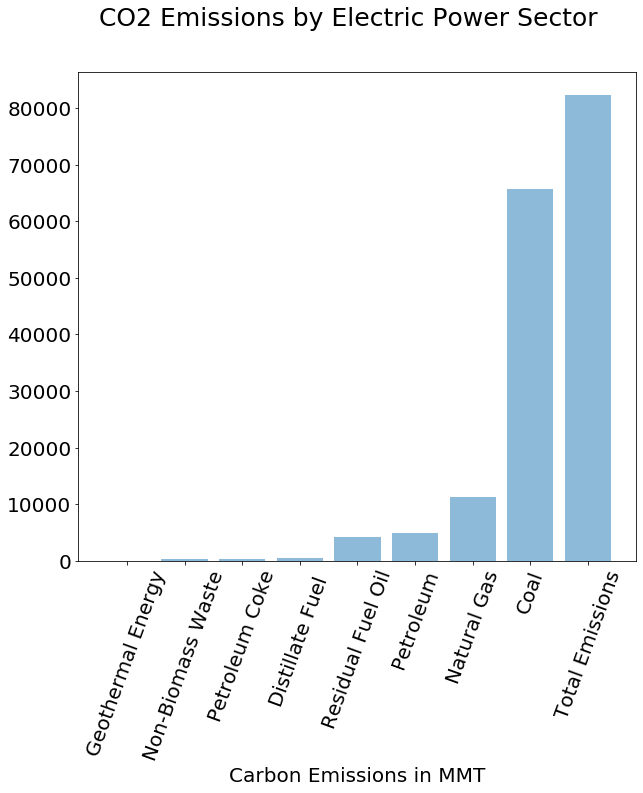

In [46]:
fig = plt.figure(figsize = (10,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

### From the bar chart, we can see that the contribution of COAL to the total CO2 emission is significantly high followed by NATURAL GAS and PETROLEUM


In [47]:
CO2_pie=CO2_per_source.drop("Total Energy Electric Power Sector CO2 Emissions")

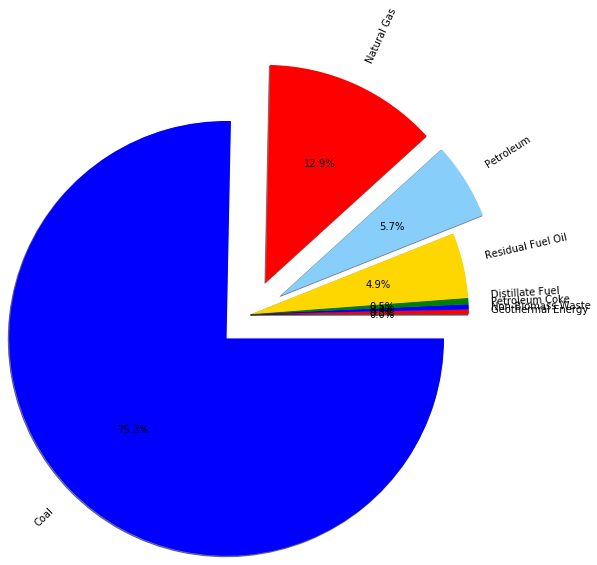

In [48]:
plt.figure(figsize=(2,2))
cols_p = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal']
labels = cols_p
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold']
explode =(0,0,0,0,0,0.8,0.8,0.8) 
plt.pie(CO2_pie, explode = explode,labels= labels, colors=colors, startangle=0, autopct='%.1f%%',radius=5,rotatelabels = 270,shadow=True) 

plt.tight_layout()
plt.show()

#### INFERENCES FROM THE DATASET

- Here we can see that **COAL**, **NATURAL GAS** and **PETROLEUM POWER SECTORS** are the highest contributors of Co2 emissions in the US
- So, we can infer that most of problems due to CO2 are caused by these industries at present and we need to focus on thier emissions to predict how much CO2 they will be emitting in the next 5 years
- The Organization's best interest lies in the prediction of Co2 Emissions caused by **COAL**, **NATURAL GAS** and **PETROLEUM POWER SECTORS**

Further we start creating our prediction model

# MODEL BUILDING

## 1) MODEL BUILDING For Natural Gas Electric Power

In [49]:
# making new dataframe for coal electric power
Ng_df = ts.loc[ts["Column_Order"] == 2,['Value']]
Ng_df.head()

Value
Year              
1973-01-01  12.175
1973-02-01  11.708
1973-03-01  13.994
1973-04-01  14.627
1973-05-01  17.344

### STEP 1: Checking for Stationarity in the series

### Performing stationarity test using Numerical Test and Graphical Test 

Stationarity can be tested using numerical as well as graphical tests 

**Numerical Test using ADF TEST FOR STATIONARITY**

- **Hnull  : series is non-stationary**
- **Halt : series is stationary**

**1)** If the **null hypothesis is rejected**, then the **series is assumed to be stationary**, where the p-value will be less than 0.05.

**2)** If the **null hypothesis is not rejected**, then the **series is assumed to be non-stationary**. We need to difference the variable and repeat the dickey-fuller test to see if the differenced variable is stationary

**Graphical Test using ROLLING MEAN & STANDARD DEVIATION PLOT**

VISUALISING THE STATIONARITY :




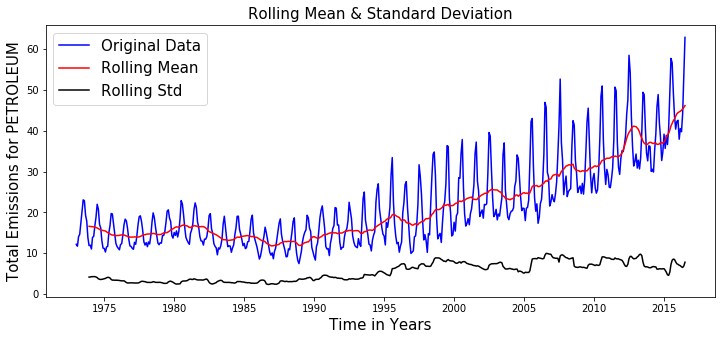

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: 1.8312146208181377
p-value: 0.9984089578807273
Critical Values:
	1%: -3.4434175660489905
	5%: -2.8673031724657454
	10%: -2.5698395516760275


In [50]:
def TestStationary(pte):
    print("VISUALISING THE STATIONARITY :")
    print("\n")
    plt.figure(figsize=(12,5))
    
    #determining rolling ststistics
    rol_mean = pte.rolling(window = 12, center = False).mean()
    rol_std = pte.rolling(window = 12, center = False).std()
    
    #plotting rolling statistics
    plt.plot(pte, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 15)
    plt.ylabel('Total Emissions for PETROLEUM', fontsize = 15)
    plt.legend(loc='best', fontsize = 15)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 15)
    plt.figure(figsize=(50,2000))
    plt.show(block= True)
    
    #performing augmented dickey-fuller test
    print("CHECKING STATIONARITY USING ADF TEST")
    print("\n")
    result = adfuller(pte)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
    
TestStationary(Ng_df.Value)

#### Inferences from the ADF TEST 

- Here we can see that the **p value is not less than 0.05** 
- The critical values are not close to the ADF statistic 
- So using ADF test ,we can conclude that this series is **not stationary.**

#### Inferences from the ROLLING MEAN PLOT

- In the above graph,**Mean varies with respect to time.**
- Stationary Series should have constant mean and constant standard deviation.
- So using graphical test ,we can conclude this series is **not stationary.**

### STEP 2: Converting the series into a Stationary Series

Further, we will convert the non-stationary series into a stationary one by using **DIFFERENCING METHOD**

In [51]:
#differencing series by 1
Ng_df['diffOrdr1'] = np.concatenate(([np.nan], np.diff(Ng_df.Value.T, 1)))
Ng_df

Value  diffOrdr1
Year                         
1973-01-01  12.175        NaN
1973-02-01  11.708     -0.467
1973-03-01  13.994      2.286
1973-04-01  14.627      0.633
1973-05-01  17.344      2.717
...            ...        ...
2016-03-01  40.525      2.607
2016-04-01  39.763     -0.762
2016-05-01  44.210      4.447
2016-06-01  53.567      9.357
2016-07-01  62.881      9.314

[523 rows x 2 columns]

**Again checking the stationarity of the series using the ADF TEST and ROLLING MEAN PLOT**

VISUALISING THE STATIONARITY :




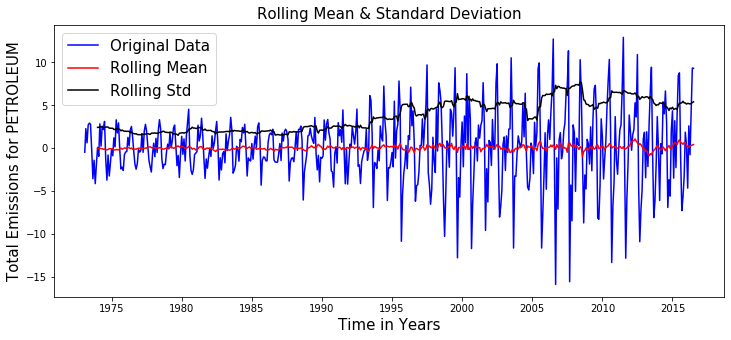

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -5.435115663121019
p-value: 2.857011111657693e-06
Critical Values:
	1%: -3.4434175660489905
	5%: -2.8673031724657454
	10%: -2.5698395516760275


In [52]:
#now againg applying AD fuller test and graphical test
TestStationary(Ng_df.diffOrdr1.dropna(inplace=False))

**we see that the data has become stationary as p value is less than 0.05 and critical values are also near ADF STATISTIC** 

### STEP 3: DECOMPOSITION TO REMOVE TREND AND SEASONALITY FROM THE DATA

In [53]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(Ng_df.Value)

t=decomposition.trend
s=decomposition.seasonal
r=decomposition.resid

In [54]:
r.head(12)

Year
1973-01-01         NaN
1973-02-01         NaN
1973-03-01         NaN
1973-04-01         NaN
1973-05-01         NaN
1973-06-01         NaN
1973-07-01   -2.555604
1973-08-01   -3.210226
1973-09-01   -0.210285
1973-10-01    2.045439
1973-11-01    1.444505
1973-12-01   -0.403729
Name: resid, dtype: float64

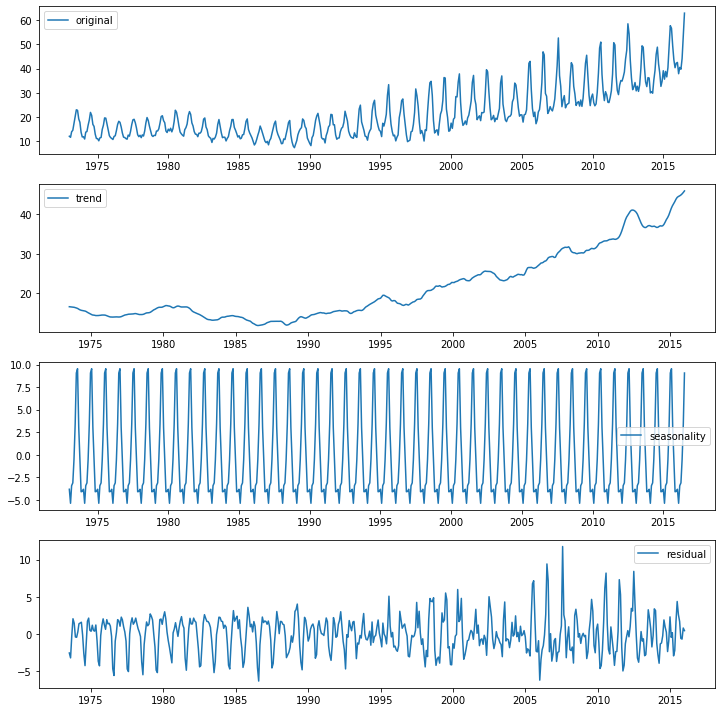

In [55]:
def plot_decomposition(x):
    plt.figure(figsize=(10,10))
    plt.subplot(411)
    plt.plot(x,label='original')
    plt.legend(loc='best')
    plt.subplot(412)
    # compomemts 
    plt.plot(t,label='trend')# plot the trends of the series
    plt.legend(loc='best')
    plt.subplot(413)

    plt.plot(s,label='seasonality')# plot the seasonality of the series
    plt.legend(loc='best')
    plt.subplot(414)

    plt.plot(r,label='residual')# plot the residuals of the series
    plt.legend(loc='best')
    plt.tight_layout()
plot_decomposition(Ng_df.Value)

- **PLOT 1:** Shows the **original series**
- **PLOT 2:** Shows the **trends** in the original series
- **PLOT 3:** Shows the **seasonality** in the original series
- **PLOT 4:** Shows the **residuals** in the original series

VISUALISING THE STATIONARITY :




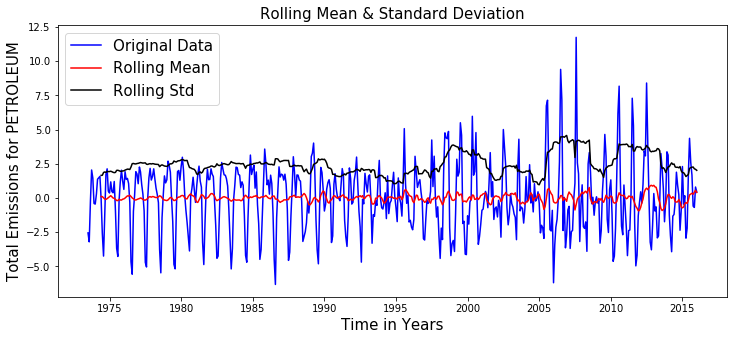

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -8.547083808873628
p-value: 9.439345281556893e-14
Critical Values:
	1%: -3.4437386290417082
	5%: -2.867444458865948
	10%: -2.5699148492415413


In [56]:
TestStationary(r.dropna())

#### DATA MADE STATIONARY BY REMOVING TREND AND SEASON

### STEP 4: FINDING OPTIMAL PARAMETERS  USING ACF AND PACF FOR ARIMA MODEL

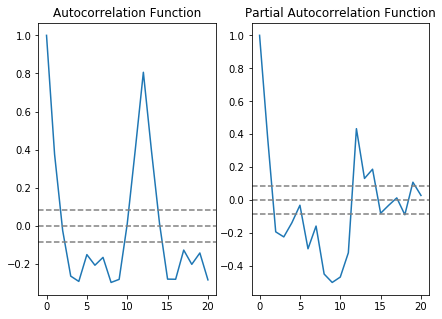

In [57]:


def plot_acf_pacf(x):
    lag_acf=acf(x,nlags=20)
    lag_pacf=pacf(x, nlags=20,method='ols')

    # plot ACF 
    plt.figure(figsize=(7,5))
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(x)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(x)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')

    #Plot PACF
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(x)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(x)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')

plot_acf_pacf(Ng_df.diffOrdr1.dropna())

From the above plots we infer that the  **p value is 2 and the q value is 2**

###  STEP 4.a) : Building ARIMA using ACF-PACF parameters

In [58]:

model_Ng_arima_acf =ARIMA(Ng_df['Value'],order=(2,1,2))
model_fit=model_Ng_arima_acf.fit()


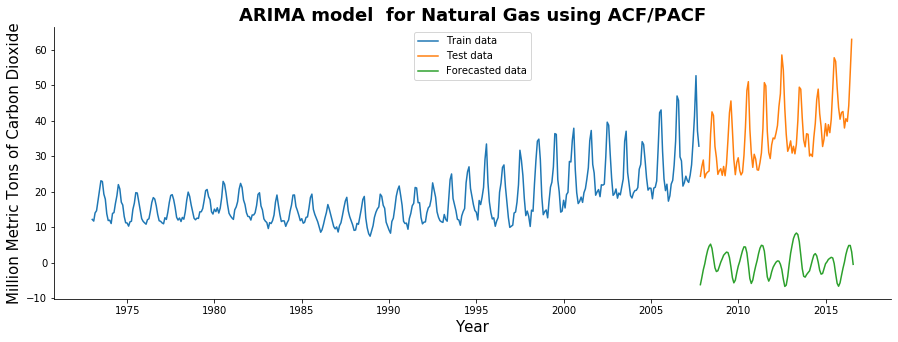

In [59]:
def plot_model(dataframe,model,desc):
    plt.figure(figsize=(15, 5))
    plt.plot(dataframe.iloc[:418], label='Train data')
    plt.plot(dataframe.iloc[418:], label='Test data')
    plt.plot(model.predict(start = 418,end = 523), label='Forecasted data')
    plt.legend(loc='upper center')
    sns.despine()
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Million Metric Tons of Carbon Dioxide', fontsize=15)
    plt.title(desc[0] +' model  for '+ desc[1]+' using ' + desc[2], fontsize=18, weight='bold')
    plt.show()
plot_model(Ng_df.Value,model_fit,['ARIMA','Natural Gas','ACF/PACF'])

From the graph we can see that forcasted data does not coincide with the trends of the test data , 

**hence the arima model with (2,1,2) as p , d, q parameters is not apt for the predictions**

In [60]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Ng_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))


37.73087250626946

**The RMSE value is 37 which is high**

### STEP 4.b) BUILDING ARIMA MODEL BY FINDING OPTIMAL PARAMETERS USING GRID SEARCH

In [61]:
import itertools
def grid_search_ARIMA(dataframe):
    p = range(0,11)
    q =range(0,3)
    d = range(0,3)

    pdq = list(itertools.product(p, d, q))

    a=[]
    c=[]
    wf=pd.DataFrame()
    warnings.filterwarnings("ignore") # specify to ignore warning messages
    
    for param in pdq:
        try:
            mod = ARIMA(dataframe,order = param)

            results = mod.fit()
            print('ARIMA{} - AIC:{}'.format(param, results.aic))
            a.append(param)
            c.append(results.aic)
        except:
            continue
    wf['pdq']=a
    wf['aic']=c
    print(wf[wf['aic']==wf['aic'].min()])
grid_search_ARIMA(Ng_df.Value)

ARIMA(0, 0, 0) - AIC:3955.2357485062707
ARIMA(0, 0, 1) - AIC:3410.3097426873414
ARIMA(0, 1, 0) - AIC:2938.4657937692796
ARIMA(0, 1, 1) - AIC:2854.0684744842692
ARIMA(0, 1, 2) - AIC:2848.651547139094
ARIMA(0, 2, 0) - AIC:3045.2529272101033
ARIMA(0, 2, 1) - AIC:3014.687241120494
ARIMA(0, 2, 2) - AIC:2856.9407720787385
ARIMA(1, 0, 0) - AIC:2935.206427191778
ARIMA(1, 0, 1) - AIC:2839.4744322385877
ARIMA(1, 0, 2) - AIC:2823.236700948646
ARIMA(1, 1, 0) - AIC:2860.301709204435
ARIMA(1, 1, 1) - AIC:2899.830764074738
ARIMA(1, 1, 2) - AIC:2782.2310316158473
ARIMA(1, 2, 0) - AIC:3029.7315700140252
ARIMA(2, 0, 0) - AIC:2832.7706541639154
ARIMA(2, 0, 1) - AIC:2830.2369693423243
ARIMA(2, 0, 2) - AIC:2806.873281636254
ARIMA(2, 1, 0) - AIC:2843.1165757306944
ARIMA(2, 1, 1) - AIC:2712.5045130783956
ARIMA(2, 1, 2) - AIC:2640.9542804139965
ARIMA(2, 2, 0) - AIC:3017.750238743034
ARIMA(3, 0, 0) - AIC:2826.77676047382
ARIMA(3, 0, 1) - AIC:2738.732779654327
ARIMA(3, 0, 2) - AIC:2663.960582036141
ARIMA(3, 1, 

**From the above GRID SEARCH algo we found that our best parameters p,d,q is (10,1,2) where the AIC value is 2271.73014.
AIC(Akaike Information Criterion) is the value that tells us about the actuality of the data**

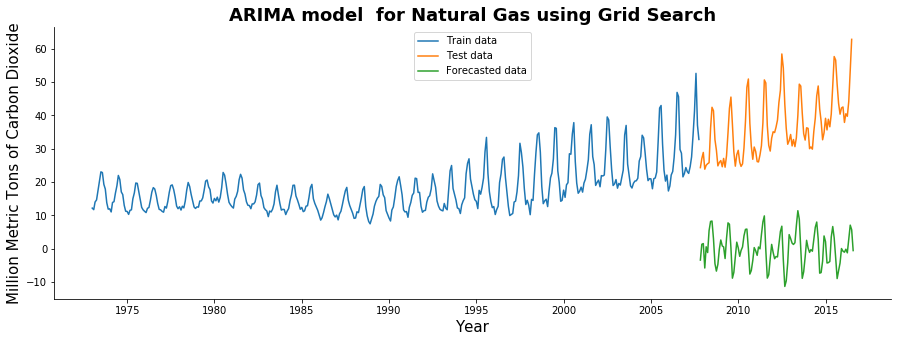

In [62]:

# Model building

model_Ng_arima_grid =ARIMA(Ng_df['Value'],order=(10,1,2))
model_fit=model_Ng_arima_grid.fit()

                
# Visualization
plot_model(Ng_df.Value,model_fit,['ARIMA','Natural Gas','Grid Search'])


##### The graph shows that even after using grid search and finding the best parameters with least AIC values, we can see that the forecasted data does not coincide with the trends of the test data

In [63]:
np.sqrt(mean_squared_error(Ng_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))


37.601120928016286

##### The RMSE value of arima model using grid search is same as the RMSE value of arima model using ACF/PACF plot 

###  STEP 5 : BUILDING SARIMA MODEL

### STEP 5.a) : Grid search approch to get the best parameters for SARIMA model

In [64]:
import itertools
def grid_search_SARIMA(dataframe):
    p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
    pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
    pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
    a=[]
    b=[]
    c=[]
    wf=pd.DataFrame()
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    for param in pdq:
        for param_seasonal in pdq_x_QDQs:
            try:
                mod = sm.tsa.statespace.SARIMAX(dataframe,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()

                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                a.append(param)
                b.append(param_seasonal)
                c.append(results.aic)
            except:
                continue
    wf['pdq']=a
    wf['pdq_x_QDQs']=b
    wf['aic']=c
    print(wf[wf['aic']==wf['aic'].min()])
grid_search_SARIMA(Ng_df.Value)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4804.065995091217
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4135.62564818642
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2572.1947577443707
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2504.209502835856
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2544.146426616796
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2465.147262997285
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2511.043139693216
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2505.8402380709167
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4157.561225515836
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3572.105902259915
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2334.7247254090544
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2245.507386420788
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2329.044601381015
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2218.6800978531505
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2262.0627979899255
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2247.532772188906
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2932.1335743055993
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2616.0128108187673
ARIM

**From the above GRID SEARCH algo we found that our best parameters p,d,q is (1,1,1) and QDQ is (0, 1, 1, 12) and AIC value is 2003.553442**

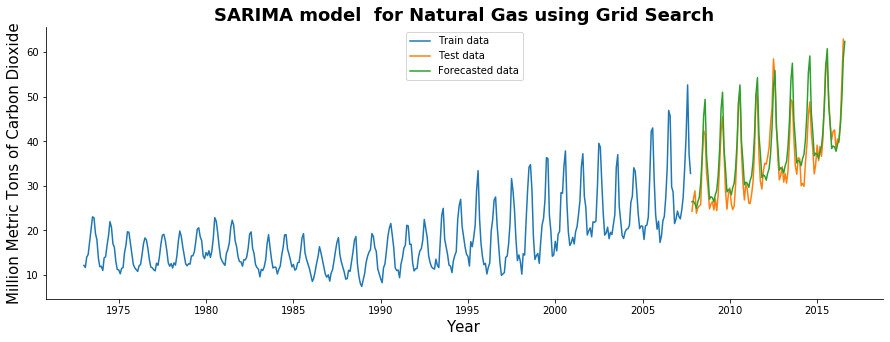

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 418
# Model building
model_Ng_sarima_grid = SARIMAX(Ng_df.Value.iloc[:k], 
                order=(1, 1, 1), 
                seasonal_order=(0, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_Ng_sarima_grid.fit(disp=False)
# Visualization
plot_model(Ng_df.Value,model_fit,['SARIMA','Natural Gas','Grid Search'])


**The line graph shows that the forecasted value almost coincides the with the trends of the test data**

**Hence the predictions using SARIMA model are more accurate**

In [66]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Ng_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))


3.8317648255823142

**The RMSE value for SARIMA model with the seasnal parameters predicted using grid search gives the is very less**

### STEP 5.b) : Building SARIMA using ACF/PACF 

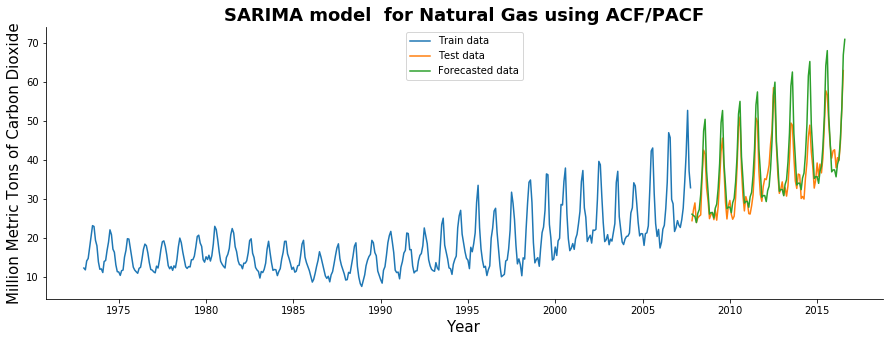

In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 418
# Model building
model_Ng_sarima_acf = SARIMAX(Ng_df.Value.iloc[:k], 
                order=(2, 1, 2), 
                seasonal_order=(1, 0, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_Ng_sarima_acf.fit(disp=False)
# Visualization
plot_model(Ng_df.Value,model_fit,['SARIMA','Natural Gas','ACF/PACF'])


In [68]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Ng_df.Value.iloc[k:], model_fit.predict(start = 419,end = 523)))


7.355881217997666

### STEP 6 : FORECASTING THE VALUES USING GRID SEARCH PARAMETERS

In [69]:
Ng_df.iloc[417]

Value        32.800
diffOrdr1    -4.294
Name: 2007-10-01 00:00:00, dtype: float64

In [70]:
l = model_fit.predict(start = 523,end = 583)




In [71]:
temp = Ng_df.Value
temp.head()

Year
1973-01-01    12.175
1973-02-01    11.708
1973-03-01    13.994
1973-04-01    14.627
1973-05-01    17.344
Name: Value, dtype: float64

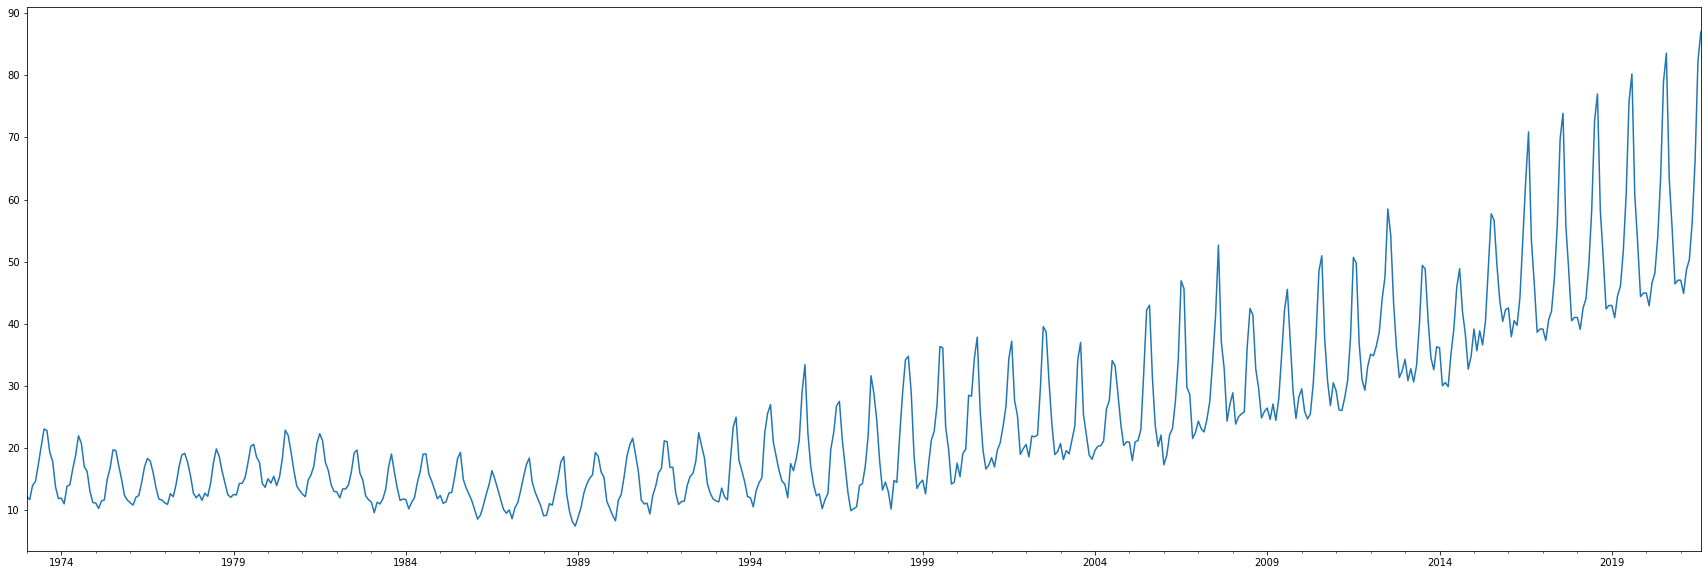

In [72]:
future_Ng = temp.append(l)
plt.figure(figsize=(30,10))
future_Ng.plot()

#### The above graph shows the forcasted values

# EVALUATING THE BEST MODEL

In [73]:
eva_matrix = pd.DataFrame([[37.73,7.35],[37.60,3.83]],columns=['ARIMA','SARIMA'],index = ['ACF/PACF','Grid Search'])

In [74]:
print("Natural Gas Energy Resource Model Comparision \n\n",eva_matrix)

Natural Gas Energy Resource Model Comparision 

              ARIMA  SARIMA
ACF/PACF     37.73    7.35
Grid Search  37.60    3.83


### Some inferences:

1. ARIMA model serves RMSE values as 37 with ACF/PACF plot as well as GRID SEARCH
2. From the above evaluation matrix we see that **ARIMA MODEL performs poorly in evaluating the seasonal data**
3. SARIMA MODEL gives the best possible predictions for the seasonal data
4. The RMSE values are the **least** in **SARIMA MODEL USING GRID SEARCH**



## 2) MODEL BUILDING FOR COAL ELECTRIC POWER

In [75]:
# making new dataframe for coal electric power
ce_df = ts.loc[ts["Column_Order"] == 1,['Value']]
ce_df.head()

Value
Year              
1973-01-01  72.076
1973-02-01  64.442
1973-03-01  64.084
1973-04-01  60.842
1973-05-01  61.798

### STEP 1: Checking for Stationarity in the series

VISUALISING THE STATIONARITY :




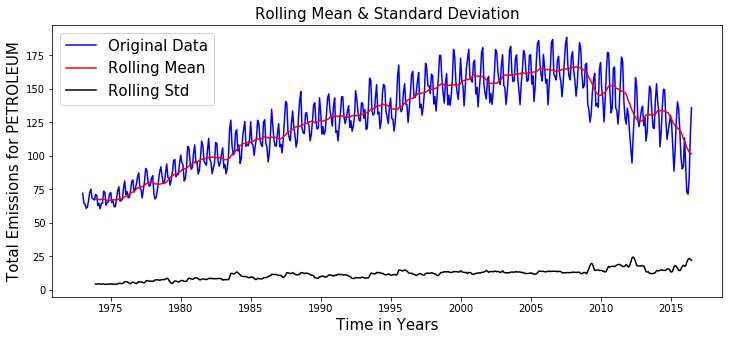

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -1.8276309255572207
p-value: 0.36683253565668955
Critical Values:
	1%: -3.44328828958775
	5%: -2.8672462791357867
	10%: -2.569809231353463


In [76]:
#checking stationarity
TestStationary(ce_df.Value)

#### Inferences from the ADF TEST 

- Here we can see that the **p value is not less than 0.05** 
- The critical values are not close to the ADF statistic 
- So using ADF test ,we can conclude that this series is **not stationary.**

#### Inferences from the ROLLING MEAN PLOT

- In the above graph,**Mean varies with respect to time.**
- Stationary Series should have constant mean and constant standard deviation.
- So using graphical test ,we can conclude this series is **not stationary.**

### STEP 2: Converting the series into a Stationary Series

Further, we will convert the non-stationary series into a stationary one by using **DIFFERENCING METHOD**

In [77]:
#differencing series by 1
ce_df['diffOrdr1'] = np.concatenate(([np.nan], np.diff(ce_df.Value.T, 1)))
ce_df

Value  diffOrdr1
Year                          
1973-01-01   72.076        NaN
1973-02-01   64.442     -7.634
1973-03-01   64.084     -0.358
1973-04-01   60.842     -3.242
1973-05-01   61.798      0.956
...             ...        ...
2016-03-01   72.840    -19.576
2016-04-01   71.410     -1.430
2016-05-01   82.510     11.100
2016-06-01  115.772     33.262
2016-07-01  135.958     20.186

[523 rows x 2 columns]

**Again checking the stationarity of the series using the ADF TEST and ROLLING MEAN PLOT**

VISUALISING THE STATIONARITY :




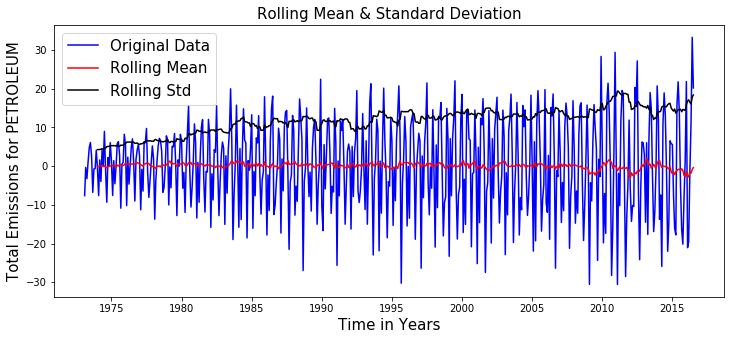

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -5.302530676309385
p-value: 5.4099459161927235e-06
Critical Values:
	1%: -3.44328828958775
	5%: -2.8672462791357867
	10%: -2.569809231353463


In [78]:
#now againg applying AD fuller test and graphical test
TestStationary(ce_df.diffOrdr1.dropna(inplace=False))

### STEP 3: DECOMPOSITION TO REMOVE TREND AND SEASONALITY FROM THE DATA

In [79]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(ce_df.Value)

t=decomposition.trend
s=decomposition.seasonal
r=decomposition.resid

In [80]:
r.head(12)

Year
1973-01-01          NaN
1973-02-01          NaN
1973-03-01          NaN
1973-04-01          NaN
1973-05-01          NaN
1973-06-01          NaN
1973-07-01   -11.751739
1973-08-01    -9.000152
1973-09-01     1.484845
1973-10-01     5.987187
1973-11-01     5.981190
1973-12-01    -2.532511
Name: resid, dtype: float64

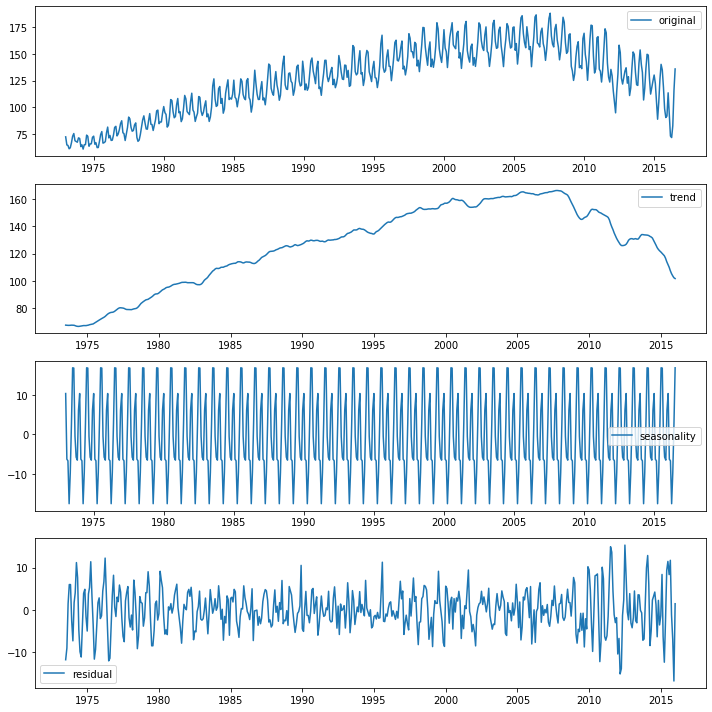

In [81]:
plot_decomposition(ce_df.Value)

- **PLOT 1:** Shows the **original series**
- **PLOT 2:** Shows the **trends** in the original series
- **PLOT 3:** Shows the **seasonality** in the original series
- **PLOT 4:** Shows the **residuals** in the original series

VISUALISING THE STATIONARITY :




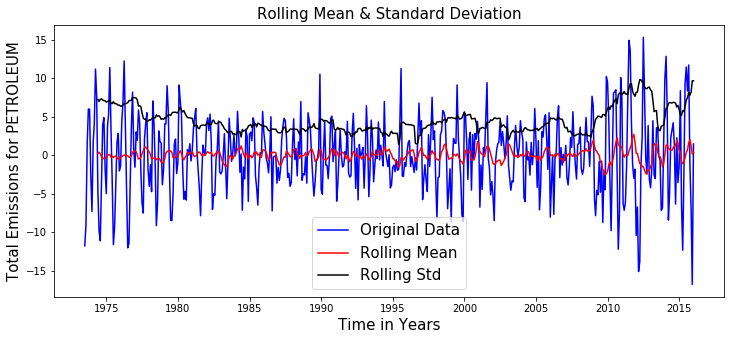

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -10.307094289009546
p-value: 3.2573805067881677e-18
Critical Values:
	1%: -3.4436029548776395
	5%: -2.867384756137026
	10%: -2.5698830308597813


In [82]:
TestStationary(r.dropna())

##### DATA MADE STATIONARY BY REMOVING TREND AND SEASON

### STEP 4: FINDING OPTIMAL PARAMETERS  USING ACF AND PACF

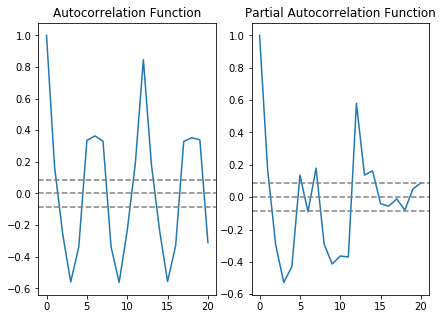

In [83]:
from statsmodels.tsa.stattools import acf,pacf

plot_acf_pacf(ce_df.diffOrdr1.dropna())

From the above plots we infer that the  **p value is 1 and the q value is 1**

###  STEP 4.a) : Building ARIMA using ACF/PACF parameters

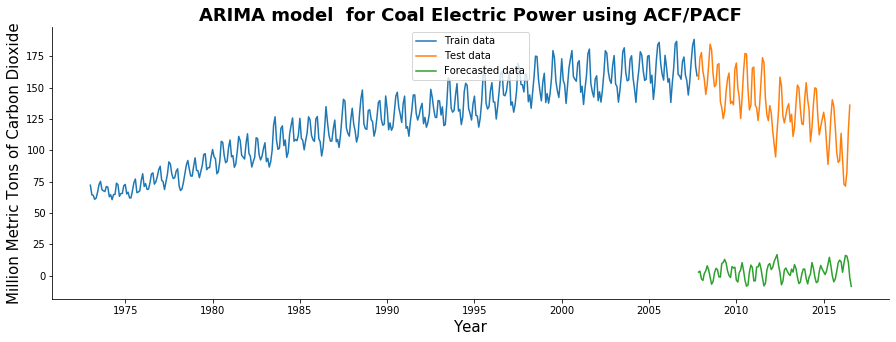

In [84]:
# Values to keep in training data, k
k = 418
# Model building

model_ce_arima_acf =ARIMA(ce_df['Value'],order=(1,1,1))
model_fit=model_ce_arima_acf.fit()
                
# Visualization
plot_model(ce_df.Value,model_fit,['ARIMA','Coal Electric Power','ACF/PACF'])

From the graph we can see that forcasted data does not coincide with the trends of the test data , 

**hence the arima model with (1,1,) as p , d, q parameters is not apt for the predictions**

In [85]:
np.sqrt(mean_squared_error(ce_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))


135.55813331585057

**The RMSE value is 37 which is high**

### STEP 4.b) FINDING OPTIMAL PARAMETERS FOR ARIMA MODEL USING GRID SEARCH

In [86]:
grid_search_ARIMA(ce_df.Value)

ARIMA(0, 0, 0) - AIC:5109.22282333715
ARIMA(0, 0, 1) - AIC:4575.660772805952
ARIMA(0, 1, 0) - AIC:4055.209371839117
ARIMA(0, 1, 1) - AIC:4034.679136183131
ARIMA(0, 1, 2) - AIC:3919.733286561196
ARIMA(0, 2, 0) - AIC:4311.8614495488
ARIMA(0, 2, 1) - AIC:4056.625817714693
ARIMA(0, 2, 2) - AIC:4035.766507093802
ARIMA(1, 0, 0) - AIC:4049.496428929546
ARIMA(1, 0, 1) - AIC:4020.7884422633915
ARIMA(1, 0, 2) - AIC:3931.850876653006
ARIMA(1, 1, 0) - AIC:4042.234811275265
ARIMA(1, 1, 1) - AIC:3971.9653105926836
ARIMA(1, 1, 2) - AIC:3901.2892318126887
ARIMA(1, 2, 0) - AIC:4280.679367503293
ARIMA(2, 0, 0) - AIC:4028.0511053822747
ARIMA(2, 0, 1) - AIC:4022.786369209026
ARIMA(2, 0, 2) - AIC:3913.629436672347
ARIMA(2, 1, 0) - AIC:3997.452003115033
ARIMA(2, 1, 1) - AIC:3820.63501904671
ARIMA(2, 1, 2) - AIC:3800.4980573289713
ARIMA(2, 2, 0) - AIC:4272.692214378706
ARIMA(3, 0, 0) - AIC:3994.8001090503103
ARIMA(3, 0, 1) - AIC:3832.5601196116986
ARIMA(3, 1, 0) - AIC:3834.2425277752336
ARIMA(3, 1, 1) - AIC:

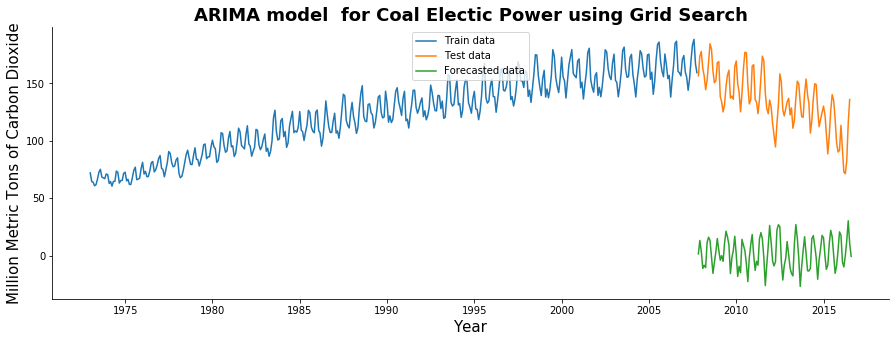

In [87]:
# Values to keep in training data, k
k = 418
# Model building
model_ce_arima_grid = ARIMA(ce_df.Value, order=(10, 1, 2)) 
                
model_fit = model_ce_arima_grid.fit()
# Visualization
plot_model(ce_df.Value,model_fit,['ARIMA','Coal Electic Power','Grid Search'])

From the graph we can see that forcasted data does not coincide with the trends of the test data , 

**hence the arima model with (10,1,2) as p , d, q parameters is not apt for the predictions**

In [88]:
#RMSE

np.sqrt(mean_squared_error(ce_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))


136.20084950034055

The RMSE value is 136 which is very high

###  STEP 5 : Building SARIMA Model

### STEP 5.a) : Grid search approch to get the best parameters for SARIMA model


In [89]:
grid_search_SARIMA(ce_df.Value)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6563.79623922923
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5777.923009654421
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3661.3412697358126
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3587.865272596378
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3669.0845581449253
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3664.249483074564
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3594.1782204021893
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3589.8615951446545
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5887.028557031823
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5167.546202302623
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3380.9982067753217
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3297.343449768515
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3394.6954073004636
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3368.434905194713
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3310.6608152610497
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3299.881177375215
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4046.080861178975
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3650.779765174424
ARIM

**From the above GRID SEARCH algo we found that our best parameters p,d,q is (1,1,1) and QDQ is (0, 1, 1, 12) and AIC value is 2948.56943**

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 418
# Model building
model_ce_sarima_grid = SARIMAX(ce_df.Value.iloc[:k], 
                order=(1, 1, 1), 
                seasonal_order=(0, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_ce_sarima_grid.fit(disp=False)

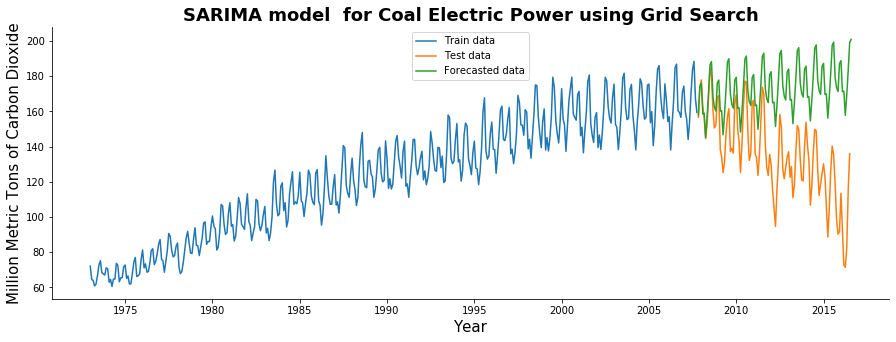

In [91]:
plot_model(ce_df.Value,model_fit,['SARIMA','Coal Electric Power','Grid Search'])

**The line graph shows that the forecasted value almost coincides the with the trends of the test data**

**Hence the predictions using SARIMA model are more accurate**

In [92]:
# RMSE

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ce_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))

43.643862771180935

### STEP 5.b) Building SARIMA USING ACF/PACF

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 418
# Model building
model_ce_sarima_acf = SARIMAX(ce_df.Value.iloc[:k], 
                order=(1, 1, 1), 
                seasonal_order=(0, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_ce_sarima_acf.fit(disp=False)

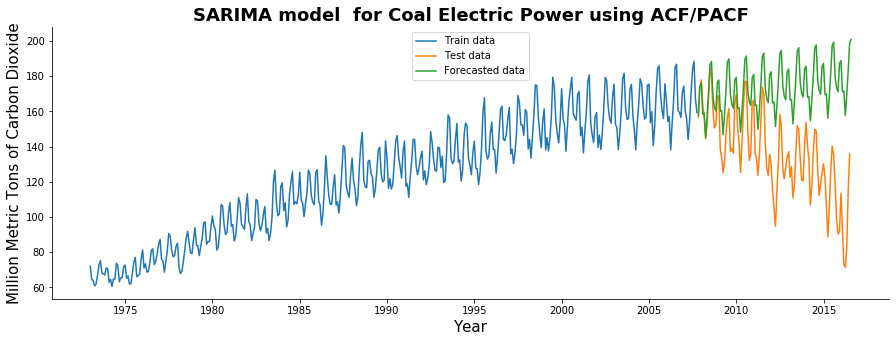

In [94]:
plot_model(ce_df.Value,model_fit,['SARIMA','Coal Electric Power','ACF/PACF'])        

In [95]:
#RMSE

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ce_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))

43.643862771180935

### STEP 6 : FORECASTING THE VALUES USING GRID SEARCH PARAMETERS

In [96]:
l = model_fit.predict(start=523,end=583)


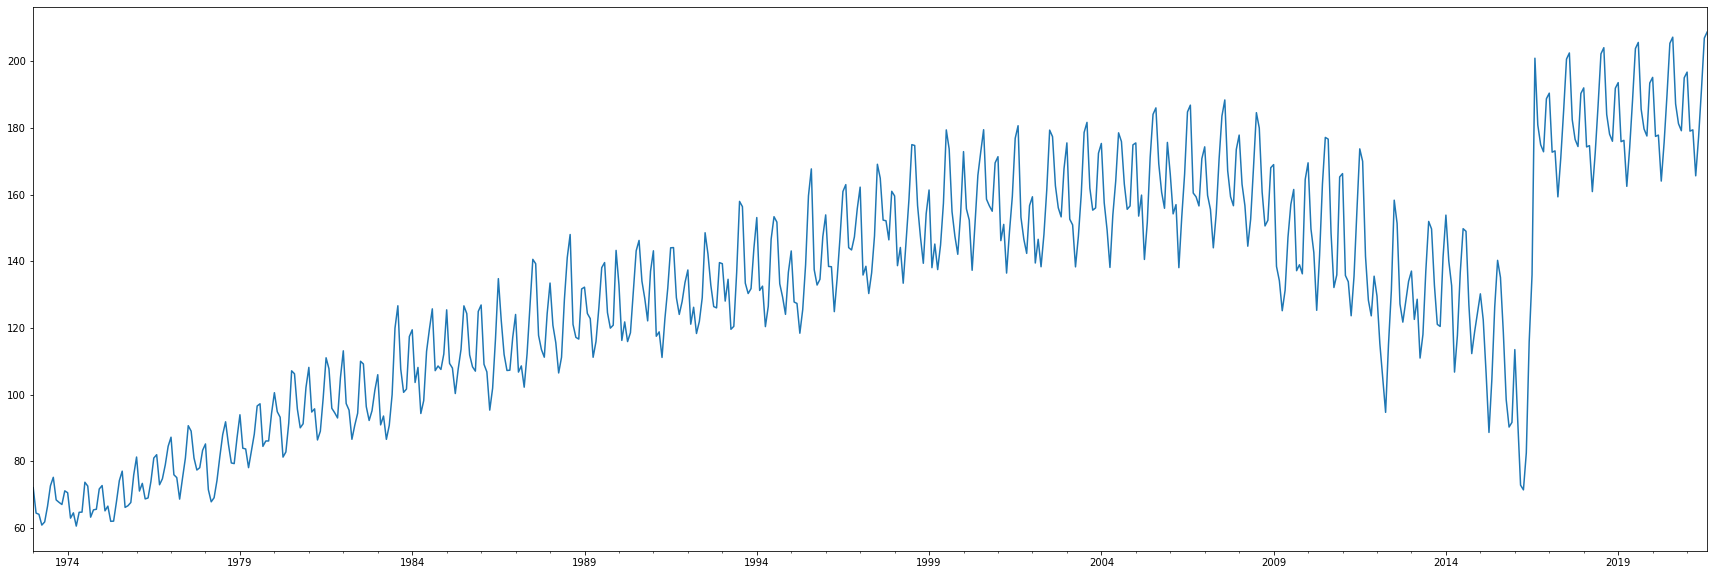

In [97]:
temp = ce_df.Value

future_ce = temp.append(l)
plt.figure(figsize=(30,10))

future_ce.plot()

#### The above graph shows the forcasted values

In [98]:
#COMPARISON

eva_matrix = pd.DataFrame([[135.50,43.64],[136.10,43.64]],columns=['ARIMA','SARIMA'],index = ['ACF/PACF','Grid Search'])

In [99]:
print("Coal Energy Resource Model Comparision \n\n",eva_matrix)

Coal Energy Resource Model Comparision 

              ARIMA  SARIMA
ACF/PACF     135.5   43.64
Grid Search  136.1   43.64


### Some inferences:

1. ARIMA model serves RMSE values as 37 with ACF/PACF plot as well as GRID SEARCH
2. From the above evaluation matrix we see that **ARIMA MODEL performs poorly in evaluating the seasonal data**
3. SARIMA MODEL gives the best possible predictions for the seasonal data
4. The RMSE values are the **least** in **SARIMA MODEL USING GRID SEARCH**



## 3) MODEL BUILDING FOR Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector 

In [100]:
# making new dataframe for coal electric power
de_df = ts.loc[ts["Column_Order"] == 3,['Value']]
de_df.head()

Value
Year             
1973-01-01  2.375
1973-02-01  2.061
1973-03-01  1.171
1973-04-01  1.022
1973-05-01  0.949

### STEP 1: Checking for Stationarity in the series

### Performing stationarity test using Numerical Test and Graphical Test 

Stationarity can be tested using numerical as well as graphical tests 

**Numerical Test using ADF TEST FOR STATIONARITY**

- **Hnull  : series is non-stationary**
- **Halt : series is stationary**

**1)** If the **null hypothesis is rejected**, then the **series is assumed to be stationary**, where the p-value will be less than 0.05.

**2)** If the **null hypothesis is not rejected**, then the **series is assumed to be non-stationary**. We need to difference the variable and repeat the dickey-fuller test to see if the differenced variable is stationary

**Graphical Test using ROLLING MEAN & STANDARD DEVIATION PLOT**

VISUALISING THE STATIONARITY :




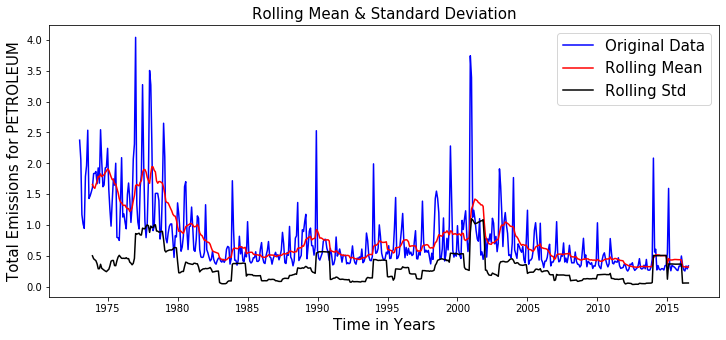

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -2.6120387161617757
p-value: 0.09053454920780746
Critical Values:
	1%: -3.443339692005083
	5%: -2.8672689011327894
	10%: -2.569821287318971


In [101]:
#checking stationarity
TestStationary(de_df.Value)

#### Inferences from the ADF TEST 

- Here we can see that the **p value is not less than 0.05** 
- The critical values are not close to the ADF statistic 
- So using ADF test ,we can conclude that this series is **not stationary.**

#### Inferences from the ROLLING MEAN PLOT

- In the above graph,**Mean varies with respect to time.**
- Stationary Series should have constant mean and constant standard deviation.
- So using graphical test ,we can conclude this series is **not stationary.**

### STEP 2: Converting the series into a Stationary Series

Further, we will convert the non-stationary series into a stationary one by using **DIFFERENCING METHOD**

In [102]:
#differencing series by 1
de_df['diffOrdr1'] = np.concatenate(([np.nan], np.diff(de_df.Value.T, 1)))
de_df

Value  diffOrdr1
Year                        
1973-01-01  2.375        NaN
1973-02-01  2.061     -0.314
1973-03-01  1.171     -0.890
1973-04-01  1.022     -0.149
1973-05-01  0.949     -0.073
...           ...        ...
2016-03-01  0.279     -0.074
2016-04-01  0.259     -0.020
2016-05-01  0.340      0.081
2016-06-01  0.293     -0.047
2016-07-01  0.342      0.049

[523 rows x 2 columns]

**Again checking the stationarity of the series using the ADF TEST and ROLLING MEAN PLOT**

VISUALISING THE STATIONARITY :




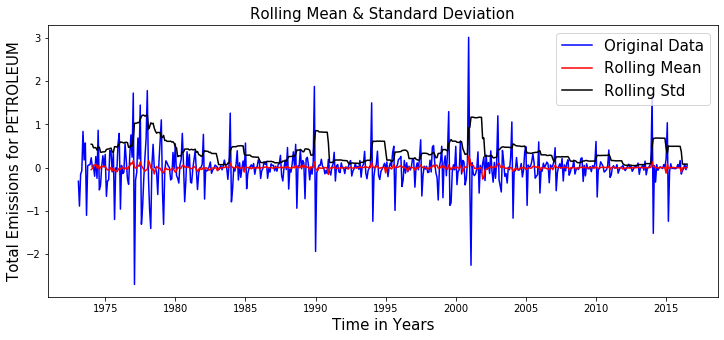

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -9.140038260985262
p-value: 2.865771681999569e-15
Critical Values:
	1%: -3.443339692005083
	5%: -2.8672689011327894
	10%: -2.569821287318971


In [103]:
#now againg applying AD fuller test and graphical test
TestStationary(de_df.diffOrdr1.dropna(inplace=False))

**we see that the data has become stationary as p value is less than 0.05 and critical values are also near ADF STATISTIC** 

### STEP 3: DECOMPOSITION TO REMOVE TREND AND SEASONALITY FROM THE DATA

In [104]:
decomposition=seasonal_decompose(de_df.Value)

t=decomposition.trend
s=decomposition.seasonal
r=decomposition.resid

In [105]:
r.head(12)

Year
1973-01-01         NaN
1973-02-01         NaN
1973-03-01         NaN
1973-04-01         NaN
1973-05-01         NaN
1973-06-01         NaN
1973-07-01    0.123961
1973-08-01    0.798255
1973-09-01   -0.034299
1973-10-01    0.024633
1973-11-01   -0.047522
1973-12-01   -0.304177
Name: resid, dtype: float64

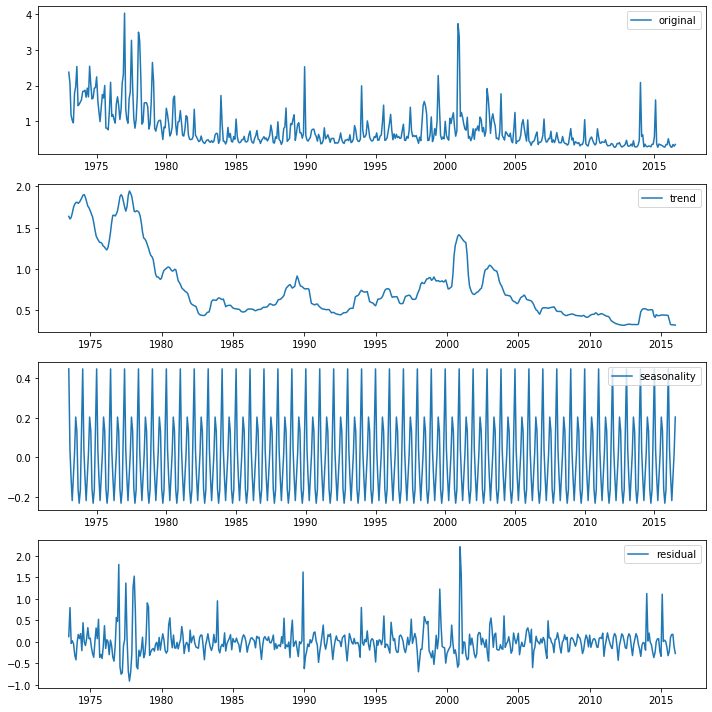

In [106]:
plot_decomposition(de_df.Value)

- **PLOT 1:** Shows the **original series**
- **PLOT 2:** Shows the **trends** in the original series
- **PLOT 3:** Shows the **seasonality** in the original series
- **PLOT 4:** Shows the **residuals** in the original series

VISUALISING THE STATIONARITY :




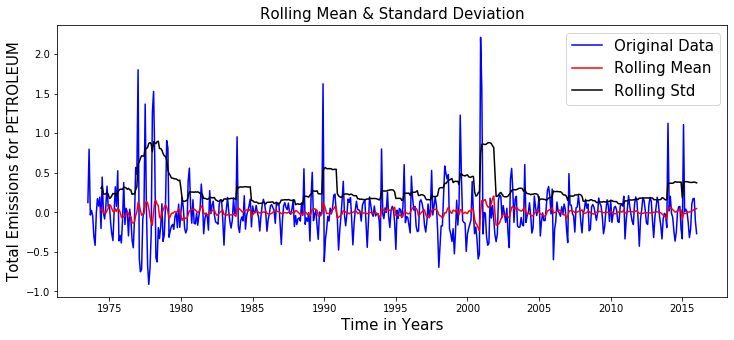

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -10.306102956178544
p-value: 3.275835062488194e-18
Critical Values:
	1%: -3.4436298692815304
	5%: -2.867396599893435
	10%: -2.5698893429241916


In [107]:
TestStationary(r.dropna())

#### DATA MADE STATIONARY BY REMOVING TREND AND SEASON

### STEP 4: FINDING OPTIMAL PARAMETERS  USING ACF AND PACF FOR ARIMA MODEL

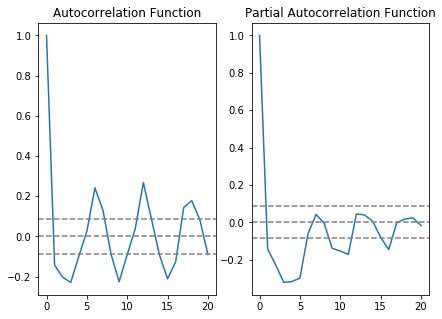

In [108]:
plot_acf_pacf(de_df.diffOrdr1.dropna())

From the above plots we infer that the  **p value is 1 and the q value is 0**

###  STEP 4.a) : Building ARIMA using ACF-PACF parameters

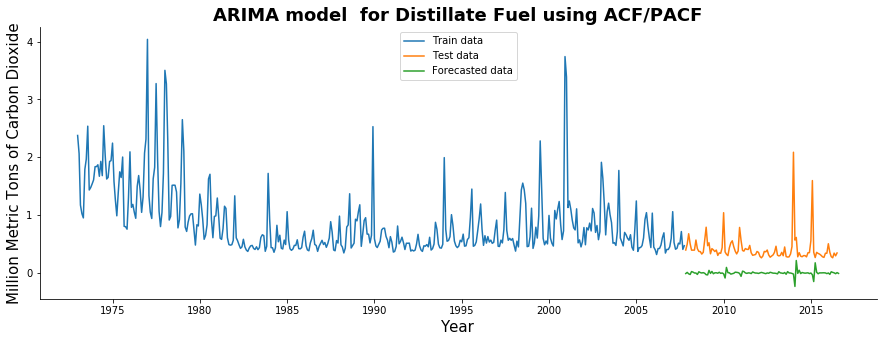

In [109]:
# Values to keep in training data, k
k = 418
# Model building

model_de_arima_acf =ARIMA(de_df['Value'],order=(1,1,0))
model_fit=model_de_arima_acf.fit()
                
# Visualization
plot_model(de_df.Value,model_fit,['ARIMA','Distillate Fuel','ACF/PACF'])

From the graph we can see that forcasted data does not coincide with the trends of the test data , 

**hence the arima model with (1,1,0) as p , d, q parameters is not apt for the predictions**

In [110]:
np.sqrt(mean_squared_error(de_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))


0.4833693972861127

**The RMSE value is 0.48 which is VERY LOW**

### STEP 4.b) BUILDING ARIMA MODEL BY FINDING OPTIMAL PARAMETERS USING GRID SEARCH

In [111]:
grid_search_ARIMA(de_df.Value)

ARIMA(0, 0, 0) - AIC:877.950260692816
ARIMA(0, 0, 1) - AIC:652.2439543271344
ARIMA(0, 0, 2) - AIC:585.4209193198263
ARIMA(0, 1, 0) - AIC:638.5279286524208
ARIMA(0, 1, 1) - AIC:569.3033582430937
ARIMA(0, 1, 2) - AIC:480.52279360910734
ARIMA(0, 2, 0) - AIC:1068.6371573992963
ARIMA(0, 2, 1) - AIC:646.5292688612833
ARIMA(0, 2, 2) - AIC:581.2455448870028
ARIMA(1, 0, 0) - AIC:554.8779931678138
ARIMA(1, 0, 1) - AIC:556.5851819571027
ARIMA(1, 0, 2) - AIC:485.55857772144566
ARIMA(1, 1, 0) - AIC:629.8262081471692
ARIMA(1, 1, 1) - AIC:491.14199815295046
ARIMA(1, 1, 2) - AIC:478.66928679222417
ARIMA(1, 2, 0) - AIC:937.7160158739357
ARIMA(2, 0, 0) - AIC:556.6656469584242
ARIMA(2, 0, 1) - AIC:496.5782535827508
ARIMA(2, 0, 2) - AIC:483.9666943443916
ARIMA(2, 1, 0) - AIC:603.7716471697198
ARIMA(2, 1, 1) - AIC:465.9381661920638
ARIMA(2, 1, 2) - AIC:458.3113349943551
ARIMA(2, 2, 0) - AIC:887.7397196076877
ARIMA(3, 0, 0) - AIC:553.0351697500827
ARIMA(3, 0, 1) - AIC:470.7220535197166
ARIMA(3, 0, 2) - AIC:

**From the above GRID SEARCH algo we found that our best parameters p,d,q is (10,0,2) where the AIC value is 403.870978.
AIC(Akaike Information Criterion) is the value that tells us about the actuality of the data**

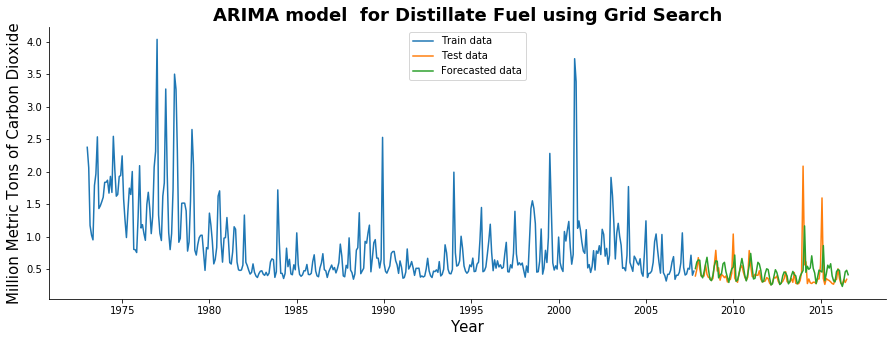

In [112]:
# Values to keep in training data, k
k = 418
# Model building
model_de_arima_grid = ARIMA(de_df.Value, order=(10, 0, 2)) 
                
model_fit = model_de_arima_grid.fit()
# Visualization
plot_model(de_df.Value,model_fit,['ARIMA','Distillate Fuel','Grid Search'])

##### we can see that the forecasted data coincides with the trends of the test data as the AIC value is very low

In [113]:
#RMSE

np.sqrt(mean_squared_error(de_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))


0.24503922403960757

##### The RMSE value of arima model using grid search is very low

In [114]:
l = model_fit.predict(start = 523,end = 583)
l

2016-08-01    0.411773
2016-09-01    0.336049
2016-10-01    0.263911
2016-11-01    0.322842
2016-12-01    0.444353
                ...   
2021-04-01    0.613413
2021-05-01    0.646931
2021-06-01    0.744219
2021-07-01    0.810256
2021-08-01    0.781624
Freq: MS, Length: 61, dtype: float64

In [115]:
de_df.tail()

Value  diffOrdr1
Year                        
2016-03-01  0.279     -0.074
2016-04-01  0.259     -0.020
2016-05-01  0.340      0.081
2016-06-01  0.293     -0.047
2016-07-01  0.342      0.049

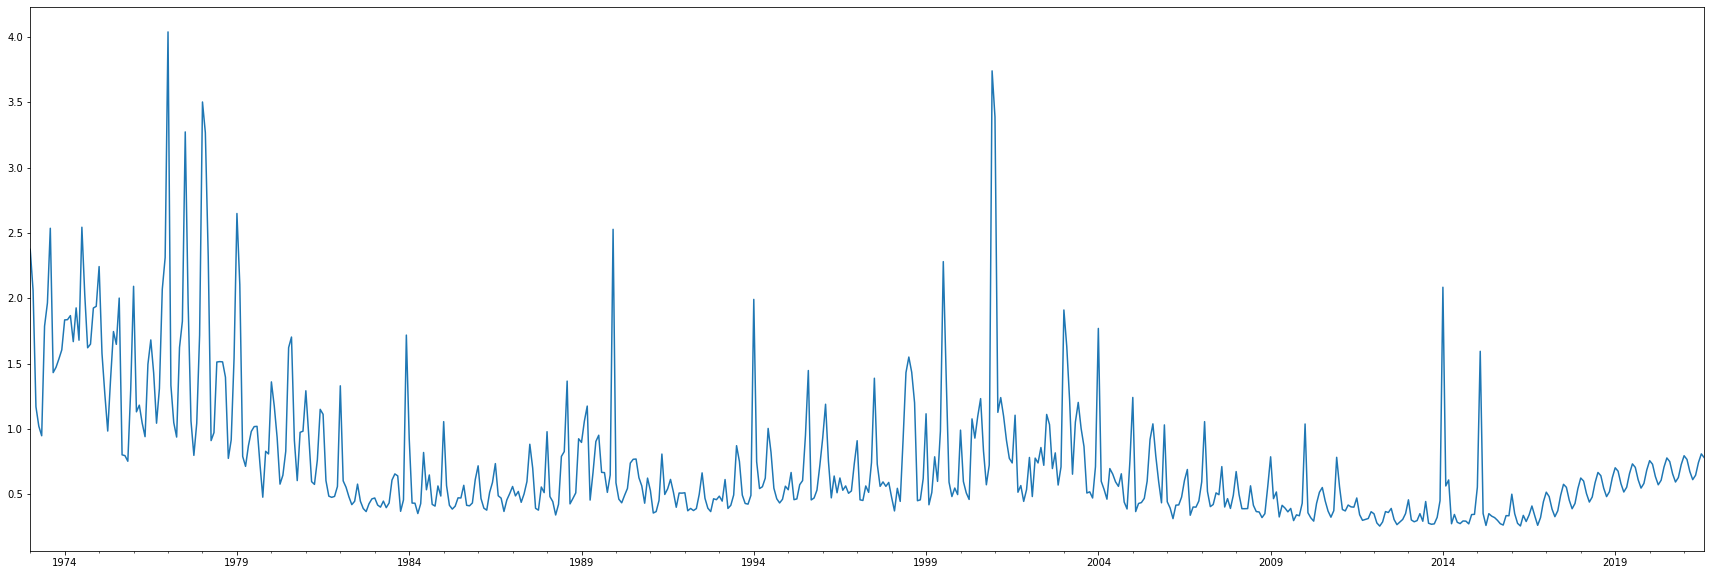

In [116]:
temp = de_df.Value

future_de = temp.append(l)
plt.figure(figsize=(30,10))

future_de.plot()

###  STEP 5 : BUILDING SARIMA MODEL

### STEP 5.a) : Grid search approch to get the best parameters for SARIMA model

In [117]:
grid_search_SARIMA(de_df.Value)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1429.309149606807
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1091.0807218160128
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:741.2980259414212
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:577.003596364768
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:686.2732241051305
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:543.6178264351604
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:610.7948034735817
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:585.3774326687208
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1026.6348134211714
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:807.3253057724713
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:655.7010642339031
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:460.4145435503093
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:584.1307402861091
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:432.18115412470826
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:520.9209038566247
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:462.41482839474156
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:635.852814343673
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:589.0394522934014
ARIMA(0,

**From the above GRID SEARCH algo we found that our best parameters p,d,q is (1,1,1) and QDQ is (1, 0, 1, 12) and AIC value is 364.57913**

In [118]:
# Values to keep in training data, k
k = 418
# Model building
model_de_sarima_grid = SARIMAX(de_df.Value.iloc[:k], 
                order=(1, 1, 1), 
                seasonal_order=(1,0, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_de_sarima_grid.fit(disp=False)

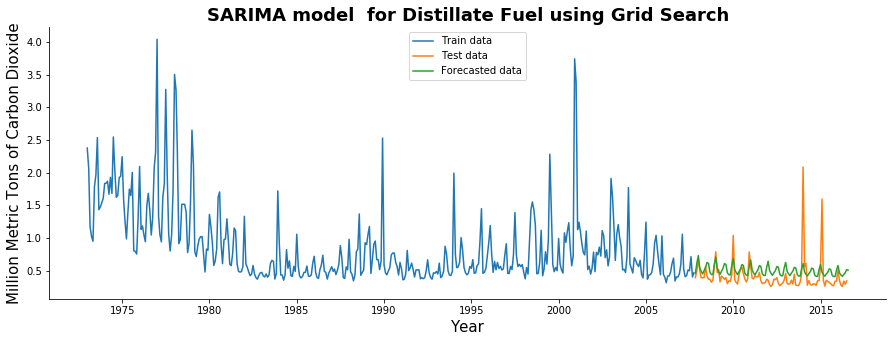

In [119]:
plot_model(de_df.Value,model_fit,['SARIMA','Distillate Fuel','Grid Search'])

**The line graph shows that the forecasted value almost coincides the with the trends of the test data**

**Hence the predictions using SARIMA model are more accurate**

In [120]:
np.sqrt(mean_squared_error(de_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))

0.23246609561800058

**The RMSE value for SARIMA model with the seasnal parameters predicted using grid search gives the is very less**

### STEP 5.b) : Building SARIMA using ACF/PACF 

In [121]:
k = 418
# Model building
model_de_sarima_acf = SARIMAX(de_df.Value.iloc[:k], 
                order=(1, 1, 0), 
                seasonal_order=(1, 0, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_de_sarima_acf.fit(disp=False)

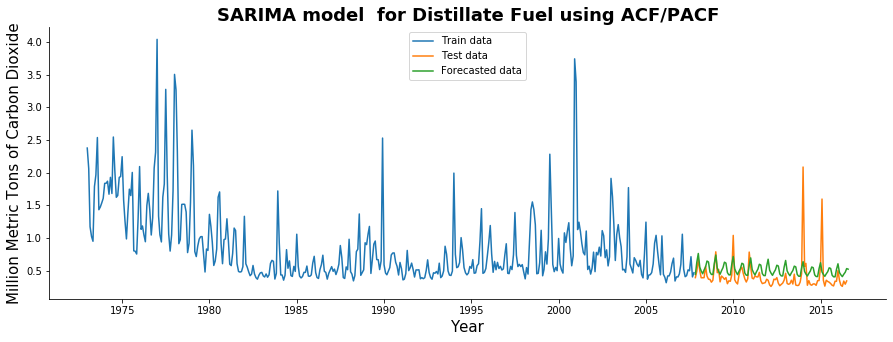

In [122]:
plot_model(de_df.Value,model_fit,['SARIMA','Distillate Fuel','ACF/PACF'])

In [123]:
np.sqrt(mean_squared_error(de_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))

0.23507307528297283

### Since the dataset does not contains any seasonality the best predictions can be observed through ARIMA MODEL

# EVALUATING THE BEST MODEL

In [124]:
eva_matrix = pd.DataFrame([[0.48,0.235],[0.25,0.232]],columns=['ARIMA','SARIMA'],index = ['ACF/PACF','Grid Search'])

In [125]:
print(" Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector  \n\n",eva_matrix)

 Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector  

              ARIMA  SARIMA
ACF/PACF      0.48   0.235
Grid Search   0.25   0.232


### Some inferences:

1. ARIMA model serves RMSE values as 37 with ACF/PACF plot as well as GRID SEARCH
2. From the above evaluation matrix we see that **ARIMA MODEL gives good results as data is less seasonal**
3. SARIMA MODEL gives the best possible predictions for the seasonal data
4. The RMSE values are the **least** in **SARIMA MODEL USING GRID SEARCH**

#### Since the data does not contains seasonality the best predictions can be obtained through ARIMA MODEL only


## 4) MODEL BUILDING For Petroleum Coke Electric Power Sector

In [126]:
# making new dataframe for coal electric power
pc_df = ts.loc[ts["Column_Order"] == 4,['Value']]
pc_df.head()

Value
Year             
1973-01-01  0.128
1973-02-01  0.106
1973-03-01  0.083
1973-04-01  0.130
1973-05-01  0.167

### STEP 1: Checking for Stationarity in the series

### Performing stationarity test using Numerical Test and Graphical Test 

Stationarity can be tested using numerical as well as graphical tests 

**Numerical Test using ADF TEST FOR STATIONARITY**

- **Hnull  : series is non-stationary**
- **Halt : series is stationary**

**1)** If the **null hypothesis is rejected**, then the **series is assumed to be stationary**, where the p-value will be less than 0.05.

**2)** If the **null hypothesis is not rejected**, then the **series is assumed to be non-stationary**. We need to difference the variable and repeat the dickey-fuller test to see if the differenced variable is stationary

**Graphical Test using ROLLING MEAN & STANDARD DEVIATION PLOT**

VISUALISING THE STATIONARITY :




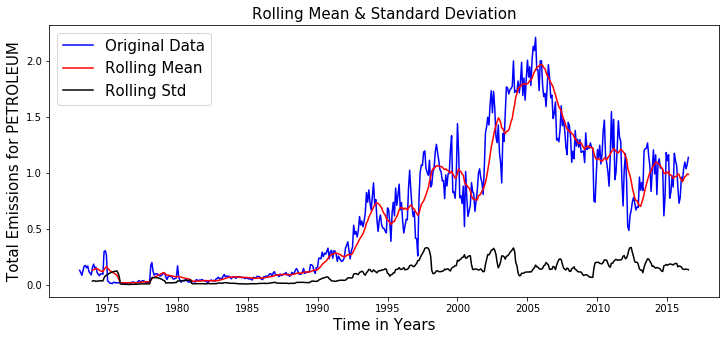

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -1.155939439074871
p-value: 0.6922566803127582
Critical Values:
	1%: -3.4433139398425348
	5%: -2.867257567756961
	10%: -2.5698152474041915


In [127]:
#checking stationarity
TestStationary(pc_df.Value)

#### Inferences from the ADF TEST 

- Here we can see that the **p value is not less than 0.05** 
- The critical values are not close to the ADF statistic 
- So using ADF test ,we can conclude that this series is **not stationary.**

#### Inferences from the ROLLING MEAN PLOT

- In the above graph,**Mean varies with respect to time.**
- Stationary Series should have constant mean and constant standard deviation.
- So using graphical test ,we can conclude this series is **not stationary.**

### STEP 2: Converting the series into a Stationary Series

Further, we will convert the non-stationary series into a stationary one by using **DIFFERENCING METHOD**

In [128]:
#differencing series by 1
pc_df['diffOrdr1'] = np.concatenate(([np.nan], np.diff(pc_df.Value.T, 1)))
pc_df

Value  diffOrdr1
Year                        
1973-01-01  0.128        NaN
1973-02-01  0.106     -0.022
1973-03-01  0.083     -0.023
1973-04-01  0.130      0.047
1973-05-01  0.167      0.037
...           ...        ...
2016-03-01  1.041      0.104
2016-04-01  1.096      0.055
2016-05-01  1.035     -0.061
2016-06-01  1.075      0.040
2016-07-01  1.137      0.062

[523 rows x 2 columns]

**Again checking the stationarity of the series using the ADF TEST and ROLLING MEAN PLOT**

VISUALISING THE STATIONARITY :




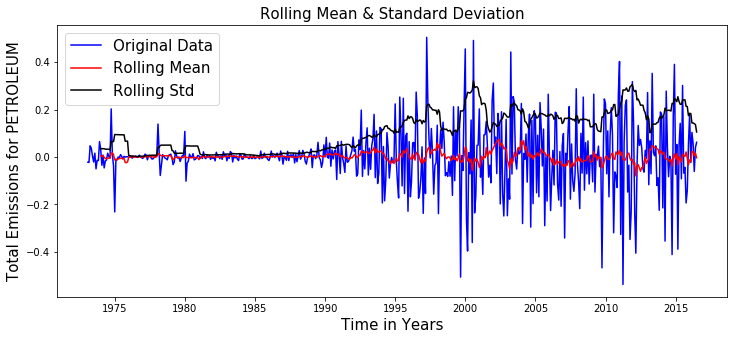

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -6.705142535004966
p-value: 3.801810339377545e-09
Critical Values:
	1%: -3.4433139398425348
	5%: -2.867257567756961
	10%: -2.5698152474041915


In [129]:
#now againg applying AD fuller test and graphical test
TestStationary(pc_df.diffOrdr1.dropna(inplace=False))

**we see that the data has become stationary as p value is less than 0.05 and critical values are also near ADF STATISTIC** 

### STEP 3: DECOMPOSITION TO REMOVE TREND AND SEASONALITY FROM THE DATA

In [130]:
decomposition=seasonal_decompose(pc_df.Value)

t=decomposition.trend
s=decomposition.seasonal
r=decomposition.resid

In [131]:
r.head(12)

Year
1973-01-01         NaN
1973-02-01         NaN
1973-03-01         NaN
1973-04-01         NaN
1973-05-01         NaN
1973-06-01         NaN
1973-07-01   -0.044353
1973-08-01   -0.056876
1973-09-01   -0.044329
1973-10-01   -0.007580
1973-11-01    0.024346
1973-12-01    0.026868
Name: resid, dtype: float64

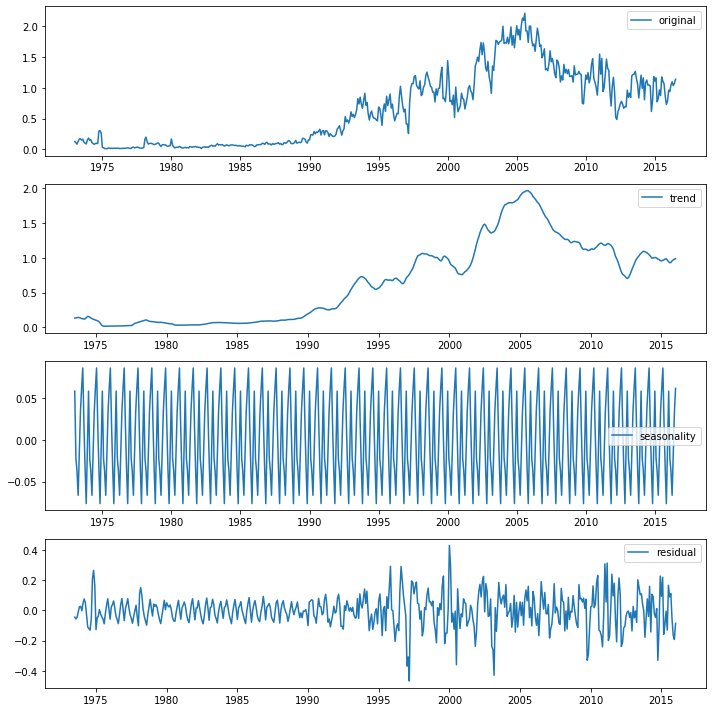

In [132]:
plot_decomposition(pc_df.Value)

VISUALISING THE STATIONARITY :




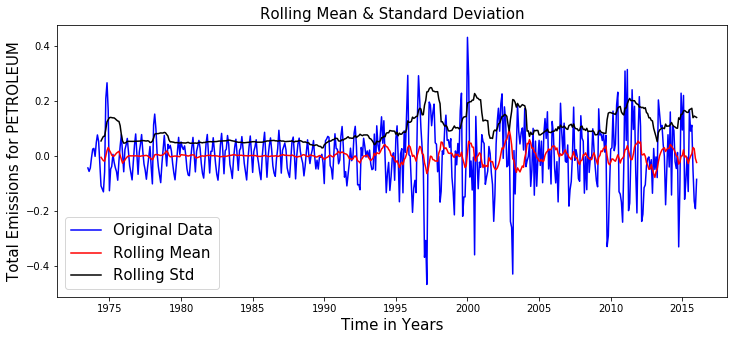

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -10.120466993067687
p-value: 9.474747972875835e-18
Critical Values:
	1%: -3.4436029548776395
	5%: -2.867384756137026
	10%: -2.5698830308597813


In [133]:
TestStationary(r.dropna())

#### DATA MADE STATIONARY BY REMOVING TREND AND SEASON

### STEP 4: FINDING OPTIMAL PARAMETERS  USING ACF AND PACF FOR ARIMA MODEL

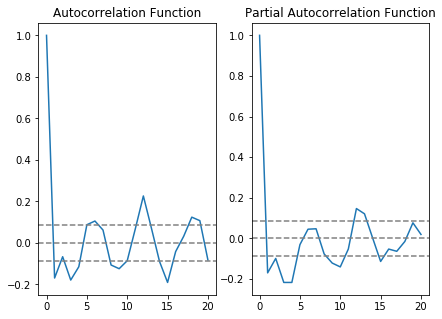

In [134]:
plot_acf_pacf(pc_df.diffOrdr1.dropna())

From the above plots we infer that the  **p value is 2 and the q value is 2**

###  STEP 4.a) : Building ARIMA using ACF-PACF parameters

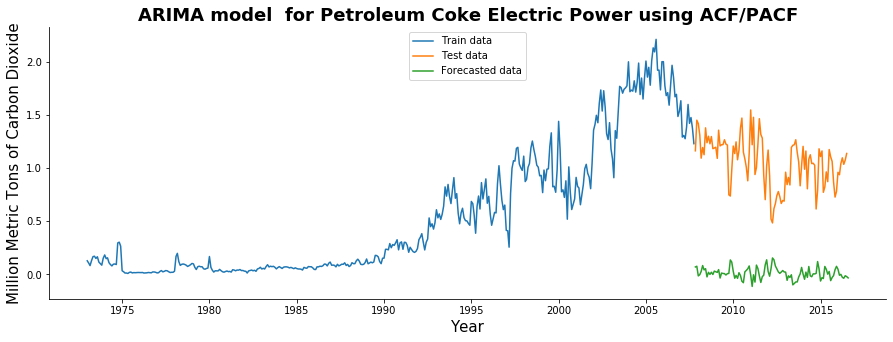

In [135]:
# Values to keep in training data, k
k = 418
# Model building

model_pc_arima_acf =ARIMA(pc_df['Value'],order=(1,1,1))
model_fit=model_pc_arima_acf.fit()
                
# Visualization
plot_model(pc_df.Value,model_fit,['ARIMA','Petroleum Coke Electric Power','ACF/PACF'])

From the graph we can see that forcasted data does not coincide with the trends of the test data , 

**hence the arima model with (2,1,2) as p , d, q parameters is not apt for the predictions**

In [136]:
np.sqrt(mean_squared_error(pc_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))


1.075449658612454

**The RMSE value is 1.057 which is low**

### STEP 4.b) BUILDING ARIMA MODEL BY FINDING OPTIMAL PARAMETERS USING GRID SEARCH

In [137]:
grid_search_ARIMA(pc_df.Value)

ARIMA(0, 0, 0) - AIC:927.8925436999741
ARIMA(0, 0, 1) - AIC:380.4845558976556
ARIMA(0, 0, 2) - AIC:55.20540183972025
ARIMA(0, 1, 0) - AIC:-633.6158133280949
ARIMA(0, 1, 1) - AIC:-652.5195941116092
ARIMA(0, 1, 2) - AIC:-670.3769150569508
ARIMA(0, 2, 0) - AIC:-188.7999407177
ARIMA(0, 2, 1) - AIC:-623.1379068397102
ARIMA(0, 2, 2) - AIC:-641.4301868978007
ARIMA(1, 0, 0) - AIC:-636.6103735111528
ARIMA(1, 0, 1) - AIC:-652.4974259314872
ARIMA(1, 0, 2) - AIC:-668.1698500742905
ARIMA(1, 1, 0) - AIC:-646.8078973873714
ARIMA(1, 1, 1) - AIC:-682.3518417792395
ARIMA(1, 1, 2) - AIC:-680.8278322088693
ARIMA(1, 2, 0) - AIC:-369.21228677100885
ARIMA(1, 2, 2) - AIC:-669.5063089198986
ARIMA(2, 0, 0) - AIC:-647.9033059335952
ARIMA(2, 0, 1) - AIC:-679.2947095633613
ARIMA(2, 0, 2) - AIC:-677.8115007715332
ARIMA(2, 1, 0) - AIC:-649.8778298253458
ARIMA(2, 1, 1) - AIC:-681.066962433966
ARIMA(2, 1, 2) - AIC:-680.8483900603212
ARIMA(2, 2, 0) - AIC:-412.57735050899464
ARIMA(3, 0, 0) - AIC:-650.1301043653243
ARIMA

**From the above GRID SEARCH algo we found that our best parameters p,d,q is (10,1,2) where the AIC value is 2271.73014.
AIC(Akaike Information Criterion) is the value that tells us about the actuality of the data**

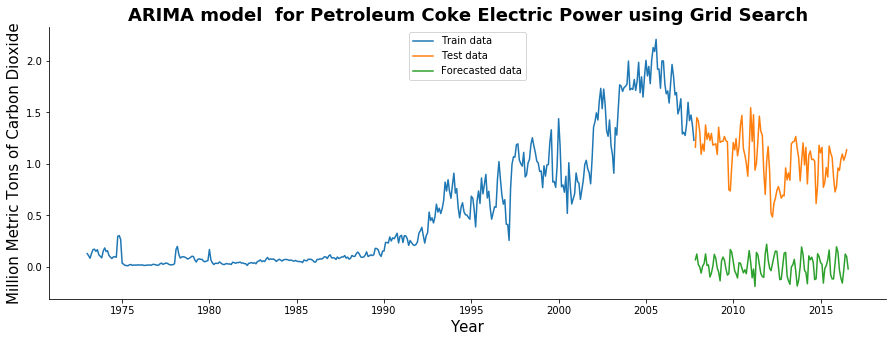

In [138]:
# Values to keep in training data, k
k = 418
# Model building
model_pc_arima_grid = ARIMA(pc_df.Value, order=(9, 1, 2)) 
                
model_fit = model_pc_arima_grid.fit()
# Visualization
plot_model(pc_df.Value,model_fit,['ARIMA','Petroleum Coke Electric Power','Grid Search'])

##### The graph shows that even after using grid search and finding the best parameters with least AIC values, we can see that the forecasted data does not coincide with the trends of the test data

In [139]:
#RMSE

np.sqrt(mean_squared_error(pc_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))


1.0778576095579695

###  STEP 5 : BUILDING SARIMA MODEL

### STEP 5.a) : Grid search approch to get the best parameters for SARIMA model

In [140]:
grid_search_SARIMA(pc_df.Value)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1342.570890334464
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:848.3543885495318
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-28.07864884377446
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-38.012935912913804
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-30.29602535249373
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-46.65150256631139
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-40.60054991259568
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-38.9927207760968
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:743.0038083762062
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:365.914396200392
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-257.0194147203007
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-298.9154404588642
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-265.05295309499377
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-312.4922001694613
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-298.9193283972687
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-296.8034401768904
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-633.3104984001493
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-625.1212138254

**From the above GRID SEARCH algo we found that our best parameters p,d,q is (1,0,1) and QDQ is (1, 0, 1, 12) and AIC value is -731.833817**

In [141]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 418
# Model building
model_pc_sarima_grid = SARIMAX(pc_df.Value.iloc[:k], 
                order=(1, 0, 1), 
                seasonal_order=(1, 0, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_pc_sarima_grid.fit(disp=False)

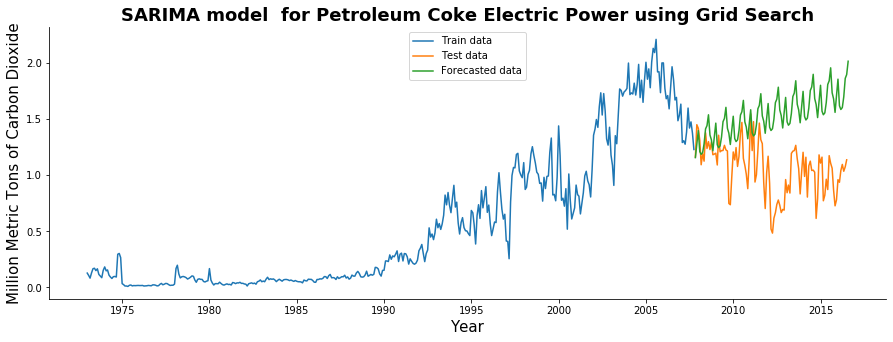

In [142]:
plot_model(pc_df.Value,model_fit,['SARIMA','Petroleum Coke Electric Power','Grid Search'])

**The line graph shows that the forecasted value almost coincides the with the trends of the test data**

**Hence the predictions using SARIMA model are more accurate**

In [143]:
# RMSE

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pc_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))

0.5564275837512832

**The RMSE value for SARIMA model with the seasnal parameters predicted using grid search gives the is very less**

### STEP 5.b) : Building SARIMA using ACF/PACF 

In [144]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 418
# Model building
model_pc_sarima_acf = SARIMAX(pc_df.Value.iloc[:k], 
                order=(1, 1, 1), 
                seasonal_order=(1,0, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_pc_sarima_acf.fit(disp=False)

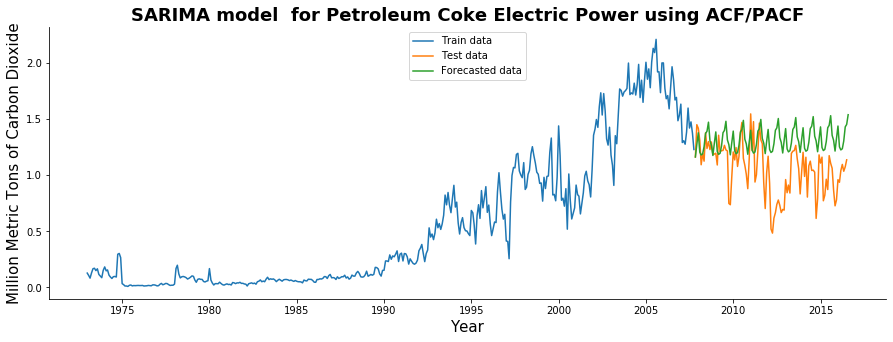

In [145]:
plot_model(pc_df.Value,model_fit,['SARIMA','Petroleum Coke Electric Power','ACF/PACF'])

In [146]:
#RMSE

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pc_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))

0.33622831341177367

### STEP 6 : FORECASTING THE VALUES USING GRID SEARCH PARAMETERS

In [147]:
l = model_fit.predict(start=523,end=583)
l

2016-08-01    1.538717
2016-09-01    1.361988
2016-10-01    1.318281
2016-11-01    1.220631
2016-12-01    1.334697
                ...   
2021-04-01    1.266060
2021-05-01    1.338739
2021-06-01    1.469616
2021-07-01    1.492212
2021-08-01    1.582730
Freq: MS, Length: 61, dtype: float64

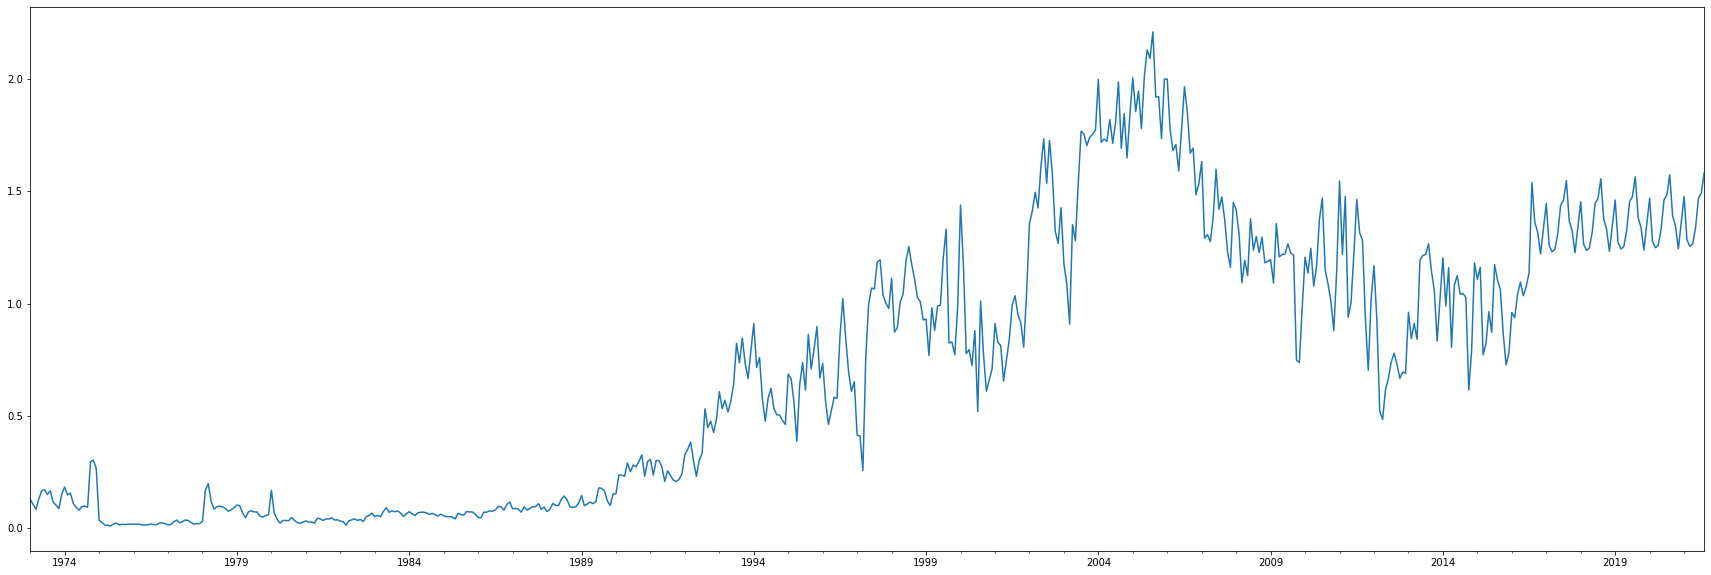

In [148]:
temp = pc_df.Value

future_pc = temp.append(l)
plt.figure(figsize=(30,10))
future_pc.plot()

# EVALUATING THE BEST MODEL

In [149]:
#COMPARISON

eva_matrix = pd.DataFrame([[1.075,0.336],[1.077,0.556]],columns=['ARIMA','SARIMA'],index = ['ACF/PACF','Grid Search'])

In [150]:
print("Petroleum Coke Electric Powe Model Comparision \n\n",eva_matrix)

Petroleum Coke Electric Powe Model Comparision 

              ARIMA  SARIMA
ACF/PACF     1.075   0.336
Grid Search  1.077   0.556


### Some inferences:

1. ARIMA model serves RMSE values as 1.075 with ACF/PACF plot
2. From the above evaluation matrix we see that **ARIMA MODEL performs poorly in evaluating the seasonal data**
3. SARIMA MODEL gives the best possible predictions for the seasonal data
4. The RMSE values are the **least** in **SARIMA MODEL USING GRID SEARCH**


## 1) MODEL BUILDING For Residual Fuel Oil Electric Power

In [151]:
# making new dataframe for coal electric power
rf_df = ts.loc[ts["Column_Order"] == 5,['Value']]
rf_df.head()

Value
Year              
1973-01-01  24.867
1973-02-01  20.867
1973-03-01  19.780
1973-04-01  16.562
1973-05-01  17.754

### STEP 1: Checking for Stationarity in the series

### Performing stationarity test using Numerical Test and Graphical Test 

Stationarity can be tested using numerical as well as graphical tests 

**Numerical Test using ADF TEST FOR STATIONARITY**

- **Hnull  : series is non-stationary**
- **Halt : series is stationary**

**1)** If the **null hypothesis is rejected**, then the **series is assumed to be stationary**, where the p-value will be less than 0.05.

**2)** If the **null hypothesis is not rejected**, then the **series is assumed to be non-stationary**. We need to difference the variable and repeat the dickey-fuller test to see if the differenced variable is stationary

**Graphical Test using ROLLING MEAN & STANDARD DEVIATION PLOT**

VISUALISING THE STATIONARITY :




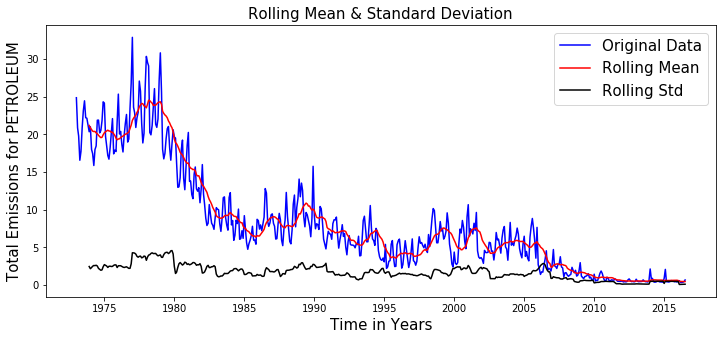

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -1.4007015043081452
p-value: 0.5819397623694735
Critical Values:
	1%: -3.4433139398425348
	5%: -2.867257567756961
	10%: -2.5698152474041915


In [152]:
#checking stationarity
TestStationary(rf_df.Value)

#### Inferences from the ADF TEST 

- Here we can see that the **p value is not less than 0.05** 
- The critical values are not close to the ADF statistic 
- So using ADF test ,we can conclude that this series is **not stationary.**

#### Inferences from the ROLLING MEAN PLOT

- In the above graph,**Mean varies with respect to time.**
- Stationary Series should have constant mean and constant standard deviation.
- So using graphical test ,we can conclude this series is **not stationary.**

### STEP 2: Converting the series into a Stationary Series

Further, we will convert the non-stationary series into a stationary one by using **DIFFERENCING METHOD**

In [153]:
#differencing series by 1
rf_df['diffOrdr1'] = np.concatenate(([np.nan], np.diff(rf_df.Value.T, 1)))
rf_df

Value  diffOrdr1
Year                         
1973-01-01  24.867        NaN
1973-02-01  20.867     -4.000
1973-03-01  19.780     -1.087
1973-04-01  16.562     -3.218
1973-05-01  17.754      1.192
...            ...        ...
2016-03-01   0.334     -0.233
2016-04-01   0.340      0.006
2016-05-01   0.368      0.028
2016-06-01   0.420      0.052
2016-07-01   0.662      0.242

[523 rows x 2 columns]

**Again checking the stationarity of the series using the ADF TEST and ROLLING MEAN PLOT**

VISUALISING THE STATIONARITY :




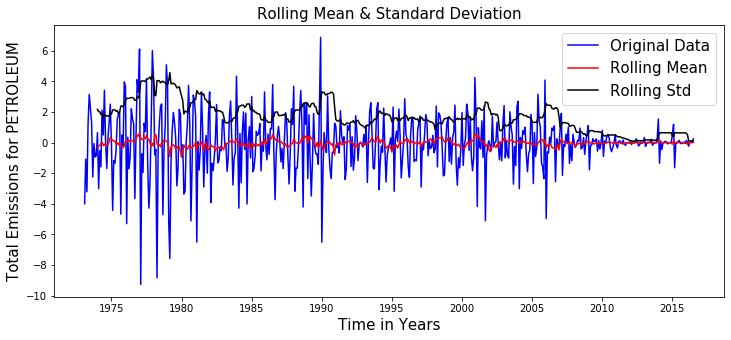

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -6.515511124874197
p-value: 1.0738418246344588e-08
Critical Values:
	1%: -3.4433139398425348
	5%: -2.867257567756961
	10%: -2.5698152474041915


In [154]:
#now againg applying AD fuller test and graphical test
TestStationary(rf_df.diffOrdr1.dropna(inplace=False))

**we see that the data has become stationary as p value is less than 0.05 and critical values are also near ADF STATISTIC** 

### STEP 3: DECOMPOSITION TO REMOVE TREND AND SEASONALITY FROM THE DATA

In [155]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(rf_df.Value)

t=decomposition.trend
s=decomposition.seasonal
r=decomposition.resid

In [156]:
r.head(12)

Year
1973-01-01         NaN
1973-02-01         NaN
1973-03-01         NaN
1973-04-01         NaN
1973-05-01         NaN
1973-06-01         NaN
1973-07-01    0.844722
1973-08-01    2.330306
1973-09-01    2.235733
1973-10-01    2.786874
1973-11-01    1.688224
1973-12-01   -0.779110
Name: resid, dtype: float64

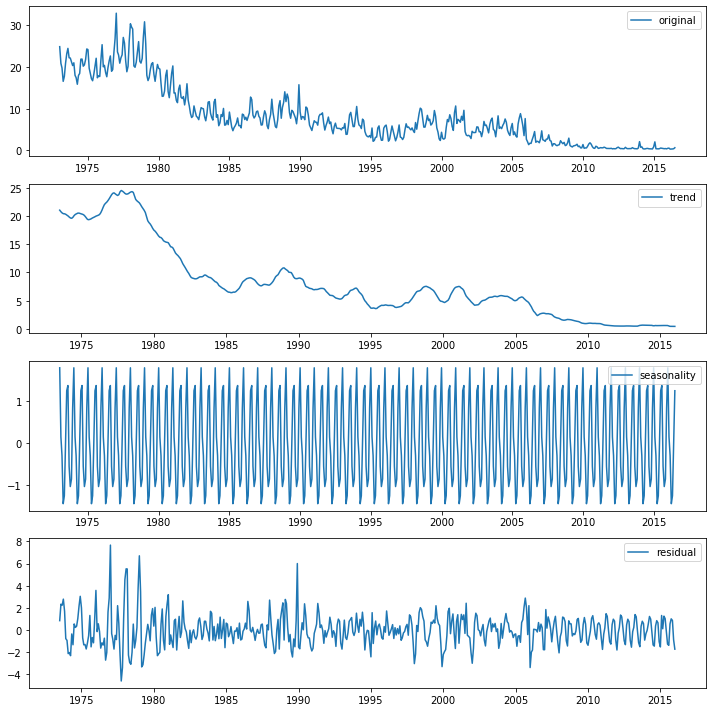

In [157]:
plot_decomposition(rf_df.Value)

- **PLOT 1:** Shows the **original series**
- **PLOT 2:** Shows the **trends** in the original series
- **PLOT 3:** Shows the **seasonality** in the original series
- **PLOT 4:** Shows the **residuals** in the original series

VISUALISING THE STATIONARITY :




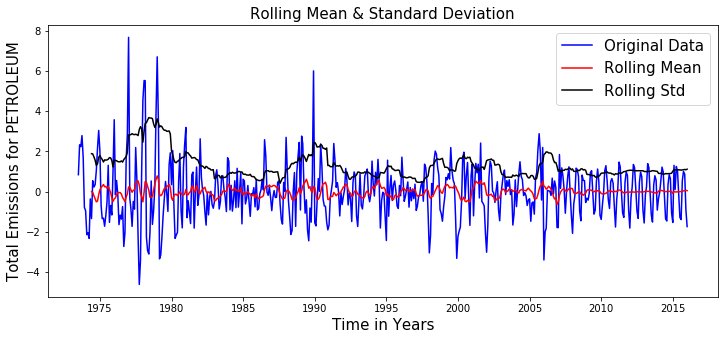

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -8.564160421028845
p-value: 8.535615349740411e-14
Critical Values:
	1%: -3.4437386290417082
	5%: -2.867444458865948
	10%: -2.5699148492415413


In [158]:
TestStationary(r.dropna())

#### DATA MADE STATIONARY BY REMOVING TREND AND SEASON

### STEP 4: FINDING OPTIMAL PARAMETERS  USING ACF AND PACF FOR ARIMA MODEL

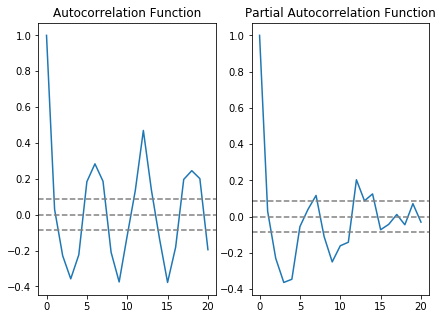

In [159]:
plot_acf_pacf(rf_df.diffOrdr1.dropna())

From the above plots we infer that the  **p value is 1 and the q value is 1**

###  STEP 4.a) : Building ARIMA using ACF-PACF parameters

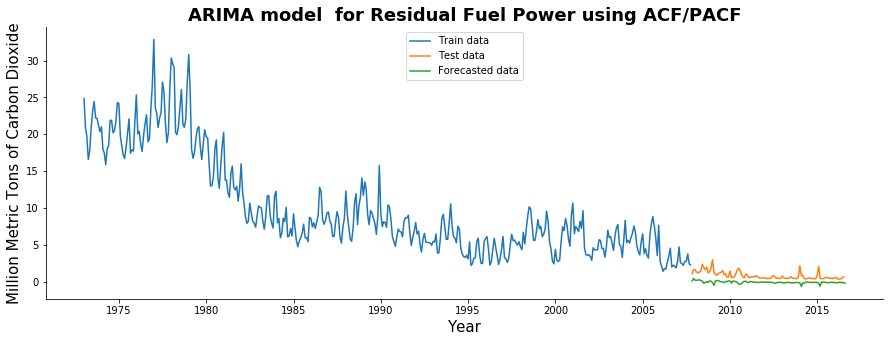

In [160]:
# Values to keep in training data, k
k = 418
# Model building

model_rf_arima_acf =ARIMA(rf_df['Value'],order=(1,1,1))
model_fit=model_rf_arima_acf.fit()
                
# Visualization
plot_model(rf_df.Value,model_fit,['ARIMA','Residual Fuel Power','ACF/PACF'])

From the graph we can see that forcasted data does not coincide with the trends of the test data , 

**hence the arima model with (2,1,2) as p , d, q parameters is not apt for the predictions**

In [161]:
np.sqrt(mean_squared_error(rf_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))


1.0426497934859982

### STEP 4.b) BUILDING ARIMA MODEL BY FINDING OPTIMAL PARAMETERS USING GRID SEARCH

In [162]:
grid_search_ARIMA(rf_df.Value)

ARIMA(0, 0, 0) - AIC:3528.57057319721
ARIMA(0, 0, 1) - AIC:2978.749180771194
ARIMA(0, 0, 2) - AIC:2671.3420261981446
ARIMA(0, 1, 0) - AIC:2155.283445605167
ARIMA(0, 1, 1) - AIC:2156.4605889637446
ARIMA(0, 1, 2) - AIC:2073.3811828213734
ARIMA(0, 2, 0) - AIC:2495.1692470962325
ARIMA(0, 2, 1) - AIC:2160.280379803101
ARIMA(0, 2, 2) - AIC:2161.364631195164
ARIMA(1, 0, 0) - AIC:2156.904339038236
ARIMA(1, 0, 1) - AIC:2156.892325826213
ARIMA(1, 0, 2) - AIC:2085.4315974698943
ARIMA(1, 1, 0) - AIC:2156.8102478622295
ARIMA(1, 1, 1) - AIC:2088.6342496134666
ARIMA(1, 1, 2) - AIC:2057.615847236631
ARIMA(1, 2, 0) - AIC:2422.490647369849
ARIMA(2, 0, 0) - AIC:2157.674027401262
ARIMA(2, 0, 1) - AIC:2101.544425295973
ARIMA(2, 0, 2) - AIC:2070.4946760946796
ARIMA(2, 1, 0) - AIC:2130.48768398206
ARIMA(2, 1, 1) - AIC:2033.1315016699298
ARIMA(2, 1, 2) - AIC:2020.9769387134104
ARIMA(2, 2, 0) - AIC:2395.3127895908547
ARIMA(2, 2, 2) - AIC:2165.742267271244
ARIMA(3, 0, 0) - AIC:2134.989646280565
ARIMA(3, 0, 1) -

**From the above GRID SEARCH algo we found that our best parameters p,d,q is (10,1,2) where the AIC value is 1893.832864.
AIC(Akaike Information Criterion) is the value that tells us about the actuality of the data**

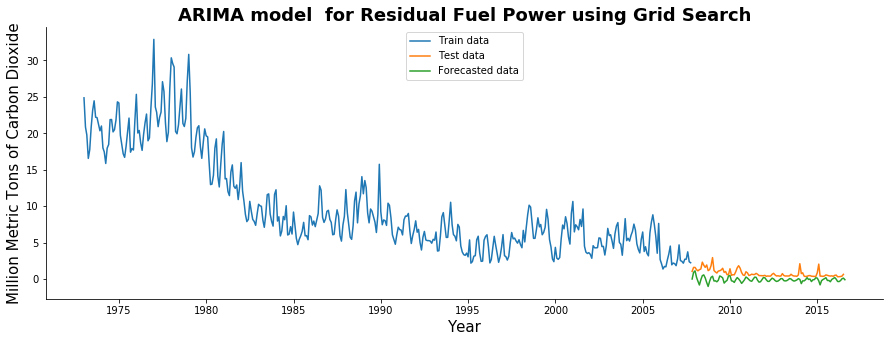

In [163]:
# Values to keep in training data, k
k = 418
# Model building
model_rf_arima_grid = ARIMA(rf_df.Value, order=(10, 1, 2)) 
                
model_fit = model_rf_arima_grid.fit()
# Visualization
plot_model(rf_df.Value,model_fit,['ARIMA','Residual Fuel Power','Grid Search'])

##### The graph shows that even after using grid search and finding the best parameters with least AIC values, we can see that the forecasted data does not coincide with the trends of the test data

In [164]:
#RMSE

np.sqrt(mean_squared_error(rf_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))


1.016284218690948

##### The RMSE value of arima model using grid search is same as the RMSE value of arima model using ACF/PACF plot 

In [165]:
l = model_fit.predict(start = 523,end=583)
l

2016-08-01   -0.072902
2016-09-01   -0.258834
2016-10-01   -0.273230
2016-11-01   -0.080087
2016-12-01    0.126029
                ...   
2021-04-01   -0.204937
2021-05-01   -0.061195
2021-06-01    0.102055
2021-07-01    0.122161
2021-08-01   -0.020142
Freq: MS, Length: 61, dtype: float64

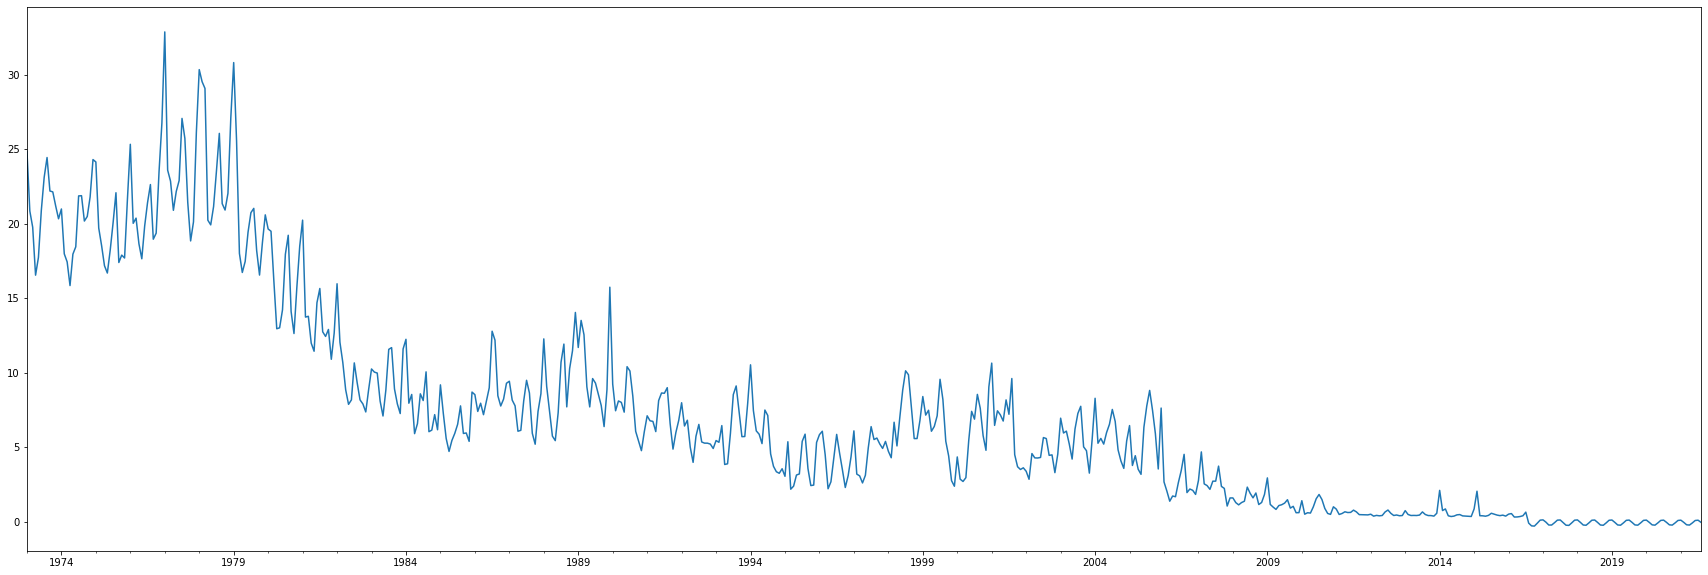

In [166]:
temp = rf_df.Value

future_rf = temp.append(l)
plt.figure(figsize=(30,10))
future_rf.plot()

###  STEP 5 : BUILDING SARIMA MODEL

### STEP 5.a) : Grid search approch to get the best parameters for SARIMA model

In [167]:
grid_search_SARIMA(rf_df.Value)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3956.6018804800506
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3332.8292541963806
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2405.0627481929946
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2335.3820425091135
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2361.476079106683
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2332.1615084468713
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2334.2130724849467
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2327.2258849232658
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3342.132464894343
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2830.5166952519066
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2161.9498002544656
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2075.9295994318536
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2125.7793158669288
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2068.611839223906
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2081.6881941270785
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2076.1251477332626
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2146.030141092735
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2022.6095240827

In [168]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 418
# Model building
model_rf_sarima_grid = SARIMAX(rf_df.Value.iloc[:k], 
                order=(1, 1, 1), 
                seasonal_order=(0, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_rf_sarima_grid.fit(disp=False)

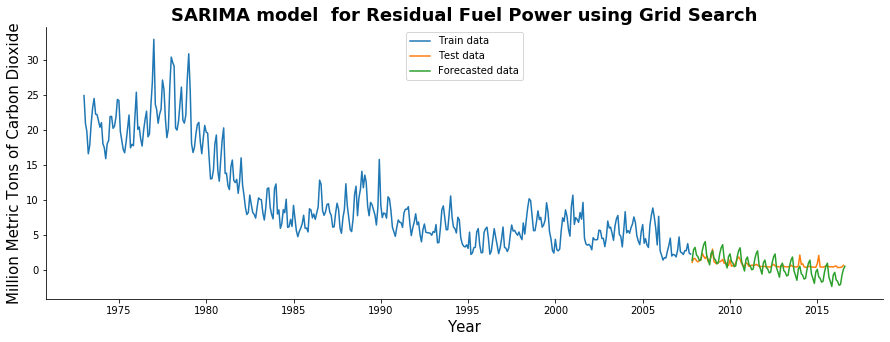

In [169]:
plot_model(rf_df.Value,model_fit,['SARIMA','Residual Fuel Power','Grid Search'])

In [170]:
# RMSE

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(rf_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))

1.185805761593188

### STEP 5.b) : Building SARIMA using ACF/PACF 

In [171]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 418
# Model building
model_rf_sarima_acf = SARIMAX(rf_df.Value.iloc[:k], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_rf_sarima_acf.fit(disp=False)

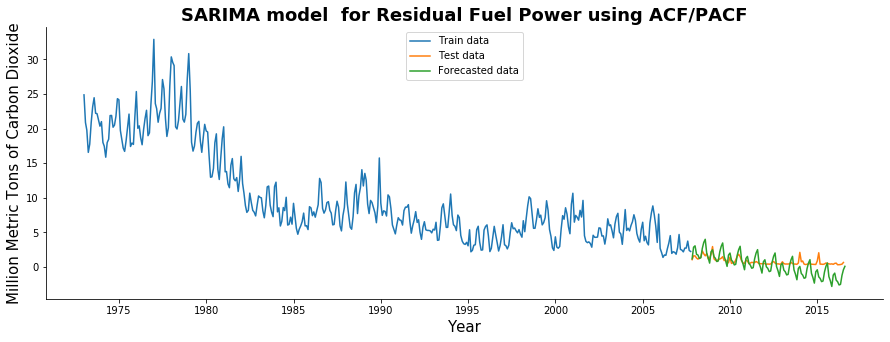

In [172]:
plot_model(rf_df.Value,model_fit,['SARIMA','Residual Fuel Power','ACF/PACF'])

In [173]:
#RMSE

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(rf_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))

1.3301582502821516

# EVALUATING THE BEST MODEL

In [174]:
#COMPARISON

eva_matrix = pd.DataFrame([[1.042,1.330],[1.016,1.185]],columns=['ARIMA','SARIMA'],index = ['ACF/PACF','Grid Search'])

In [175]:
print("Residual Fuel Oil Electric Power Model Comparision \n\n",eva_matrix)

Residual Fuel Oil Electric Power Model Comparision 

              ARIMA  SARIMA
ACF/PACF     1.042   1.330
Grid Search  1.016   1.185


### Some inferences:

1. ARIMA model serves RMSE values as 1.042 with ACF/PACF plot as well as GRID SEARCH
2. From the above evaluation matrix we see that **ARIMA MODEL performs poorly in evaluating the seasonal data**
3. SARIMA MODEL gives the best possible predictions for the seasonal data
4. The RMSE values are the **least** in **SARIMA MODEL USING GRID SEARCH**

# 6) MODEL BUILDING For Petroleum Electric Power Sector

In [176]:
# making new dataframe for coal electric power
pe_df = ts.loc[ts["Column_Order"] == 6,['Value']]
pe_df.head()

Value
Year              
1973-01-01  27.369
1973-02-01  23.034
1973-03-01  21.034
1973-04-01  17.714
1973-05-01  18.870

### STEP 1: Checking for Stationarity in the series

VISUALISING THE STATIONARITY :




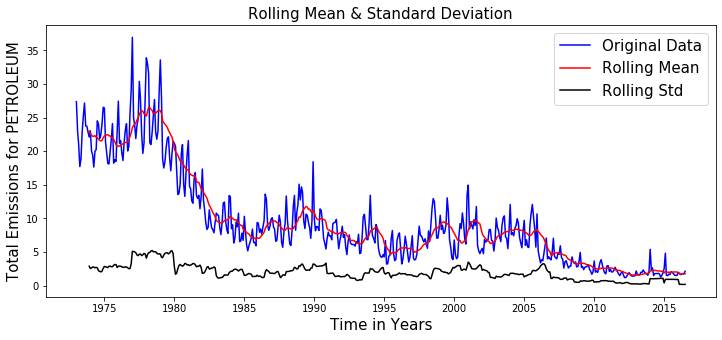

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -1.5772399363509244
p-value: 0.4950157307222767
Critical Values:
	1%: -3.44328828958775
	5%: -2.8672462791357867
	10%: -2.569809231353463


In [177]:
#checking stationarity
TestStationary(pe_df.Value)

### STEP 2: Converting the series into a Stationary Series

Further, we will convert the non-stationary series into a stationary one by using **DIFFERENCING METHOD**

In [178]:
#differencing series by 1
pe_df['diffOrdr1'] = np.concatenate(([np.nan], np.diff(pe_df.Value.T, 1)))
pe_df

Value  diffOrdr1
Year                         
1973-01-01  27.369        NaN
1973-02-01  23.034     -4.335
1973-03-01  21.034     -2.000
1973-04-01  17.714     -3.320
1973-05-01  18.870      1.156
...            ...        ...
2016-03-01   1.654     -0.203
2016-04-01   1.695      0.041
2016-05-01   1.743      0.048
2016-06-01   1.789      0.046
2016-07-01   2.141      0.352

[523 rows x 2 columns]

VISUALISING THE STATIONARITY :




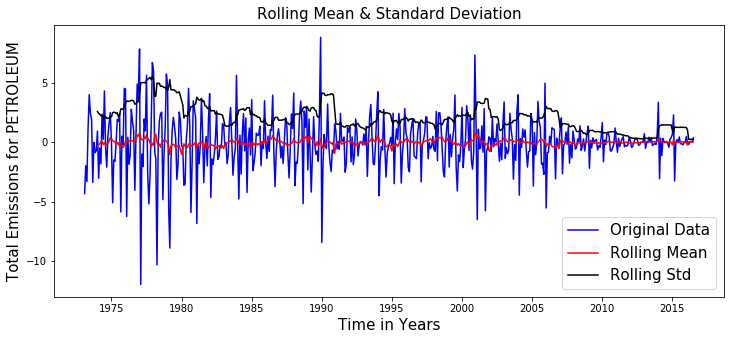

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -6.511836798181095
p-value: 1.0955058839986094e-08
Critical Values:
	1%: -3.44328828958775
	5%: -2.8672462791357867
	10%: -2.569809231353463


In [179]:
#now againg applying AD fuller test and graphical test
TestStationary(pe_df.diffOrdr1.dropna(inplace=False))

### STEP 3: DECOMPOSITION TO REMOVE TREND AND SEASONALITY FROM THE DATA

In [180]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(pe_df.Value)

t=decomposition.trend
s=decomposition.seasonal
r=decomposition.resid

In [181]:
r.head(12)

Year
1973-01-01         NaN
1973-02-01         NaN
1973-03-01         NaN
1973-04-01         NaN
1973-05-01         NaN
1973-06-01         NaN
1973-07-01    0.924473
1973-08-01    3.071880
1973-09-01    2.157045
1973-10-01    2.803889
1973-11-01    1.665221
1973-12-01   -1.056379
Name: resid, dtype: float64

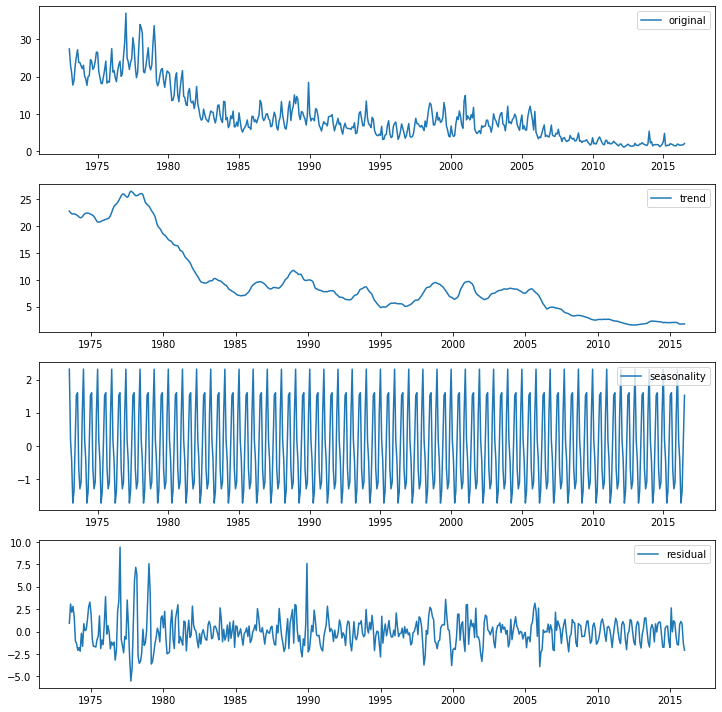

In [182]:
plot_decomposition(pe_df.Value)

VISUALISING THE STATIONARITY :




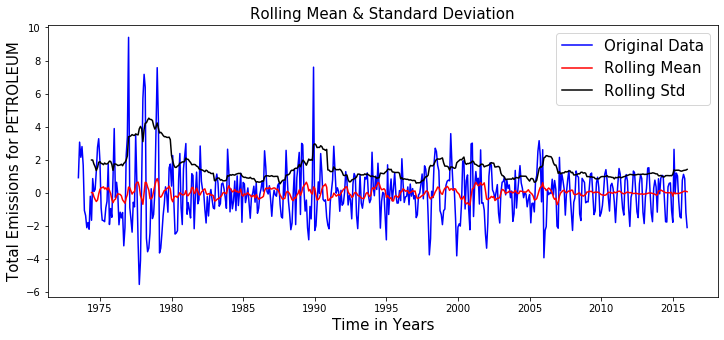

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -8.6556583852349
p-value: 4.977222015415582e-14
Critical Values:
	1%: -3.4437386290417082
	5%: -2.867444458865948
	10%: -2.5699148492415413


In [183]:
TestStationary(r.dropna())

### STEP 4: FINDING OPTIMAL PARAMETERS  USING ACF AND PACF FOR ARIMA MODEL

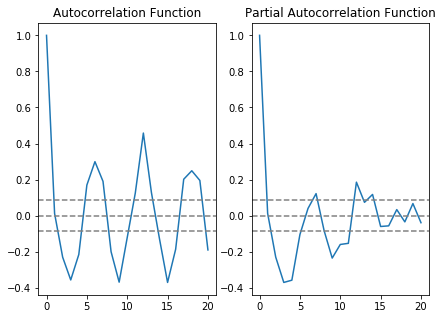

In [184]:
plot_acf_pacf(pe_df.diffOrdr1.dropna())

###  STEP 4.a) : Building ARIMA using ACF-PACF parameters


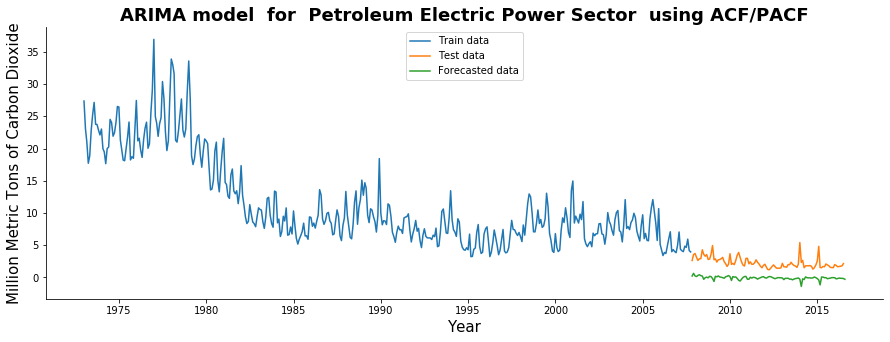

In [185]:
# Values to keep in training data, k
k = 418
# Model building

model_pe_arima_acf =ARIMA(pe_df['Value'],order=(1,1,1))
model_fit=model_pe_arima_acf.fit()
                
# Visualization
plot_model(pe_df.Value,model_fit,['ARIMA',' Petroleum Electric Power Sector ','ACF/PACF'])

In [186]:
np.sqrt(mean_squared_error(pe_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))


2.5105819227090884

### STEP 4.b) BUILDING ARIMA MODEL BY FINDING OPTIMAL PARAMETERS USING GRID SEARCH

In [187]:
grid_search_ARIMA(pe_df.Value)

ARIMA(0, 0, 0) - AIC:3541.5368691606886
ARIMA(0, 0, 1) - AIC:3026.302420872177
ARIMA(0, 0, 2) - AIC:2749.573539510091
ARIMA(0, 1, 0) - AIC:2343.668087036718
ARIMA(0, 1, 1) - AIC:2345.5193322428
ARIMA(0, 1, 2) - AIC:2250.936816960084
ARIMA(0, 2, 0) - AIC:2692.9297919116298
ARIMA(0, 2, 1) - AIC:2348.3211241754916
ARIMA(0, 2, 2) - AIC:2350.128570701573
ARIMA(1, 0, 0) - AIC:2341.622449290084
ARIMA(1, 0, 1) - AIC:2342.360611667994
ARIMA(1, 0, 2) - AIC:2262.7488960722653
ARIMA(1, 1, 0) - AIC:2345.5857471579207
ARIMA(1, 1, 1) - AIC:2267.31960897581
ARIMA(1, 1, 2) - AIC:2237.824334046584
ARIMA(1, 2, 0) - AIC:2615.2925197327927
ARIMA(2, 0, 0) - AIC:2342.8595123032032
ARIMA(2, 0, 1) - AIC:2279.8207539859127
ARIMA(2, 0, 2) - AIC:2250.2750778852005
ARIMA(2, 1, 0) - AIC:2319.0517569162266
ARIMA(2, 1, 1) - AIC:2211.8288754907035
ARIMA(2, 1, 2) - AIC:2196.785122852799
ARIMA(2, 2, 0) - AIC:2587.6661812989796
ARIMA(3, 0, 0) - AIC:2321.2334301095343
ARIMA(3, 0, 1) - AIC:2223.7805996011793
ARIMA(3, 0, 2)

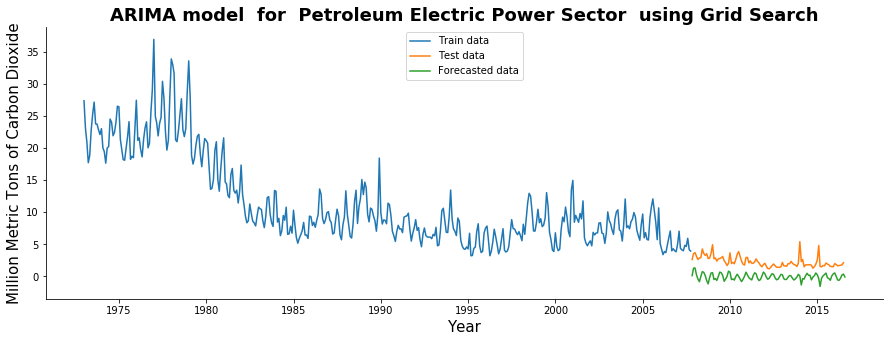

In [188]:
# Values to keep in training data, k
k = 418
# Model building
model_pe_arima_grid = ARIMA(pe_df.Value, order=(10, 1, 2)) 
                
model_fit = model_pe_arima_grid.fit()
# Visualization
plot_model(pe_df.Value,model_fit,['ARIMA',' Petroleum Electric Power Sector ','Grid Search'])

In [189]:
#RMSE

np.sqrt(mean_squared_error(pe_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))


2.4804582463601363


###  STEP 5 : BUILDING SARIMA MODEL

### STEP 5.a) : Grid search approch to get the best parameters for SARIMA model

In [190]:
grid_search_SARIMA(pe_df.Value)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4064.1006683412115
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3445.7069530623066
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2537.8804131960583
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2459.6335444060605
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2498.0683919581816
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2460.705789569074
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2457.8996587670863
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2451.8879588557006
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3463.041675773323
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2957.9907169998232
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2322.5863005969823
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2222.8535701218134
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2289.168982125396
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2221.3142241547303
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2231.514533795305
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2225.0144954403863
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2334.786082424941
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2208.71370273193

In [191]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 418
# Model building
model_pe_sarima_grid = SARIMAX(pe_df.Value.iloc[:k], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_pe_sarima_grid.fit(disp=False)

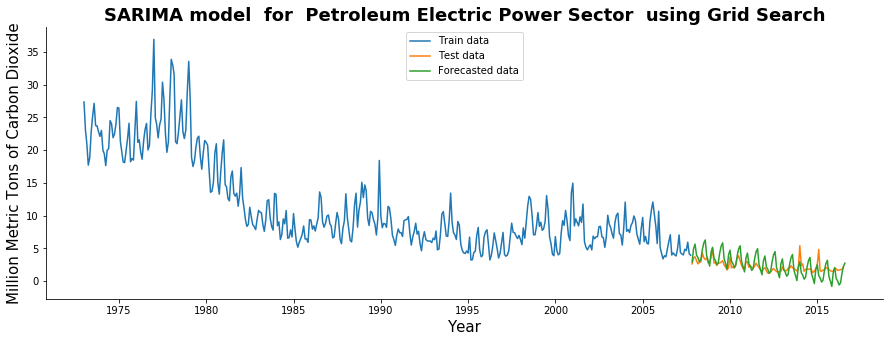

In [192]:
plot_model(pe_df.Value,model_fit,['SARIMA',' Petroleum Electric Power Sector ','Grid Search'])

In [193]:
# RMSE

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pe_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))

1.2827394023285337

In [194]:
l =model_fit.predict(start=523,end=583)
l

2016-08-01    2.736706
2016-09-01    0.297432
2016-10-01   -0.437390
2016-11-01   -1.261161
2016-12-01    0.852620
                ...   
2021-04-01   -2.809301
2021-05-01   -2.517658
2021-06-01   -0.996473
2021-07-01    0.032836
2021-08-01    0.516471
Freq: MS, Length: 61, dtype: float64

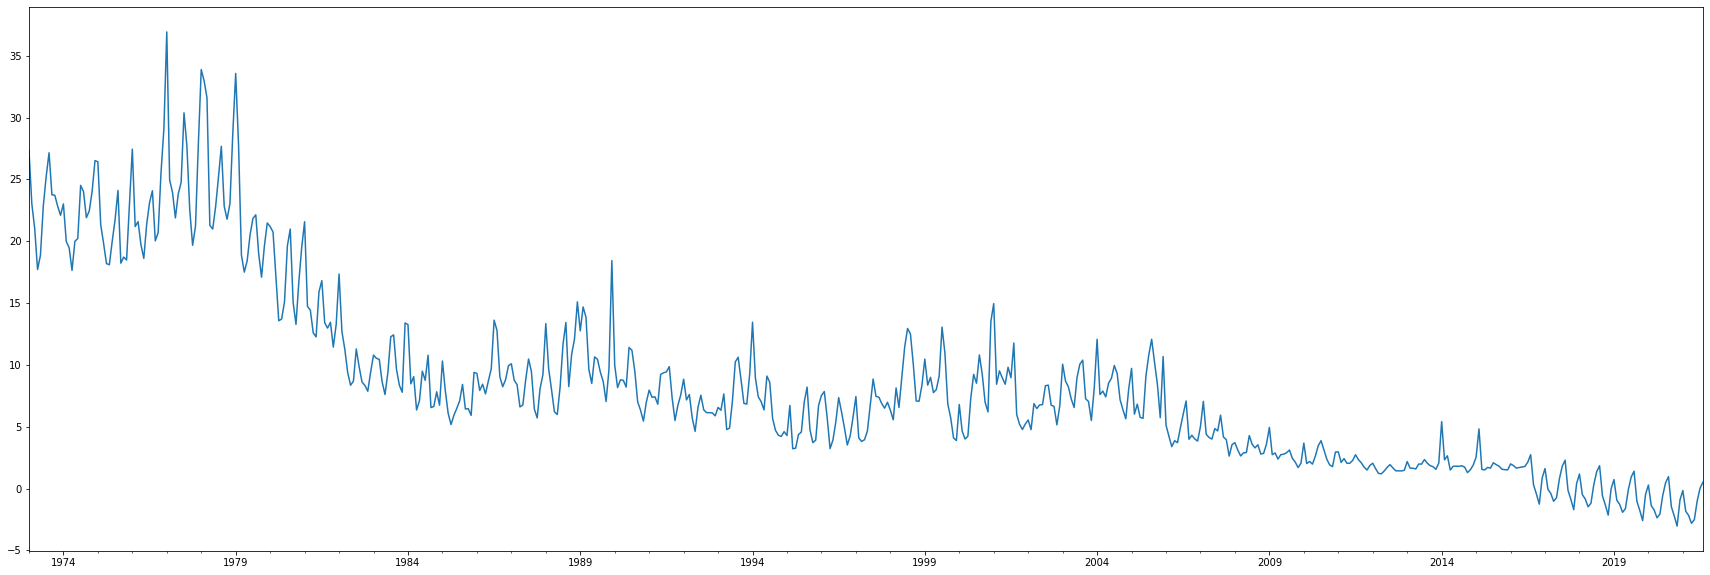

In [195]:
temp = pe_df.Value

future_pe = temp.append(l)
plt.figure(figsize=(30,10))
future_pe.plot()

### STEP 5.b) : Building SARIMA using ACF/PACF 

In [196]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 418
# Model building
model_pe_sarima_acf = SARIMAX(pe_df.Value.iloc[:k], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_pe_sarima_acf.fit(disp=False)

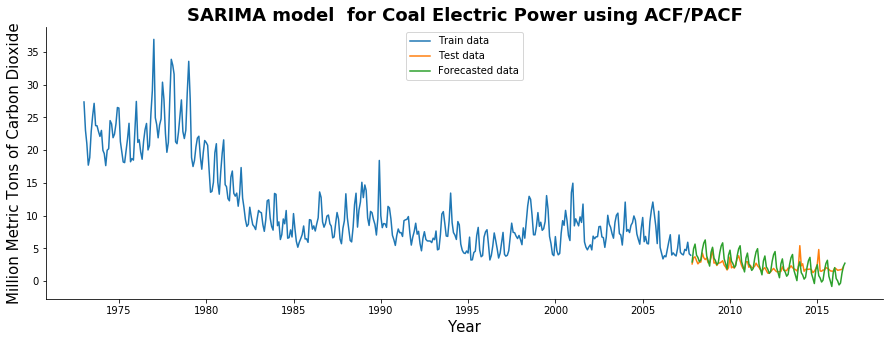

In [197]:
plot_model(pe_df.Value,model_fit,['SARIMA','Coal Electric Power','ACF/PACF'])

In [198]:
#RMSE

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pe_df.Value.iloc[k:], model_fit.predict(start = 418,end = 522)))

1.2827394023285337

# EVALUATING THE BEST MODEL

In [199]:
#COMPARISON

eva_matrix = pd.DataFrame([[2.510,1.283],[2.480,1.283]],columns=['ARIMA','SARIMA'],index = ['ACF/PACF','Grid Search'])

In [200]:
print("Petroleum Electric Power Sector Model Comparision \n\n",eva_matrix)

Petroleum Electric Power Sector Model Comparision 

              ARIMA  SARIMA
ACF/PACF      2.51   1.283
Grid Search   2.48   1.283


### Some inferences:

1. ARIMA model serves RMSE values as 37 with ACF/PACF plot as well as GRID SEARCH
2. From the above evaluation matrix we see that **ARIMA MODEL performs poorly in evaluating the seasonal data**
3. SARIMA MODEL gives the best possible predictions for the seasonal data
4. The RMSE values are the **least** in **SARIMA MODEL USING GRID SEARCH**



## 7) MODEL BUILDING For Geothermal Energy Electric Power

In [201]:
# making new dataframe for coal electric power
ge_df = ts.loc[ts["Column_Order"] == 7,['Value']]
ge_df.head()

Value
Year             
1989-01-01  0.031
1989-02-01  0.028
1989-03-01  0.031
1989-04-01  0.030
1989-05-01  0.031

### STEP 1: Checking for Stationarity in the series

VISUALISING THE STATIONARITY :




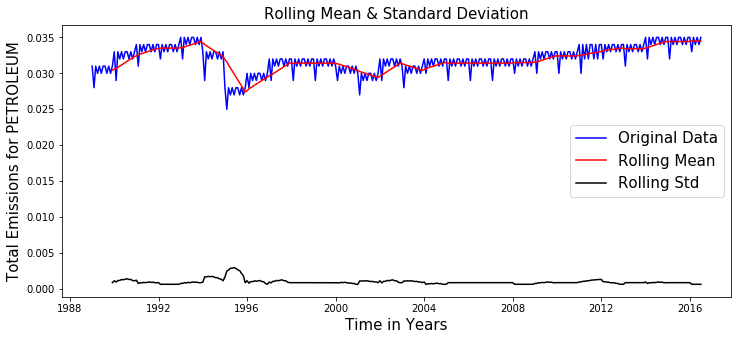

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -2.3193020089352707
p-value: 0.16581823548830354
Critical Values:
	1%: -3.451082300831733
	5%: -2.87067210822307
	10%: -2.5716355136268345


In [202]:
#checking stationarity
TestStationary(ge_df.Value)

### STEP 2: Converting the series into a Stationary Series

In [203]:
#differencing series by 1
ge_df['diffOrdr1'] = np.concatenate(([np.nan], np.diff(ge_df.Value.T, 1)))
ge_df

Value  diffOrdr1
Year                        
1989-01-01  0.031        NaN
1989-02-01  0.028     -0.003
1989-03-01  0.031      0.003
1989-04-01  0.030     -0.001
1989-05-01  0.031      0.001
...           ...        ...
2016-03-01  0.035      0.002
2016-04-01  0.034     -0.001
2016-05-01  0.035      0.001
2016-06-01  0.034     -0.001
2016-07-01  0.035      0.001

[331 rows x 2 columns]

VISUALISING THE STATIONARITY :




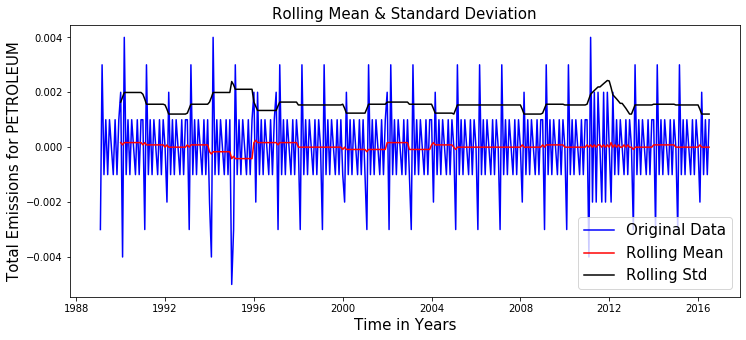

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -4.7738223323994635
p-value: 6.1016432370766624e-05
Critical Values:
	1%: -3.4512146067362317
	5%: -2.870730188960711
	10%: -2.5716664849383113


In [204]:
#now againg applying AD fuller test and graphical test
TestStationary(ge_df.diffOrdr1.dropna(inplace=False))

### STEP 3: DECOMPOSITION TO REMOVE TREND AND SEASONALITY FROM THE DATA

In [205]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(ge_df.Value)

t=decomposition.trend
s=decomposition.seasonal
r=decomposition.resid

In [206]:
r.head(12)

Year
1989-01-01         NaN
1989-02-01         NaN
1989-03-01         NaN
1989-04-01         NaN
1989-05-01         NaN
1989-06-01         NaN
1989-07-01   -0.000081
1989-08-01   -0.000192
1989-09-01   -0.000266
1989-10-01   -0.000458
1989-11-01   -0.000575
1989-12-01   -0.000766
Name: resid, dtype: float64

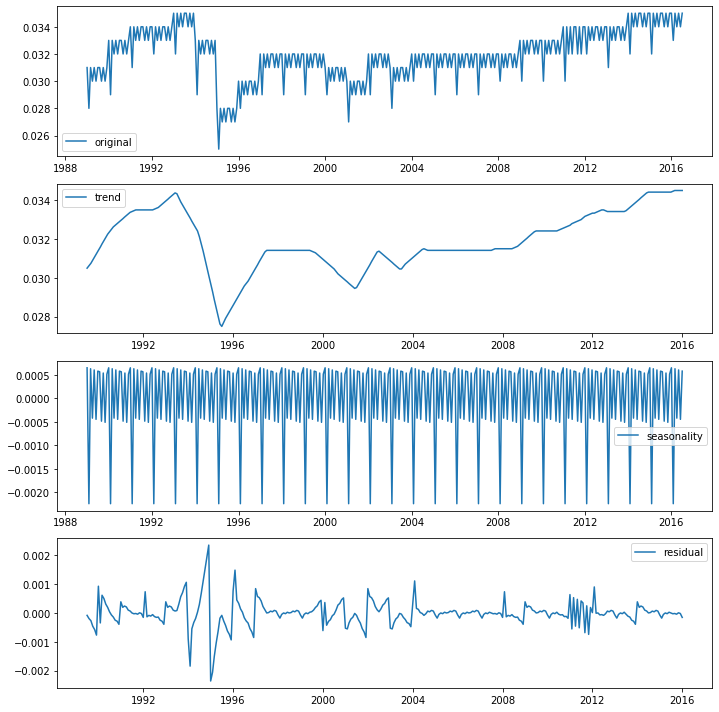

In [207]:
plot_decomposition(ge_df.Value)

VISUALISING THE STATIONARITY :




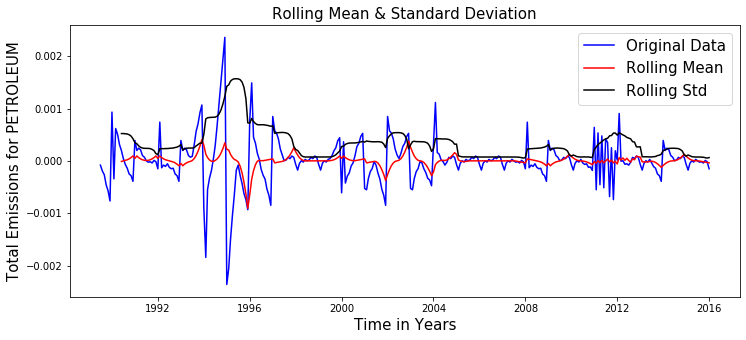

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -7.5321615445870425
p-value: 3.5549942085996167e-11
Critical Values:
	1%: -3.4519023023726696
	5%: -2.8710320399170537
	10%: -2.57182745012602


In [208]:
TestStationary(r.dropna())

### STEP 4: FINDING OPTIMAL PARAMETERS  USING ACF AND PACF FOR ARIMA MODEL

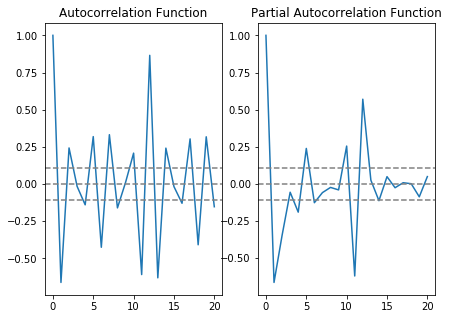

In [209]:
plot_acf_pacf(ge_df.diffOrdr1.dropna())

###  STEP 4.a) : Building ARIMA using ACF-PACF parameters

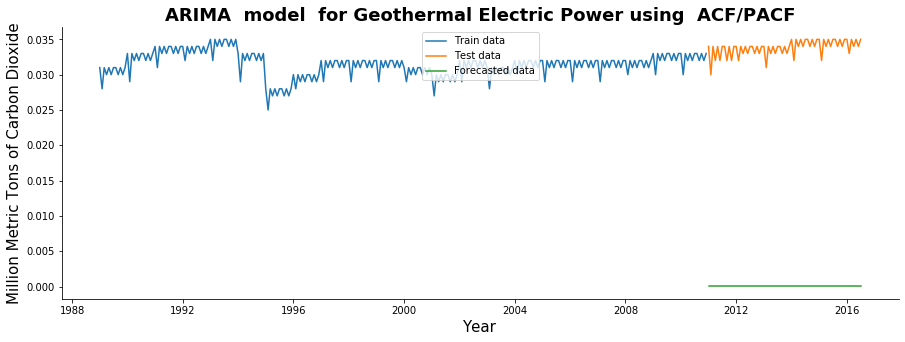

In [210]:
# Values to keep in training data, k
k = 264
# Model building

model_ge_arima_acf =ARIMA(ge_df['Value'],order=(0,1,0))
model_fit=model_ge_arima_acf.fit()
                
# Visualization
#plot_model(ge_df.Value,model_fit,['ARIMA','Geothermal Electric Power','ACF/PACF'])
plt.figure(figsize=(15, 5))
plt.plot(ge_df.Value.iloc[:264], label='Train data')
plt.plot(ge_df.Value.iloc[264:], label='Test data')
plt.plot(model_fit.predict(start = 264,end = 330), label='Forecasted data')
plt.legend(loc='upper center')
sns.despine()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Million Metric Tons of Carbon Dioxide', fontsize=15)
plt.title('ARIMA  model  for Geothermal Electric Power using  ACF/PACF', fontsize=18, weight='bold')
plt.show()

In [211]:
np.sqrt(mean_squared_error(ge_df.Value.iloc[264:], model_fit.predict(start = 264,end = 330)))


0.03382595411649912

### STEP 4.b) BUILDING ARIMA MODEL BY FINDING OPTIMAL PARAMETERS USING GRID SEARCH

In [212]:
grid_search_ARIMA(ge_df.Value)

ARIMA(0, 0, 0) - AIC:-3219.5472497216374
ARIMA(0, 0, 1) - AIC:-3302.708928388455
ARIMA(0, 0, 2) - AIC:-3408.5453683384376
ARIMA(0, 1, 0) - AIC:-3337.3215823826044
ARIMA(0, 1, 1) - AIC:-3533.322307230779
ARIMA(0, 1, 2) - AIC:-3568.088857495728
ARIMA(0, 2, 0) - AIC:-2932.3798581754036
ARIMA(0, 2, 1) - AIC:-3318.417114321431
ARIMA(0, 2, 2) - AIC:-3511.419429563743
ARIMA(1, 0, 0) - AIC:-3406.08723115222
ARIMA(1, 0, 1) - AIC:-3543.6591909188865
ARIMA(1, 0, 2) - AIC:-3581.8439637700867
ARIMA(1, 1, 0) - AIC:-3528.151727110422
ARIMA(1, 1, 1) - AIC:-3568.87785934588
ARIMA(1, 1, 2) - AIC:-3568.1547770818925
ARIMA(1, 2, 0) - AIC:-3229.421962944943
ARIMA(1, 2, 1) - AIC:-3507.6285618778643
ARIMA(2, 0, 0) - AIC:-3548.7479008036025
ARIMA(2, 0, 1) - AIC:-3580.4014103866402
ARIMA(2, 0, 2) - AIC:-3581.313318620765
ARIMA(2, 1, 0) - AIC:-3568.412191953148
ARIMA(2, 1, 1) - AIC:-3566.5043565543874
ARIMA(2, 1, 2) - AIC:-3575.478728593712
ARIMA(2, 2, 0) - AIC:-3380.7860667006876
ARIMA(2, 2, 1) - AIC:-3541.316

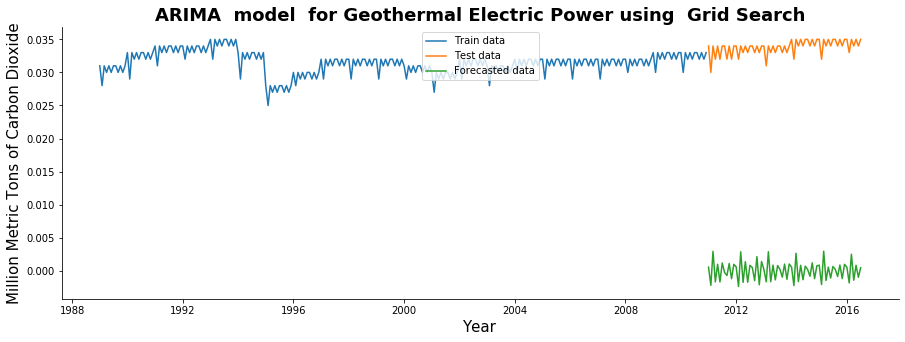

In [213]:
# Values to keep in training data, k
k = 418
# Model building
model_ge_arima_grid = ARIMA(ge_df.Value, order=(10, 1, 2)) 
                
model_fit = model_ge_arima_grid.fit()
# Visualization
#plot_model(ge_df.Value,model_fit,['ARIMA','Geothermal Electric Power','Grid Search'])
plt.figure(figsize=(15, 5))
plt.plot(ge_df.Value.iloc[:264], label='Train data')
plt.plot(ge_df.Value.iloc[264:], label='Test data')
plt.plot(model_fit.predict(start = 264,end = 330), label='Forecasted data')
plt.legend(loc='upper center')
sns.despine()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Million Metric Tons of Carbon Dioxide', fontsize=15)
plt.title('ARIMA  model  for Geothermal Electric Power using  Grid Search', fontsize=18, weight='bold')
plt.show()

In [214]:
#RMSE

np.sqrt(mean_squared_error(ge_df.Value.iloc[264:], model_fit.predict(start = 264,end = 330)))


0.03382913448459246

###  STEP 5 : BUILDING SARIMA MODEL

### STEP 5.a) : Grid search approch to get the best parameters for SARIMA model

In [215]:
grid_search_SARIMA(ge_df.Value)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-1333.8667710145246
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-1666.8922478686386
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-3260.0783046353827
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-3140.761868629297
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-3269.778314682793
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-3257.577179639893
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-3154.366459601383
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-3141.907869431937
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-1741.8282404871927
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-2054.4507625290034
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-3450.5315578873365
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-3338.3278473515834
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-3312.464523900437
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-3290.7843186906175
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-3346.126654330424
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-3339.5849769888796
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-3332.022266186402
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-3

In [216]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 418
# Model building
model_ge_sarima_grid = SARIMAX(ge_df.Value.iloc[:k], 
                order=(0, 1, 0), 
                seasonal_order=(1, 0, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_ge_sarima_grid.fit(disp=False)

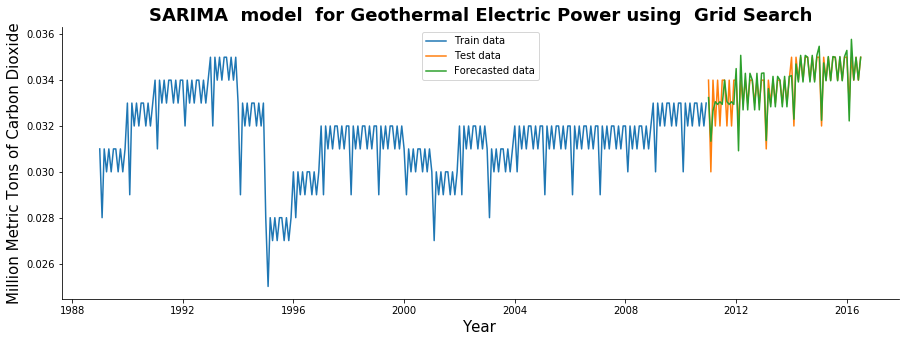

In [217]:
plt.figure(figsize=(15, 5))
plt.plot(ge_df.Value.iloc[:264], label='Train data')
plt.plot(ge_df.Value.iloc[264:], label='Test data')
plt.plot(model_fit.predict(start = 264,end = 330), label='Forecasted data')
plt.legend(loc='upper center')
sns.despine()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Million Metric Tons of Carbon Dioxide', fontsize=15)
plt.title('SARIMA  model  for Geothermal Electric Power using  Grid Search', fontsize=18, weight='bold')
plt.show()

In [218]:
# RMSE

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ge_df.Value.iloc[264:], model_fit.predict(start = 264,end = 330)))

0.0005398070657997262

In [219]:
l = model_fit.predict(start=331,end=391)
l

2016-08-01    0.035000
2016-09-01    0.034004
2016-10-01    0.035000
2016-11-01    0.034004
2016-12-01    0.035000
                ...   
2021-04-01    0.034992
2021-05-01    0.035885
2021-06-01    0.034992
2021-07-01    0.035885
2021-08-01    0.035885
Freq: MS, Length: 61, dtype: float64

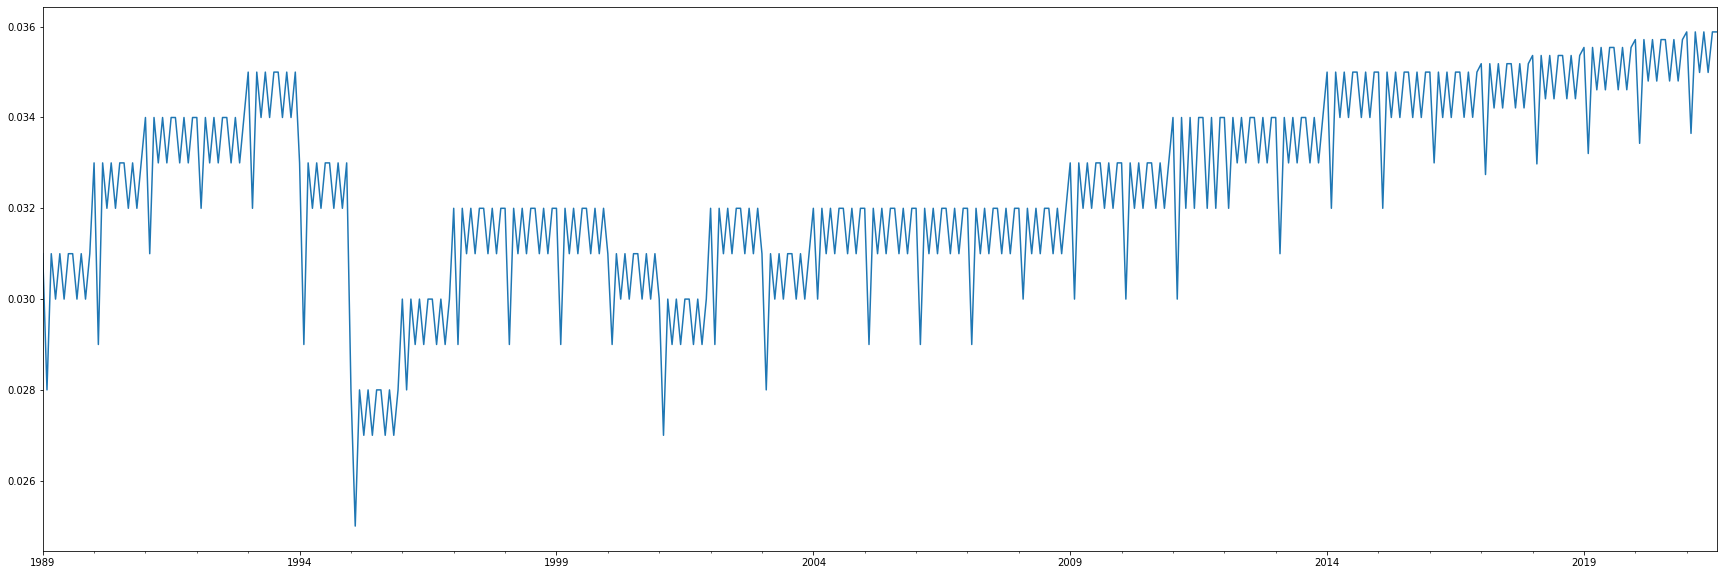

In [220]:
temp = ge_df.Value

future_ge = temp.append(l)
plt.figure(figsize=(30,10))
future_ge.plot()

### STEP 5.b) : Building SARIMA using ACF/PACF 

In [221]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 264
# Model building
model_ce_sarima_acf = SARIMAX(ge_df.Value.iloc[:k], 
                order=(0, 1, 0), 
                seasonal_order=(0, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_ce_sarima_acf.fit(disp=False)

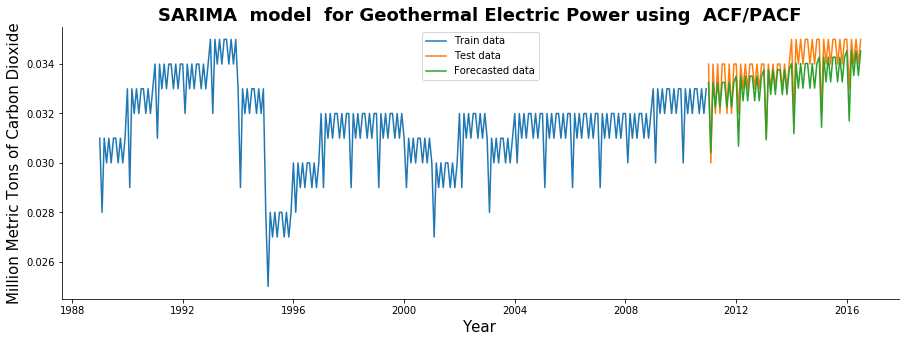

In [222]:
plt.figure(figsize=(15, 5))
plt.plot(ge_df.Value.iloc[:264], label='Train data')
plt.plot(ge_df.Value.iloc[264:], label='Test data')
plt.plot(model_fit.predict(start = 264,end = 330), label='Forecasted data')
plt.legend(loc='upper center')
sns.despine()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Million Metric Tons of Carbon Dioxide', fontsize=15)
plt.title('SARIMA  model  for Geothermal Electric Power using  ACF/PACF', fontsize=18, weight='bold')
plt.show()

In [223]:
#RMSE

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ge_df.Value.iloc[264:], model_fit.predict(start = 264,end = 330)))

0.0006632927681869987

# EVALUATING THE BEST MODEL

In [224]:
#COMPARISON

eva_matrix = pd.DataFrame([[0.0338,0.0006],[0.0338,0.0005]],columns=['ARIMA','SARIMA'],index = ['ACF/PACF','Grid Search'])

In [225]:
print("Geothermal Energy Electric Power Model Comparision \n\n",eva_matrix)

Geothermal Energy Electric Power Model Comparision 

               ARIMA  SARIMA
ACF/PACF     0.0338  0.0006
Grid Search  0.0338  0.0005


### Some inferences:

1. ARIMA model serves RMSE values as 37 with ACF/PACF plot as well as GRID SEARCH
2. From the above evaluation matrix we see that **ARIMA MODEL performs poorly in evaluating the seasonal data**
3. SARIMA MODEL gives the best possible predictions for the seasonal data
4. The RMSE values are the **least** in **SARIMA MODEL USING GRID SEARCH**



## 7) MODEL BUILDING For Non-Biomass Waste Electric Power

In [226]:
# making new dataframe for coal electric power
nb_df = ts.loc[ts["Column_Order"] == 8,['Value']]
nb_df.head()

Value
Year             
1989-01-01  0.371
1989-02-01  0.335
1989-03-01  0.371
1989-04-01  0.359
1989-05-01  0.371

### STEP 1: Checking for Stationarity in the series

VISUALISING THE STATIONARITY :




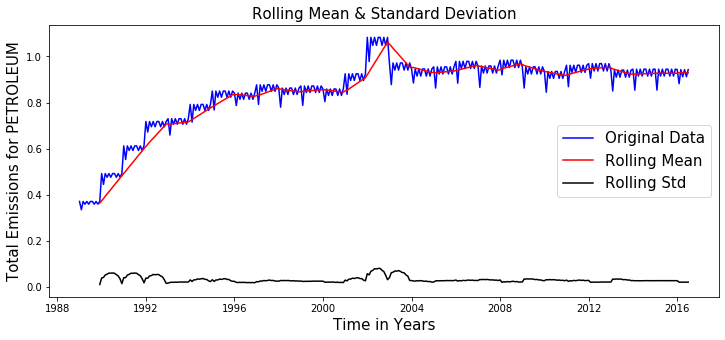

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -3.541934484480519
p-value: 0.0069732213932586894
Critical Values:
	1%: -3.4512146067362317
	5%: -2.870730188960711
	10%: -2.5716664849383113


In [227]:
#checking stationarity
TestStationary(nb_df.Value)

### STEP 2: Converting the series into a Stationary Series


In [228]:
#differencing series by 1
nb_df['diffOrdr1'] = np.concatenate(([np.nan], np.diff(nb_df.Value.T, 1)))
nb_df

Value  diffOrdr1
Year                        
1989-01-01  0.371        NaN
1989-02-01  0.335     -0.036
1989-03-01  0.371      0.036
1989-04-01  0.359     -0.012
1989-05-01  0.371      0.012
...           ...        ...
2016-03-01  0.943      0.061
2016-04-01  0.912     -0.031
2016-05-01  0.943      0.031
2016-06-01  0.912     -0.031
2016-07-01  0.943      0.031

[331 rows x 2 columns]

VISUALISING THE STATIONARITY :




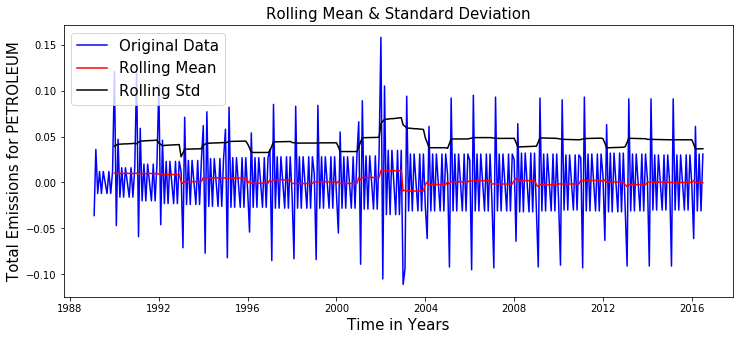

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -3.999427677305772
p-value: 0.0014135110692545193
Critical Values:
	1%: -3.451082300831733
	5%: -2.87067210822307
	10%: -2.5716355136268345


In [229]:
#now againg applying AD fuller test and graphical test
TestStationary(nb_df.diffOrdr1.dropna(inplace=False))

### STEP 3: DECOMPOSITION TO REMOVE TREND AND SEASONALITY FROM THE DATA

In [230]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(nb_df.Value)

t=decomposition.trend
s=decomposition.seasonal
r=decomposition.resid

In [231]:
r.head(12)

Year
1989-01-01         NaN
1989-02-01         NaN
1989-03-01         NaN
1989-04-01         NaN
1989-05-01         NaN
1989-06-01         NaN
1989-07-01   -0.012865
1989-08-01   -0.020763
1989-09-01   -0.012772
1989-10-01   -0.036842
1989-11-01   -0.029134
1989-12-01   -0.053203
Name: resid, dtype: float64

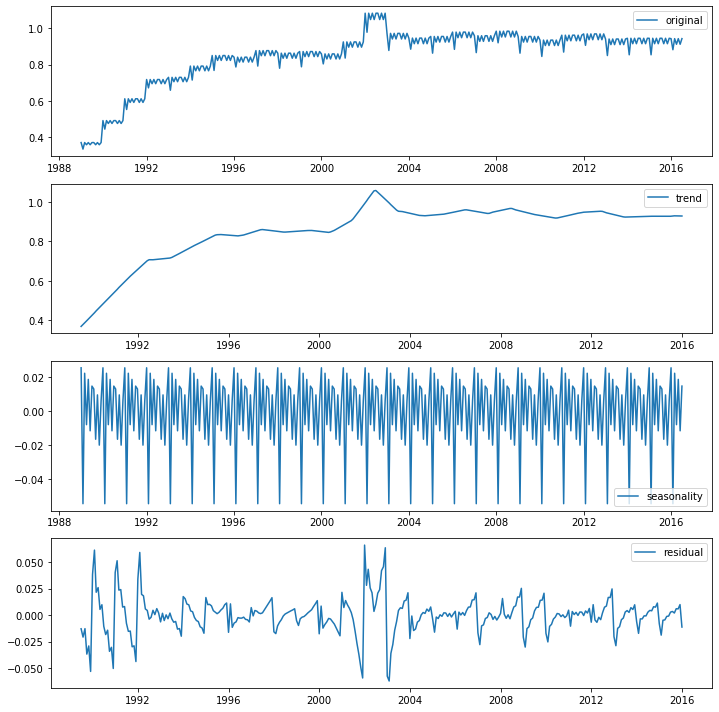

In [232]:
plot_decomposition(nb_df.Value)

VISUALISING THE STATIONARITY :




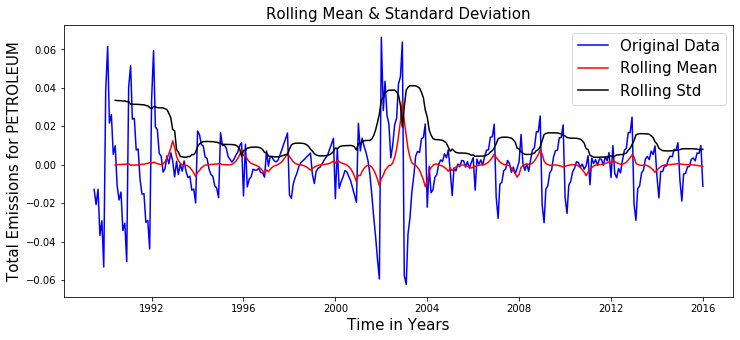

<Figure size 3600x144000 with 0 Axes>

CHECKING STATIONARITY USING ADF TEST


ADF Statistic: -6.940732187664862
p-value: 1.0267251295074152e-09
Critical Values:
	1%: -3.4519023023726696
	5%: -2.8710320399170537
	10%: -2.57182745012602


In [233]:
TestStationary(r.dropna())

### STEP 4: FINDING OPTIMAL PARAMETERS  USING ACF AND PACF FOR ARIMA MODEL

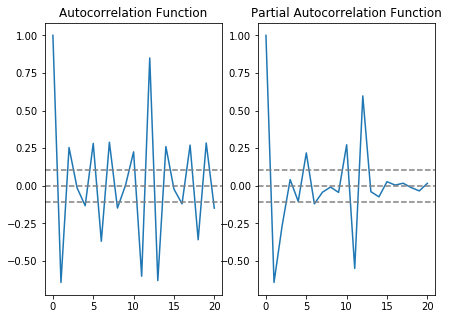

In [234]:
plot_acf_pacf(nb_df.diffOrdr1.dropna())

###  STEP 4.a) : Building ARIMA using ACF-PACF parameters

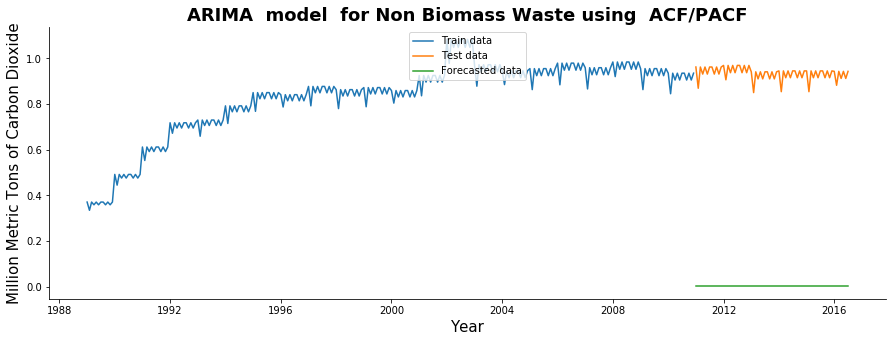

In [235]:
# Values to keep in training data, k
k = 264
# Model building

model_nb_arima_acf =ARIMA(nb_df['Value'],order=(0,1,0))
model_fit=model_nb_arima_acf.fit()
                
# Visualization
plt.figure(figsize=(15, 5))
plt.plot(nb_df.Value.iloc[:264], label='Train data')
plt.plot(nb_df.Value.iloc[264:], label='Test data')
plt.plot(model_fit.predict(start = 264,end = 330), label='Forecasted data')
plt.legend(loc='upper center')
sns.despine()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Million Metric Tons of Carbon Dioxide', fontsize=15)
plt.title('ARIMA  model  for Non Biomass Waste using  ACF/PACF', fontsize=18, weight='bold')
plt.show()

In [236]:
np.sqrt(mean_squared_error(nb_df.Value.iloc[264:], model_fit.predict(start = 264,end = 330)))


0.9326537069721728

### STEP 4.b) BUILDING ARIMA MODEL BY FINDING OPTIMAL PARAMETERS USING GRID SEARCH

In [237]:
grid_search_ARIMA(nb_df.Value)

ARIMA(0, 0, 0) - AIC:-295.7417156740913
ARIMA(0, 0, 1) - AIC:-582.9808452343444
ARIMA(0, 0, 2) - AIC:-766.4064831792053
ARIMA(0, 1, 0) - AIC:-1131.3137426131088
ARIMA(0, 1, 1) - AIC:-1288.7523448379413
ARIMA(0, 1, 2) - AIC:-1324.3309338955817
ARIMA(0, 2, 0) - AIC:-736.0654487496458
ARIMA(0, 2, 1) - AIC:-1119.8009229434524
ARIMA(0, 2, 2) - AIC:-1284.1528147024846
ARIMA(1, 0, 0) - AIC:-1133.0689067289027
ARIMA(1, 0, 1) - AIC:-1281.1788165751746
ARIMA(1, 0, 2) - AIC:-1319.3621533403502
ARIMA(1, 1, 0) - AIC:-1304.8924336256816
ARIMA(1, 1, 1) - AIC:-1322.9689461314927
ARIMA(1, 1, 2) - AIC:-1324.2927388332703
ARIMA(1, 2, 0) - AIC:-1033.1216251882252
ARIMA(1, 2, 1) - AIC:-1294.824751153109
ARIMA(2, 0, 0) - AIC:-1300.7190173209415
ARIMA(2, 0, 1) - AIC:-1316.4904998528618
ARIMA(2, 0, 2) - AIC:-1318.793583697352
ARIMA(2, 1, 0) - AIC:-1327.2104815711534
ARIMA(2, 1, 1) - AIC:-1331.5854520292212
ARIMA(2, 1, 2) - AIC:-1330.5947246277913
ARIMA(2, 2, 0) - AIC:-1179.4045208412326
ARIMA(2, 2, 1) - AIC:-

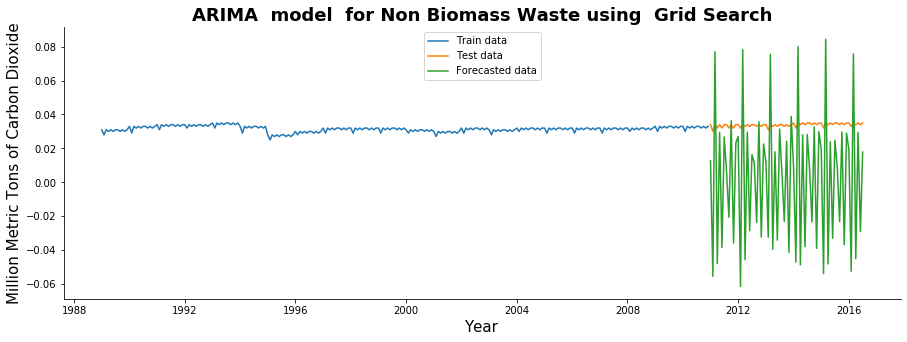

In [238]:
# Values to keep in training data, k
k = 264
# Model building
model_nb_arima_grid = ARIMA(nb_df.Value, order=(10, 1, 2)) 
                
model_fit = model_nb_arima_grid.fit()
# Visualization
plt.figure(figsize=(15, 5))
plt.plot(ge_df.Value.iloc[:264], label='Train data')
plt.plot(ge_df.Value.iloc[264:], label='Test data')
plt.plot(model_fit.predict(start = 264,end = 330), label='Forecasted data')
plt.legend(loc='upper center')
sns.despine()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Million Metric Tons of Carbon Dioxide', fontsize=15)
plt.title('ARIMA  model  for Non Biomass Waste using  Grid Search', fontsize=18, weight='bold')
plt.show()

In [239]:
#RMSE

np.sqrt(mean_squared_error(nb_df.Value.iloc[264:], model_fit.predict(start = 264,end = 330)))


0.9323419313183015

###  STEP 5 : BUILDING SARIMA MODEL

### STEP 5.a) : Grid search approch to get the best parameters for SARIMA model

In [240]:
grid_search_SARIMA(nb_df.Value)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:842.7291025450922
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:436.5291282337697
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-894.7800278753357
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-916.1385841224956
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-910.3945377350251
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-920.362620815441
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-919.1947439068471
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-1055.0154701452075
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:431.5852248905218
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:43.26288804448964
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-1165.0742419030817
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-1150.8431673238163
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-1176.4065061465458
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-1172.36668583719
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-1151.9794031143151
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-1269.9438691950581
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-1129.0367286676185
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-1285.8881

In [241]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 264
# Model building
model_nb_sarima_grid = SARIMAX(nb_df.Value.iloc[:k], 
                order=(1, 0, 0), 
                seasonal_order=(1, 0, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_nb_sarima_grid.fit(disp=False)

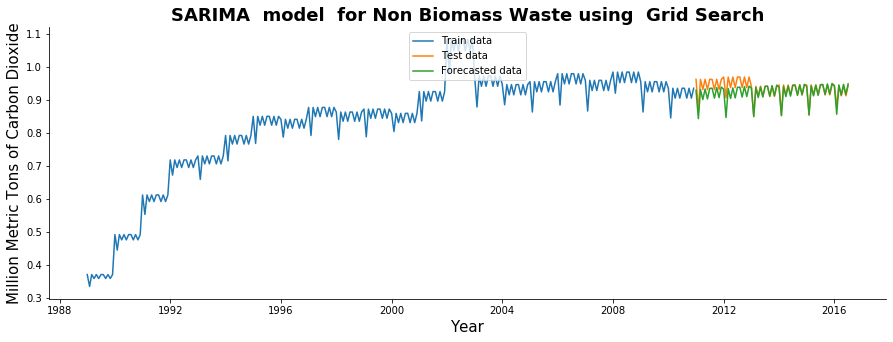

In [242]:
plt.figure(figsize=(15, 5))
plt.plot(nb_df.Value.iloc[:264], label='Train data')
plt.plot(nb_df.Value.iloc[264:], label='Test data')
plt.plot(model_fit.predict(start = 264,end = 330), label='Forecasted data')
plt.legend(loc='upper center')
sns.despine()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Million Metric Tons of Carbon Dioxide', fontsize=15)
plt.title('SARIMA  model  for Non Biomass Waste using  Grid Search', fontsize=18, weight='bold')
plt.show()

In [243]:
# RMSE

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(nb_df.Value.iloc[264:], model_fit.predict(start = 264,end = 330)))

0.019193785789076854

In [244]:
l = model_fit.predict(start = 331,end = 391)
l

2016-08-01    0.949086
2016-09-01    0.918439
2016-10-01    0.950569
2016-11-01    0.919875
2016-12-01    0.951961
                ...   
2021-04-01    0.925787
2021-05-01    0.958414
2021-06-01    0.927463
2021-07-01    0.960037
2021-08-01    0.960811
Freq: MS, Length: 61, dtype: float64

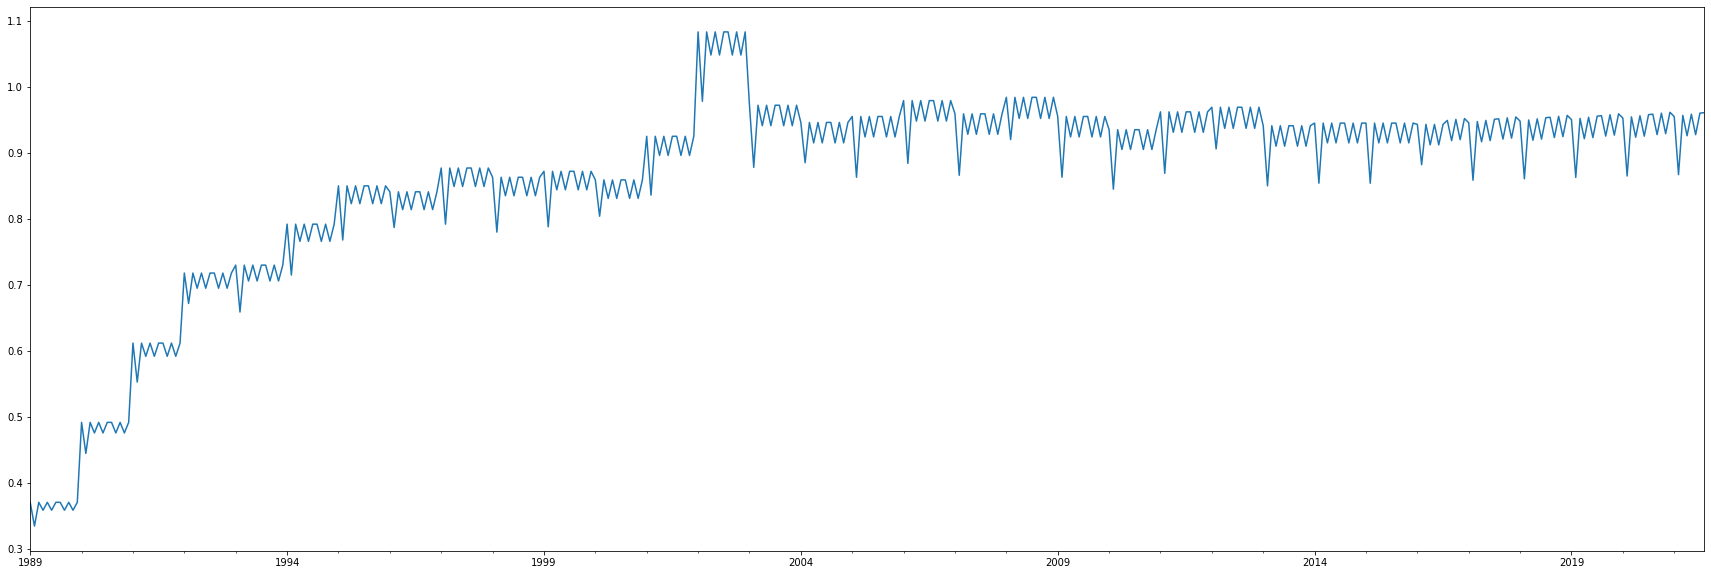

In [245]:
temp = nb_df.Value

future_nb = temp.append(l)
plt.figure(figsize=(30,10))
future_nb.plot()

### STEP 5.b) : Building SARIMA using ACF/PACF 

In [246]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 264
# Model building
model_nb_sarima_acf = SARIMAX(nb_df.Value.iloc[:k], 
                order=(0, 1, 0), 
                seasonal_order=(1, 0, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model_nb_sarima_acf.fit(disp=False)

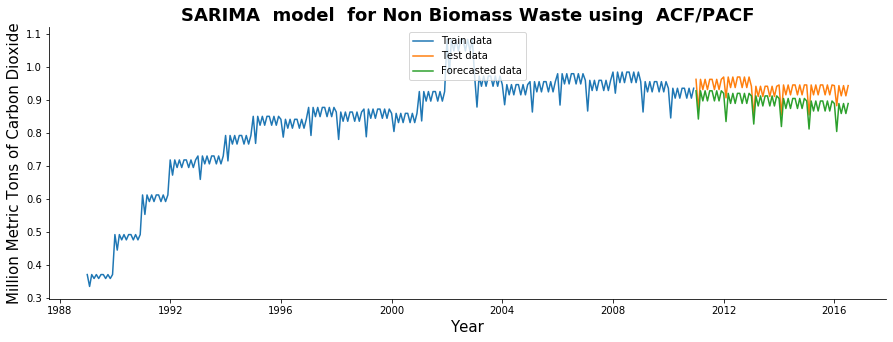

In [247]:
plt.figure(figsize=(15, 5))
plt.plot(nb_df.Value.iloc[:264], label='Train data')
plt.plot(nb_df.Value.iloc[264:], label='Test data')
plt.plot(model_fit.predict(start = 264,end = 330), label='Forecasted data')
plt.legend(loc='upper center')
sns.despine()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Million Metric Tons of Carbon Dioxide', fontsize=15)
plt.title('SARIMA  model  for Non Biomass Waste using  ACF/PACF', fontsize=18, weight='bold')
plt.show()

In [248]:
#RMSE

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(nb_df.Value.iloc[264:], model_fit.predict(start = 264,end = 330)))

0.04344183835893258

# EVALUATING THE BEST MODEL

In [249]:
#COMPARISON

eva_matrix = pd.DataFrame([[0.932,0.043],[0.932,0.0191]],columns=['ARIMA','SARIMA'],index = ['ACF/PACF','Grid Search'])

In [250]:
print("Non-Biomass Waste Electric Power Model Comparision \n\n",eva_matrix)

Non-Biomass Waste Electric Power Model Comparision 

              ARIMA  SARIMA
ACF/PACF     0.932  0.0430
Grid Search  0.932  0.0191


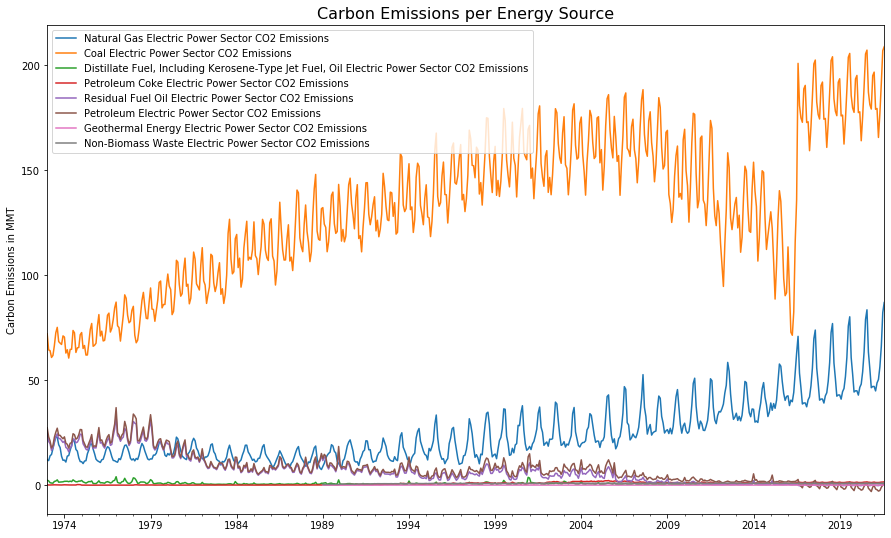

In [251]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(9)
future_Ng.plot(label = 'Natural Gas Electric Power Sector CO2 Emissions')
future_ce.plot(label = 'Coal Electric Power Sector CO2 Emissions')
future_de.plot(label = 'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions')
future_pc.plot(label = 'Petroleum Coke Electric Power Sector CO2 Emissions')
future_rf.plot(label = 'Residual Fuel Oil Electric Power Sector CO2 Emissions')
future_pe.plot(label = 'Petroleum Electric Power Sector CO2 Emissions')
future_ge.plot(label = 'Geothermal Energy Electric Power Sector CO2 Emissions')
future_nb.plot(label = 'Non-Biomass Waste Electric Power Sector CO2 Emissions')

ax.set_ylabel("Carbon Emissions in MMT")
ax.set_title("Carbon Emissions per Energy Source",fontsize=16)
plt.legend()

# FINAL INFERENCES

- As the final statement we can infer that, our prediction model remains pretty much very accurate in case of resources that have a constant trend followed throughout the time series.
- Except coal, which has an initial upward moving trend and then a sharp downward trend, which makes our prediction model fail to predict a set of certain values due to uncertainty of the trend. But if we reduce the time slot data for training the model for the last 8 years, we did see that our model was able to predict it correctly.